# Select elements to include in clues

In this `Python 3` notebook, I use data from four pre-test surveys to select the names, vehicles, tools, and other attributes that will make up all of the clues in the game. The first survey helps select the "rim" attributes, while the remaining select "spur" attributes.

In the ideal experiment, all "rim" attributes would be equally attractive independent of one another, to minimize any external bias leaking into the game. I.e. we should not have one suspect named "Smith" and another named "Ramirez" because external (in our imperfect world) racial biases will favor the adoption of one name over the other. For tools, we should not have "lockpicks" and "sewing machines" as we have clear expectations that lock picks are more likely to be involved in a crime. Pretesting on people's naieve expectations is an attempt to minimize this external bias. It is hard to judge one category of items against another, so look for similar levels of attractiveness within each category (suspects, clothes, vehicles, etc) and trust that player's inclination to select an item from each category will smooth biases between categories.

Likewise with spur clues in the control case, we want clues that are as likely as one another to be adopted. Approximate this by having categories of spur clues that are shared across rim attributes, so that in theory, if the categories are balanced, the net effect on rim elements is balanced. 

In [1]:
%pylab inline
import pandas as pd
from scipy.stats import ttest_ind
import itertools
from textwrap import wrap
pd.options.display.max_rows = 999

Populating the interactive namespace from numpy and matplotlib


want to choose a set of concepts to construct clues from such that the items are as interchageable as possible. That is, we want to minimize the likelihood that two randomly chosen concepts will have a clear 'winner'

In [32]:
data = pd.read_csv('../results-anonymized/pretest/Mystery object ranking 1 - rim nodes_July 3, 2019_11.29.csv').T
data['Q'] = data[0].apply(lambda x: x.split(' - ')[0] if ' - ' in x else x)
data['A'] = data[0].apply(lambda x: x.split(' - ')[1] if ' - ' in x else "")

data = data[~data['A'].str.contains('woman')]

data.set_index(["Q","A"], drop=True, inplace=True)
data = data.iloc[11:-6]
data.drop([0, 1], axis=1, inplace=True)
data = data.astype(float)
data.head()

2    \
Q                                                  A                              
How likely do you think it is that each of the ... a set of lock picks      NaN   
                                                   a claw hammer            NaN   
                                                   a tire iron             19.0   
                                                   a pair of metal shears   NaN   
                                                   a concrete saw           6.0   

                                                                            3    \
Q                                                  A                              
How likely do you think it is that each of the ... a set of lock picks     83.0   
                                                   a claw hammer           15.0   
                                                   a tire iron             41.0   
                                                   a pair of metal shears   NaN   
                                                   a concrete saw           NaN   

                                                                           4    \
Q                                                  A                             
How likely do you think it is that each of the ... a set of lock picks     NaN   
                                                   a claw hammer           NaN   
                                                   a tire iron             NaN   
                                                   a pair of metal shears  NaN   
                                                   a concrete saw          1.0   

                                                                            5    \
Q                                                  A                              
How likely do you think it is that each of the ... a set of lock picks      NaN   
                                                   a claw hammer            NaN   
                                                   a tire iron             65.0   
                                                   a pair of metal shears  51.0   
                                                   a concrete saw           NaN   

                                                                            6    \
Q                                                  A                              
How likely do you think it is that each of the ... a set of lock picks     65.0   
                                                   a claw hammer            NaN   
                                                   a tire iron              NaN   
                                                   a pair of metal shears  40.0   
                                                   a concrete saw           NaN   

                                                                           7    \
Q                                                  A                             
How likely do you think it is that each of the ... a set of lock picks     NaN   
                                                   a claw hammer           NaN   
                                                   a tire iron             NaN   
                                                   a pair of metal shears  NaN   
                                                   a concrete saw          NaN   

                                                                           8    \
Q                                                  A                             
How likely do you think it is that each of the ... a set of lock picks     NaN   
                                                   a claw hammer           NaN   
                                                   a tire iron             NaN   
                                                   a pair of metal shears  NaN   
                                                   a concrete saw          0.0   

                       

In [33]:
scores = pd.DataFrame(index=data.index)
scores["scores"] = data.apply(lambda r: [int(v) for v in r if not np.isnan(v)], axis=1)
scores['mean'] = scores['scores'].apply(lambda x: np.mean(x))
scores['median'] = scores['scores'].apply(lambda x: np.median(x))
scores['std'] = scores['scores'].apply(lambda x: np.std(x))
scores['count'] = scores['scores'].apply(lambda x: len(x))
scores.head()

scores  \
Q                                                  A                                                                           
How likely do you think it is that each of the ... a set of lock picks     [83, 65, 78, 98, 73, 83, 51, 86, 9, 64, 66, 97...   
                                                   a claw hammer           [15, 76, 73, 100, 86, 73, 64, 34, 43, 42, 66, ...   
                                                   a tire iron             [19, 41, 65, 35, 58, 0, 87, 0, 20, 24, 35, 36,...   
                                                   a pair of metal shears  [51, 40, 77, 14, 100, 32, 81, 65, 35, 59, 63, ...   
                                                   a concrete saw          [6, 1, 0, 75, 69, 0, 64, 0, 64, 53, 63, 9, 20,...   

                                                                                mean  \
Q                                                  A                                   
How likely do you think it is that each of the ... a set of lock picks     74.233333   
                                                   a claw hammer           49.566667   
                                                   a tire iron             43.193548   
                                                   a pair of metal shears  51.100000   
                                                   a concrete saw          35.677419   

                                                                           median  \
Q                                                  A                                
How likely do you think it is that each of the ... a set of lock picks       83.5   
                                                   a claw hammer             50.0   
                                                   a tire iron               38.0   
                                                   a pair of metal shears    50.5   
                                                   a concrete saw            30.0   

                                                                                 std  \
Q                                                  A                                   
How likely do you think it is that each of the ... a set of lock picks     25.516901   
                                                   a claw hammer           26.974906   
                                                   a tire iron             29.548669   
                                                   a pair of metal shears  25.584305   
                                                   a concrete saw          30.600851   

                                                                           count  
Q                                                  A                              
How likely do you think it is that each of the ... a set of lock picks        30  
                                                   a claw hammer              30  
                                                   a tire iron                31  
                                                   a pair of metal shears     30  
                                                   a concrete saw             31

In [34]:
# tool
d=scores.iloc[scores.index.get_level_values(0).str.contains('tools')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-9)
print(len(d), d['c'].argmax())
d

66 ('How likely do you think it is that each of the following tools was used in the crime?', 'a serrated knife')


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


scores  \
Q                                                  A                                                                               
How likely do you think it is that each of the ... a hydraulic press           [8, 28, 0, 69, 0, 4, 23, 27, 0, 22, 73, 29, 28...   
                                                   a chain saw                 [0, 5, 0, 50, 0, 0, 9, 61, 2, 41, 2, 14, 0, 63...   
                                                   a nail gun                  [23, 34, 0, 0, 51, 84, 0, 66, 0, 32, 0, 59, 35...   
                                                   a nail puller               [9, 23, 34, 0, 66, 0, 32, 35, 2, 5, 1, 52, 25,...   
                                                   a strong acid               [24, 42, 0, 22, 0, 3, 18, 51, 0, 23, 39, 18, 6...   
                                                   a paint scraper             [14, 71, 21, 33, 61, 0, 30, 76, 0, 2, 50, 51, ...   
                                                   a die grinder               [23, 30, 31, 35, 66, 10, 12, 30, 1, 57, 52, 29...   
                                                   a pair of pruning shears    [0, 73, 0, 0, 0, 60, 61, 0, 40, 3, 77, 61, 11,...   
                                                   a machete                   [51, 0, 11, 0, 27, 23, 66, 1, 66, 68, 17, 0, 6...   
                                                   a leather punch             [78, 57, 0, 6, 6, 12, 72, 41, 37, 3, 68, 0, 7,...   
                                                   an ice pick                 [18, 14, 0, 84, 81, 10, 66, 51, 7, 22, 0, 34, ...   
                                                   a shovel                    [0, 9, 86, 40, 2, 0, 0, 12, 67, 26, 62, 23, 0,...   
                                                   an ax                       [7, 0, 75, 0, 76, 34, 32, 34, 51, 1, 8, 12, 77...   
                                                   an angle grinder            [0, 29, 75, 0, 51, 66, 3, 34, 3, 68, 62, 9, 67...   
                                                   a rubber mallet             [77, 51, 71, 0, 14, 26, 40, 51, 89, 34, 0, 0, ...   
                                                   a chain                     [18, 0, 51, 73, 72, 66, 59, 13, 33, 21, 4, 78,...   
                                                   a wrench                    [0, 27, 51, 50, 24, 69, 0, 68, 76, 22, 77, 60,...   
                                                   a ceramic knife             [71, 6, 58, 1, 6, 51, 93, 0, 51, 36, 8, 8, 62,...   
                                                   a concrete saw              [6, 1, 0, 75, 69, 0, 64, 0, 64, 53, 63, 9, 20,...   
                                                   an electric winch           [18, 15, 30, 44, 0, 66, 31, 0, 20, 3, 52, 44, ...   
                                                   a tile cutter               [11, 68, 0, 51, 100, 17, 8, 66, 25, 0, 60, 24,...   
                                                   a putty knife               [27, 73, 50, 72, 0, 7, 71, 69, 62, 1, 67, 55, ...   
                                                   an explosive                [51, 0, 0, 100, 83, 7, 62, 64, 17, 34, 45, 100...   
                                                   a dental pick               [2, 0, 0, 83, 89, 4, 64, 0, 61, 28, 65, 73, 0,...   
                                                   a bent coat-hanger          [18, 75, 57, 62, 0, 21, 22, 20, 56, 3, 77, 59,...   
                                                   a power chisel              [79, 27, 68, 0, 95, 14, 72, 40, 70, 13, 10, 28...   
                                                   a hacksaw                   [0, 13, 79, 51, 15, 58, 90, 24, 39, 30, 51, 62...   
                                                   a serrated knife            [78, 29, 69, 35, 100, 34, 74, 33, 55, 1, 55, 4...   
                                                   a set of hex keys           [5, 20, 78, 50, 41, 22, 34, 26, 83, 1, 53, 77,...   
                              

In [35]:
# vehicle
d=scores.iloc[scores.index.get_level_values(0).str.contains('vehicle')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-11)
print(len(d), d['c'].argmax())
d

73 ('How likely do you think it is that each of the following vehicles was used as a getaway car?', 'a flatbed trailer')


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


scores  \
Q                                                  A                                                                                
How likely do you think it is that each of the ... a yellow VW Beetle           [9, 0, 51, 0, 34, 0, 16, 1, 11, 21, 20, 60, 1,...   
                                                   a converted schoolbus        [0, 66, 0, 0, 0, 77, 0, 0, 41, 1, 0, 0, 62, 12...   
                                                   a blue VW Beetle             [0, 0, 0, 0, 27, 22, 0, 2, 18, 63, 2, 16, 67, ...   
                                                   an 18-wheeler                [0, 0, 0, 0, 0, 72, 0, 35, 28, 21, 3, 35, 28, ...   
                                                   a baby blue Corvette         [44, 66, 7, 0, 0, 0, 16, 0, 62, 26, 19, 0, 23,...   
                                                   a yellow Hummer H2           [17, 1, 0, 0, 0, 4, 91, 67, 9, 60, 22, 14, 66,...   
                                                   a Tesla Model S              [38, 0, 0, 0, 0, 35, 86, 20, 85, 1, 0, 21, 12,...   
                                                   a red Mini Cooper            [25, 0, 26, 0, 0, 44, 0, 89, 25, 25, 31, 3, 69...   
                                                   A yellow Honda Insight       [20, 65, 14, 0, 44, 0, 26, 70, 0, 0, 0, 51, 35...   
                                                   a purple PT Cruiser          [0, 1, 5, 0, 2, 0, 8, 0, 64, 34, 0, 65, 19, 33...   
                                                   a red Tesla                  [16, 0, 0, 0, 66, 27, 60, 2, 59, 17, 94, 0, 0,...   
                                                   a brown VW minibus           [2, 7, 37, 30, 84, 6, 0, 58, 1, 8, 0, 2, 4, 55...   
                                                   a green Prius                [27, 65, 28, 14, 35, 75, 17, 5, 0, 17, 15, 34,...   
                                                   a brown Winnebago            [0, 34, 0, 51, 0, 6, 58, 0, 24, 2, 62, 55, 57,...   
                                                   A blue BMW M5                [14, 35, 26, 16, 68, 0, 71, 60, 87, 11, 0, 54,...   
                                                   a purple Mazda Miata         [7, 0, 43, 67, 15, 80, 17, 51, 0, 39, 0, 42, 1...   
                                                   a red Ford Mustang           [0, 0, 77, 0, 100, 0, 4, 51, 10, 5, 71, 5, 0, ...   
                                                   An orange Chevrolet Bolt     [51, 73, 72, 0, 70, 0, 37, 26, 3, 0, 1, 37, 31...   
                                                   A red VW Passat              [51, 22, 31, 0, 41, 0, 6, 77, 23, 0, 4, 50, 35...   
                                                   a black Shelby GT            [0, 0, 16, 26, 42, 51, 0, 73, 12, 37, 5, 6, 0,...   
                                                   A white Lexus                [51, 75, 22, 0, 72, 0, 79, 67, 80, 3, 2, 48, 1...   
                                                   a land rover                 [0, 13, 64, 0, 4, 74, 36, 22, 59, 12, 10, 65, ...   
                                                   a blue Fiat Spider           [8, 0, 3, 0, 68, 91, 89, 0, 51, 18, 0, 64, 0, ...   
                                                   a white Cadillac Eldorado    [59, 0, 39, 0, 35, 1, 51, 23, 66, 38, 0, 69, 9...   
                                                   a flatbed trailer            [0, 92, 0, 0, 0, 81, 65, 86, 64, 20, 0, 31, 58...   
                                                   a yellow box truck           [16, 20, 89, 41, 51, 0, 54, 75, 24, 38, 31, 25...   
                                                   a blue Chevrolet Corvette    [0, 28, 51, 89, 70, 1, 69, 13, 23, 77, 75, 30,...   
                                                   A green Mazda 3              [51, 76, 33, 49, 65, 18, 64, 39, 23, 1, 2, 51,...   
                                                   a silver BMW                 [63, 0, 17, 61, 0, 15, 67, 20, 29, 68, 20, 59,...   


In [36]:
# description
d=scores.iloc[scores.index.get_level_values(0).str.contains('descriptions')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-9)
print(len(d), d['c'].argmax())
d

51 ('How likely do you think it is that the burglar fits the following descriptions?', 'a long-haired man')


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


scores  \
Q                                                  A                                                                                    
How likely do you think it is that the burglar ... an elderly lady                  [70, 0, 0, 51, 79, 0, 67, 0, 9, 3, 0, 0, 3, 32...   
                                                   a man with a limp                [51, 12, 22, 67, 0, 14, 1, 8, 1, 13, 50, 31, 1...   
                                                   a man with a limp                [51, 15, 9, 50, 0, 26, 85, 1, 8, 0, 13, 50, 30...   
                                                   a bow-legged man                 [14, 0, 74, 5, 55, 16, 2, 38, 55, 9, 50, 24, 1...   
                                                   a man with a gold tooth          [51, 24, 51, 64, 3, 92, 62, 5, 34, 0, 13, 42, ...   
                                                   a double-chinned man             [51, 20, 72, 52, 69, 0, 16, 0, 23, 4, 50, 54, ...   
                                                   a man with buck teeth            [51, 41, 79, 50, 68, 65, 40, 34, 1, 15, 50, 45...   
                                                   a hollow-cheeked man             [51, 31, 51, 39, 14, 31, 63, 21, 51, 2, 15, 45...   
                                                   a man with freckles              [51, 65, 64, 49, 71, 9, 68, 12, 44, 4, 13, 49,...   
                                                   a man with a nervous twitch      [49, 15, 80, 49, 68, 23, 83, 67, 31, 16, 16, 4...   
                                                   an overweight man                [44, 39, 55, 83, 51, 23, 4, 53, 51, 34, 59, 4,...   
                                                   a man with a facial birthmark    [16, 79, 50, 81, 10, 58, 83, 39, 6, 1, 15, 51,...   
                                                   a man with wrinkles              [51, 33, 67, 50, 71, 70, 10, 13, 19, 15, 51, 6...   
                                                   a man with facial acne           [51, 64, 86, 51, 72, 22, 68, 67, 28, 8, 4, 13,...   
                                                   a man with missing teeth         [51, 62, 51, 45, 64, 61, 35, 3, 46, 10, 11, 54...   
                                                   a red-haired man                 [57, 51, 71, 65, 5, 46, 44, 5, 33, 2, 60, 64, ...   
                                                   a man with a large adam's apple  [51, 64, 72, 15, 74, 38, 24, 50, 10, 13, 50, 5...   
                                                   a man with a broken nose         [51, 14, 66, 56, 41, 79, 16, 76, 35, 32, 3, 9,...   
                                                   a long-haired man                [51, 0, 74, 21, 15, 21, 12, 18, 2, 68, 61, 74,...   
                                                   a pot-bellied man                [1, 71, 0, 51, 58, 61, 47, 64, 69, 5, 55, 51, ...   
                                                   a partially-bald man             [51, 13, 58, 50, 37, 55, 36, 36, 36, 19, 16, 5...   
                                                   a grey-haired man                [9, 15, 95, 73, 60, 54, 68, 51, 32, 15, 78, 61...   
                                                   a short man                      [70, 0, 27, 19, 43, 52, 65, 51, 52, 6, 16, 86,...   
                                                   a well-groomed man               [0, 0, 100, 51, 77, 72, 86, 37, 67, 27, 66, 13...   
                                                   a man with sideburns             [66, 56, 50, 69, 10, 72, 34, 75, 60, 39, 51, 5...   
                                                   a heavily-scarred man            [51, 42, 81, 59, 62, 62, 70, 67, 3, 74, 50, 57...   
                                                   a blonde-haired man              [61, 65, 70, 51, 51, 57, 70, 65, 25, 66, 59, 7...   
                                                   a handsome man                   [68, 74, 21, 80, 51, 96, 79, 70, 64, 50, 78, 9...   
                 

In [37]:
# clothing
d=scores.iloc[scores.index.get_level_values(0).str.contains('clothes')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-10)
print(len(d), d['c'].argmax())
d

78 ('How likely do you think it is that the burglar wore the following clothes?', 'a pair of overalls')


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


scores  \
Q                                                  A                                                                                 
How likely do you think it is that the burglar ... a white apron                 [6, 0, 0, 51, 0, 70, 50, 0, 3, 4, 5, 23, 5, 38...   
                                                   a pair of bell-bottom pants   [11, 56, 0, 77, 0, 37, 0, 0, 0, 39, 26, 15, 2,...   
                                                   a lab coat                    [0, 0, 0, 17, 5, 81, 52, 40, 6, 2, 3, 26, 1, 0...   
                                                   a spotted bowtie              [1, 0, 15, 0, 66, 78, 2, 21, 3, 21, 20, 76, 0,...   
                                                   a plastic poncho              [0, 0, 0, 0, 73, 0, 10, 72, 52, 20, 17, 17, 17...   
                                                   a fur coat                    [0, 0, 0, 79, 0, 0, 24, 67, 28, 0, 64, 42, 0, ...   
                                                   a red jacket                  [4, 0, 0, 9, 0, 59, 37, 22, 11, 7, 24, 0, 17, ...   
                                                   an orange hawaiian shirt      [10, 21, 0, 63, 0, 40, 0, 1, 13, 43, 10, 2, 4,...   
                                                   a pair of greasy overalls     [10, 0, 72, 0, 10, 0, 6, 1, 24, 9, 11, 7, 37, ...   
                                                   a white panama hat            [8, 33, 26, 0, 34, 0, 11, 0, 18, 13, 0, 0, 8, ...   
                                                   a pinstripe waistcoat         [1, 0, 0, 11, 22, 51, 0, 60, 0, 2, 37, 69, 80,...   
                                                   a blue blazer                 [0, 51, 0, 0, 2, 62, 0, 0, 45, 10, 0, 75, 10, ...   
                                                   a white striped shirt         [0, 0, 0, 40, 15, 0, 9, 69, 19, 24, 0, 0, 1, 8...   
                                                   a pair of brown sandals       [23, 17, 0, 81, 32, 0, 3, 39, 51, 3, 8, 11, 93...   
                                                   a green Raincoat              [0, 76, 0, 51, 66, 0, 10, 0, 0, 27, 0, 33, 9, ...   
                                                   a green ascot hat             [32, 64, 0, 72, 0, 0, 17, 36, 28, 1, 1, 0, 0, ...   
                                                   a yellow tee shirt            [18, 5, 0, 82, 0, 38, 3, 66, 4, 20, 43, 90, 60...   
                                                   a pair of jogging shorts      [5, 74, 0, 14, 75, 2, 30, 79, 43, 1, 16, 0, 0,...   
                                                   a red polo-shirt              [0, 36, 0, 0, 51, 22, 11, 51, 2, 0, 35, 16, 31...   
                                                   a grey fedora                 [51, 0, 0, 66, 2, 12, 0, 11, 51, 6, 2, 95, 0, ...   
                                                   a blue bucket hat             [51, 23, 0, 74, 0, 2, 0, 0, 22, 0, 82, 1, 69, ...   
                                                   a bowler hat                  [1, 8, 0, 51, 32, 2, 58, 67, 42, 32, 62, 0, 35...   
                                                   a business suit               [11, 9, 35, 0, 65, 0, 80, 51, 81, 46, 23, 17, ...   
                                                   a pair of baggy gold pants    [51, 85, 61, 0, 90, 64, 0, 0, 45, 10, 13, 1, 2...   
                                                   a hardhat                     [28, 0, 51, 3, 45, 0, 58, 0, 35, 29, 60, 82, 6...   
                                                   a pair of red bermuda shorts  [51, 9, 0, 69, 61, 38, 0, 9, 20, 30, 10, 80, 7...   
                                                   a purple scarf                [0, 0, 51, 36, 0, 0, 63, 68, 13, 31, 70, 0, 3,...   
                                                   a red flannel shirt           [100, 5, 70, 19, 32, 70, 19, 11, 14, 37, 26, 3...   
                                                   a set of suspenders           [66, 0, 40, 0, 40, 10, 

In [38]:
# vehicle
d=scores.iloc[scores.index.get_level_values(0).str.contains('name')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-14)
print(len(d), d['c'].argmax())
d

98 ('How likely do you think it is that the suspect had the following last names?', 'Collins')


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


scores  \
Q                                                  A                                                               
How likely do you think it is that the suspect ... Mcdonald    [60, 31, 0, 81, 73, 51, 40, 51, 12, 13, 27, 61...   
                                                   Ferguson    [17, 1, 60, 95, 34, 1, 13, 17, 5, 53, 67, 67, ...   
                                                   Kelley      [28, 23, 11, 22, 2, 13, 37, 77, 76, 74, 0, 10,...   
                                                   Hill        [21, 51, 5, 28, 51, 6, 7, 5, 41, 59, 66, 90, 1...   
                                                   Kennedy     [100, 4, 35, 55, 4, 1, 51, 69, 67, 22, 30, 56,...   
                                                   Schmidt     [64, 23, 27, 37, 51, 5, 35, 59, 39, 18, 0, 35,...   
                                                   Cox         [18, 66, 51, 15, 51, 3, 23, 44, 33, 9, 16, 91,...   
                                                   Ford        [51, 57, 76, 51, 42, 11, 64, 62, 13, 31, 89, 1...   
                                                   Foster      [30, 51, 32, 51, 22, 9, 60, 92, 21, 68, 40, 30...   
                                                   Ellis       [68, 61, 39, 6, 81, 10, 7, 60, 2, 28, 77, 9, 8...   
                                                   Gardner     [40, 31, 24, 44, 44, 74, 38, 13, 11, 44, 43, 3...   
                                                   Holmes      [58, 35, 18, 72, 12, 45, 67, 1, 66, 73, 31, 33...   
                                                   Bell        [18, 64, 31, 37, 26, 39, 68, 0, 60, 64, 35, 22...   
                                                   Weaver      [0, 64, 51, 25, 61, 65, 0, 83, 40, 14, 71, 31,...   
                                                   Perry       [18, 51, 16, 30, 4, 25, 37, 11, 71, 60, 30, 35...   
                                                   Griffin     [21, 10, 75, 35, 43, 66, 39, 30, 62, 30, 72, 3...   
                                                   Hamilton    [38, 23, 45, 66, 69, 39, 35, 85, 39, 65, 58, 3...   
                                                   Olson       [40, 0, 55, 51, 26, 12, 3, 4, 64, 77, 39, 47, ...   
                                                   Meyer       [40, 0, 52, 89, 51, 8, 6, 68, 38, 38, 70, 74, ...   
                                                   King        [31, 32, 19, 85, 59, 51, 15, 43, 70, 13, 14, 3...   
                                                   Powell      [33, 51, 51, 11, 34, 22, 39, 57, 20, 57, 37, 4...   
                                                   Butler      [51, 0, 51, 40, 87, 24, 51, 41, 65, 14, 58, 7,...   
                                                   Ward        [89, 83, 51, 25, 33, 4, 39, 29, 69, 34, 61, 47...   
                                                   Boyd        [30, 9, 65, 70, 10, 40, 71, 16, 33, 0, 93, 70,...   
                                                   Watson      [57, 41, 0, 51, 37, 70, 46, 51, 13, 34, 28, 25...   
                                                   Simmons     [31, 78, 23, 46, 54, 8, 51, 39, 57, 30, 61, 66...   
                                                   Webb        [61, 64, 55, 17, 53, 9, 51, 5, 86, 68, 29, 44,...   
                                                   Price       [67, 36, 0, 24, 15, 65, 6, 39, 78, 31, 62, 78,...   
                                                   Gibson      [62, 51, 17, 51, 44, 65, 67, 31, 7, 3, 61, 73,...   
                                                   Patterson   [51, 51, 23, 48, 42, 73, 50, 72, 0, 71, 59, 36...   
                                                   Hall        [40, 38, 0, 51, 61, 11, 61, 39, 82, 75, 67, 62...   
                                                   Robertson   [21, 67, 24, 51, 67, 75, 51, 45, 63, 74, 72, 6...   
                                                   Phillips    [55, 21, 0, 51, 25, 65, 25, 51, 32, 26, 69, 60...   
                                              

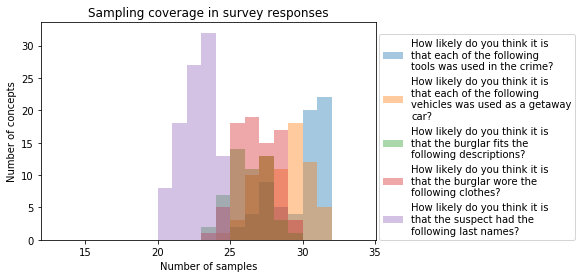

In [41]:
for Q, AS in scores.groupby(level=['Q']):
    plt.hist(AS['count'], bins=range(13,35), alpha=.4, histtype='stepfilled', label="\n".join(wrap(Q, 30)));
plt.legend(loc=(0,.25), bbox_to_anchor=(1.01,0))
plt.xlabel('Number of samples')
plt.ylabel('Number of concepts')
plt.title('Sampling coverage in survey responses');

Text(0, 0.5, 'Number of reports')

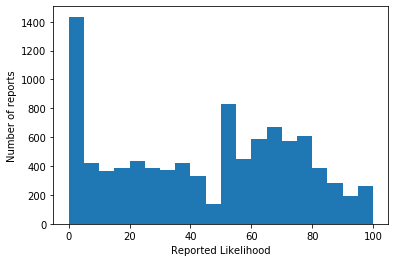

In [42]:
all_values = [j for i in scores.values for j in i[0]]
plt.hist(all_values, bins=range(0,105,5))
pd.value_counts(all_values)[50]
plt.xlabel('Reported Likelihood')
plt.ylabel('Number of reports')

In [43]:
print("%i respondents provided responses to an average of %.02f questions out of %i total." %(len(data.columns), 
                                                                    (data>-1).sum().mean(), 
                                                                    len(data.index)))
print("Each question was answered by an average of %.02f respondents" % (data>-1).sum(axis=1).mean())

135 respondents provided responses to an average of 70.66 questions out of 366 total.
Each question was answered by an average of 26.06 respondents


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


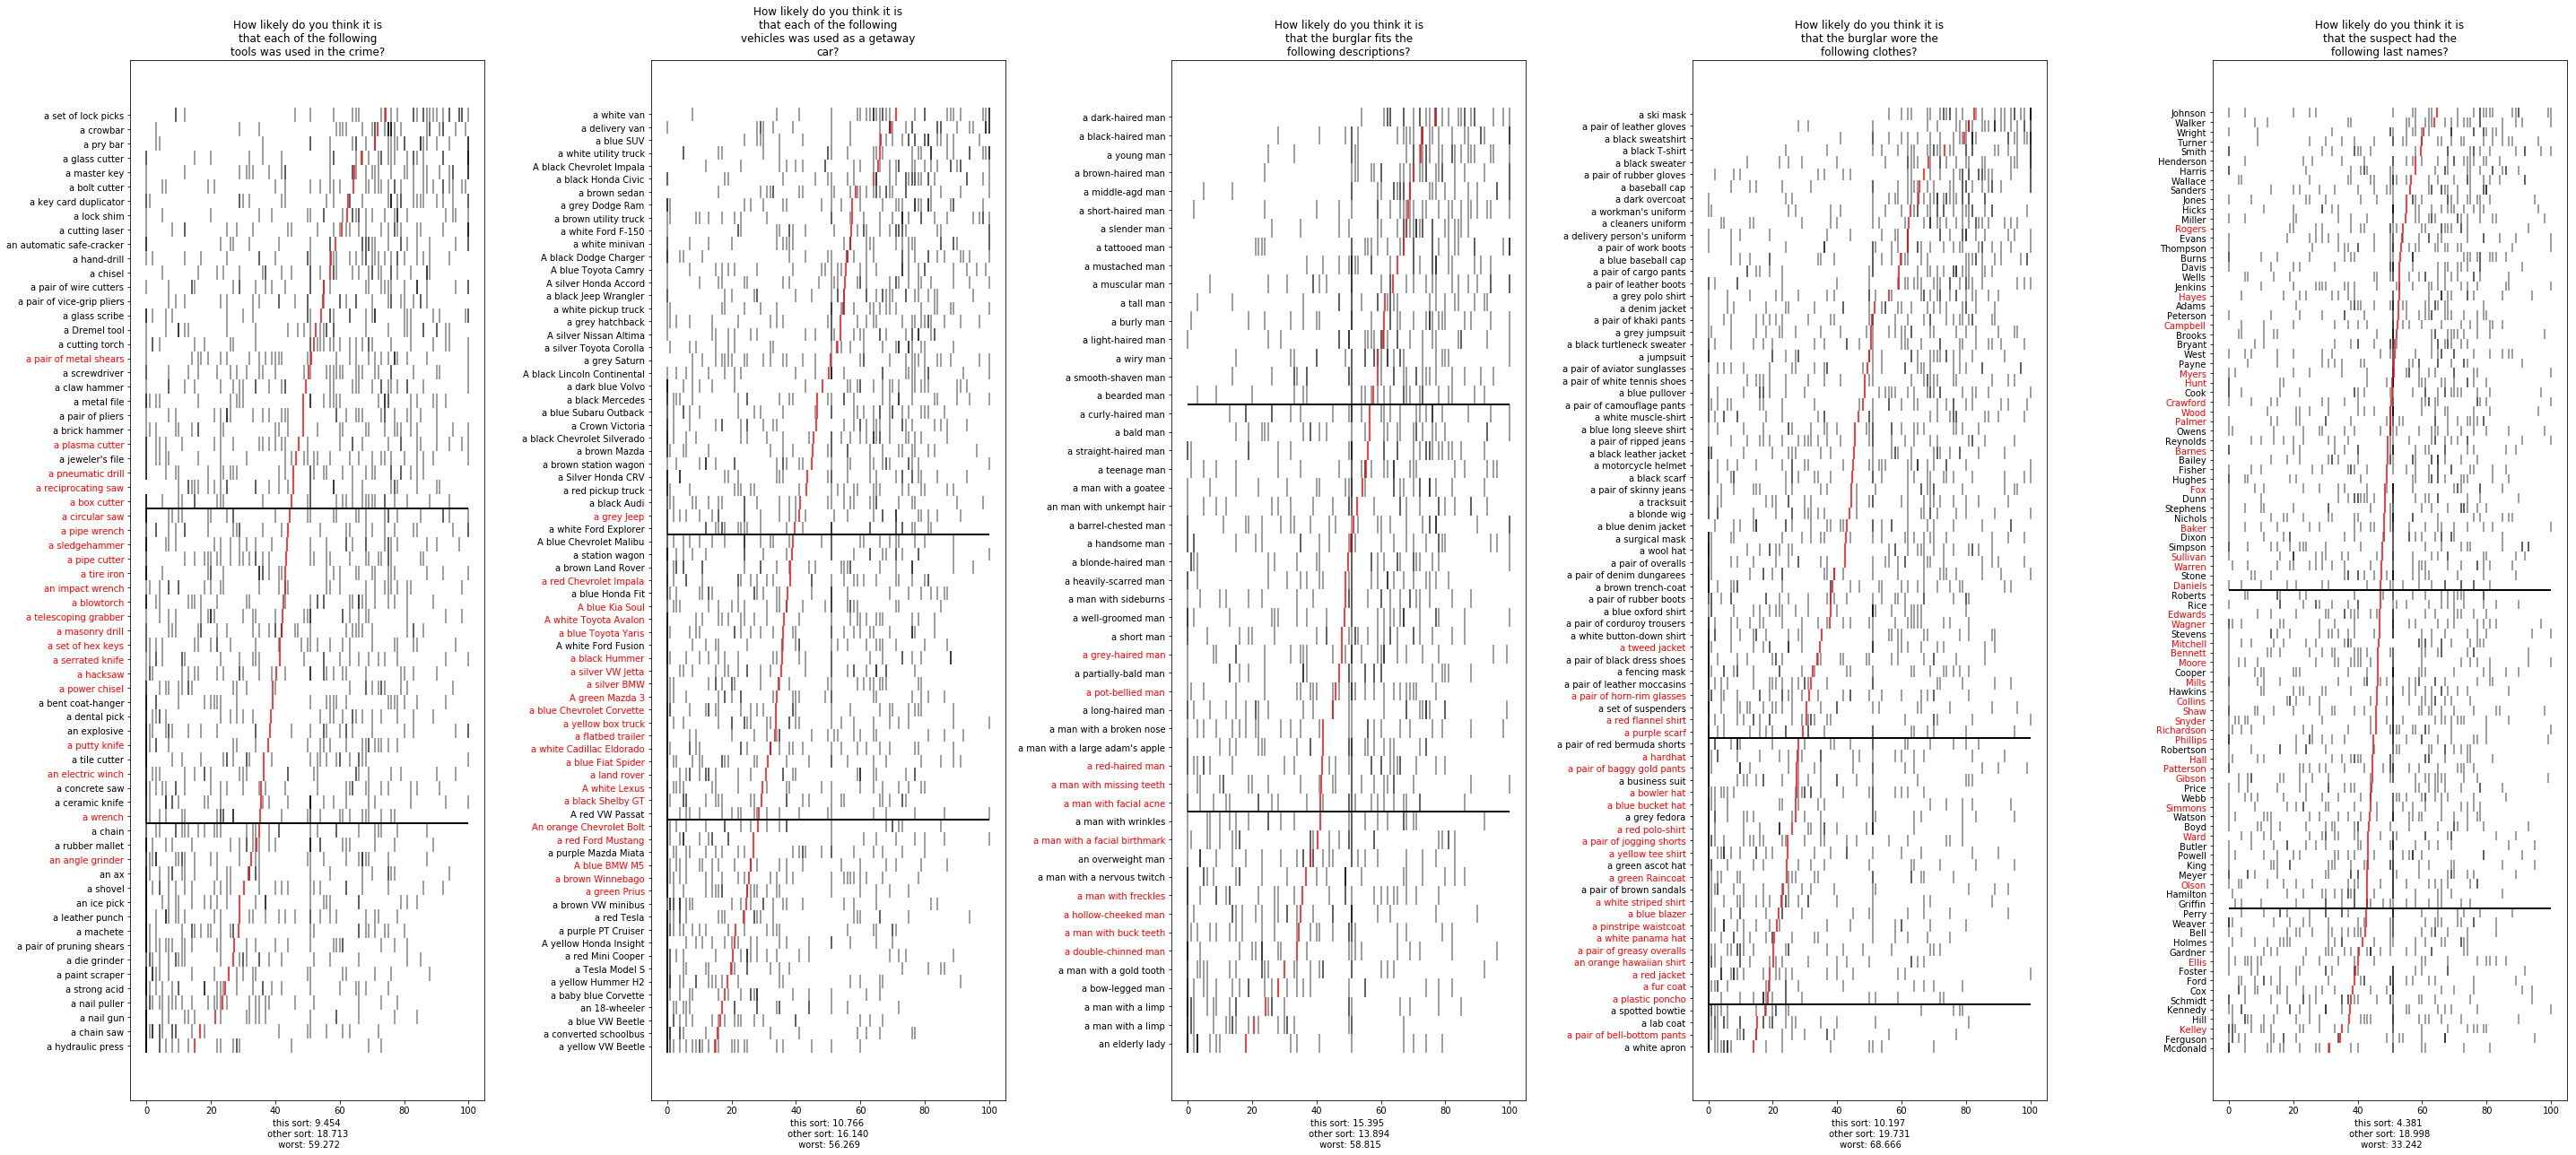

In [67]:
plt.figure(figsize=(40,18))
col = 1
keepers1 = {}
for Q, AS in scores.groupby(level=['Q']):  
    plt.subplot(1, 5, col)
    row = 0
    for A, res1 in AS.sort_values('mean').iterrows():
        plt.vlines(res1['scores'], row, row+1, alpha=.5)
        plt.vlines(res1['mean'], row, row+1, alpha=1, color='r')
        row +=1
    n_keep = 33 if Q == "How likely do you think it is that the suspect had the following last names?" else 22
    diffs = (AS.sort_values('mean')['mean'] - AS.sort_values('mean')['mean'].shift(n_keep)).reset_index(drop=True)
    first = diffs.idxmin()
    last = first-n_keep+1
    #print(first, last)
    plt.hlines([first+1, last], 0, 100, linewidth=2)
    plt.title("\n".join(wrap(Q, 30)))
    labels = AS.sort_values('mean').index.get_level_values('A')
    colors = ['r' if l in keepers3[Q] else 'k' for l in labels]
    plt.yticks(np.arange(0.5, row+0.5), labels)
    for tick, color in zip(plt.gca().get_yticklabels(), colors):
        tick.set_color(color)
    
    
    #print(labels[first], labels[last])
    keepers1[Q] = labels.values[last:first+1]
    plt.yticks(np.arange(0.5, row+0.5), labels)    
    
    other_set = AS['mean'].loc[Q,keepers3[Q]]
    plt.xlabel("this sort: %.03f \n other sort: %.03f \n worst: %.03f" %(diffs[first], 
                                                                         other_set.max()-other_set.min(),
                                                                         AS['mean'].max()-AS['mean'].min()))
    
    col += 1
    
plt.tight_layout()

a screwdriver -> a hacksaw
a blue Toyota Yaris -> a green Prius
a tall man -> a man with a large adam's apple
a white striped shirt -> a spotted bowtie
Snyder -> Butler


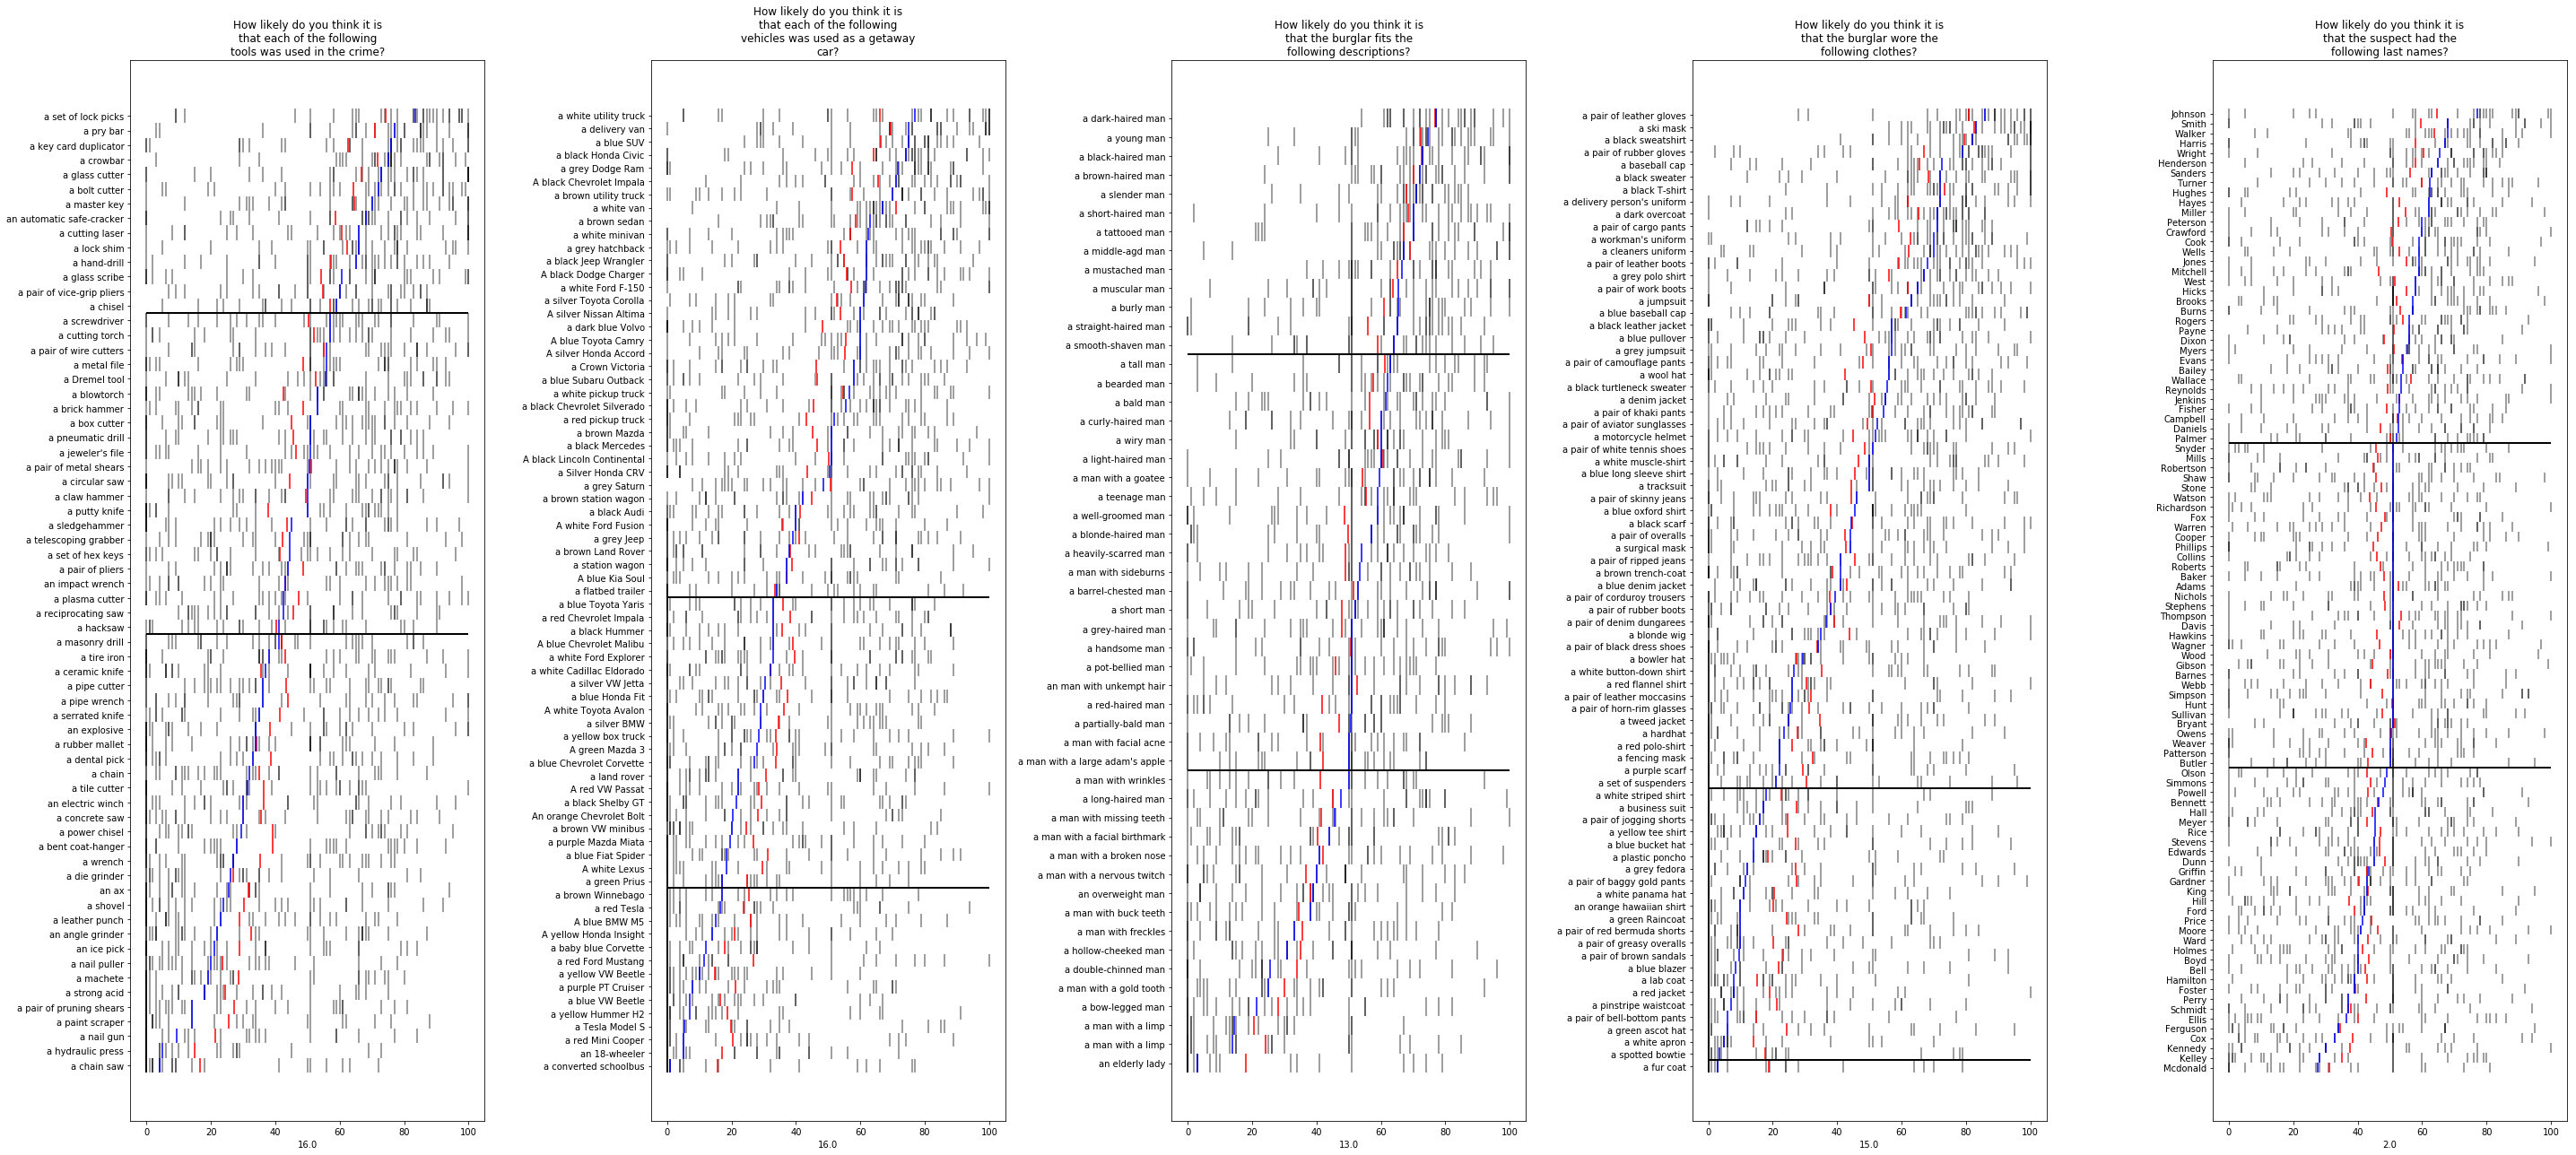

In [68]:
plt.figure(figsize=(40,18))
col = 1
keepers2 = {}
for Q, AS in scores.groupby(level=['Q']):  
    plt.subplot(1, 5, col)
    row = 0
    for A, res1 in AS.sort_values('median').iterrows():
        plt.vlines(res1['scores'], row, row+1, alpha=.5)
        plt.vlines(res1['mean'], row, row+1, alpha=1, color='r')
        plt.vlines(res1['median'], row, row+1, alpha=1, color='b')        
        row +=1
    n_keep = 33 if Q == "How likely do you think it is that the suspect had the following last names?" else 22
    diffs = (AS.sort_values('median')['median'] - AS.sort_values('median')['median'].shift(n_keep)).reset_index(drop=True)
    first = diffs.idxmin()
    last = first-n_keep+1
    plt.hlines([first+1, last], 0, 100, linewidth=2)
    plt.title("\n".join(wrap(Q, 30)))
    labels = AS.sort_values('median').index.get_level_values('A')
    print(labels[first], "->", labels[last])
    keepers2[Q] = labels.values[last:first+1]
    plt.yticks(np.arange(0.5, row+0.5), labels)    
    plt.xlabel(diffs[first])
    col += 1
    
plt.tight_layout()

In [42]:
def penalty(s, n_use):
    index = s.index
    ttest_list = [ttest_ind(s.loc[a][:n_use], s.loc[b][:n_use])[1] for a, b in itertools.combinations(index, 2)]
    return np.mean(1/np.array(ttest_list))
    

def climb(s, n_keep):
    if len(s) == n_keep:
        return s
    n_use = np.min([len(a) for a in s])
    subsets = list(itertools.combinations(s.index, len(s.index)-1))
    penalties = [penalty(s.loc[list(subset)], n_use) for subset in subsets]
    ix_best = np.argmin(penalties)
    print(penalties[ix_best])
    return climb(s.loc[list(subsets[ix_best])], n_keep)

In [ ]:
keepers = {}
for Q, AS in scores['scores'].groupby(level=['Q']):
    n_keep = 33 if Q == "How likely do you think it is that the suspect had the following last names?" else 22
    keepers[Q] = climb(AS, n_keep)

24764800.71369227
5544348.949668299
341905.84417227755
125308.01181546826
18878.60323249088
3866.35570336713
2202.5910080163926
1545.3922683295796
914.16208409051
332.0920516973417
215.4521159715383
98.12787583678349
75.80963882646931
53.07645827740491
35.27595479021268
25.931826079652144
19.931299542706565
16.451097849039932
14.090904183973354
11.847538115769925
10.52081908493519
9.270178240282407
7.970027864980972
7.092756527563761
6.201920513056714
5.445125982179862
4.9719229491360935
4.657912791770366
4.30583364280296
3.9436258098741566
3.540072222110287
3.1801846523929744
2.8374338573047893
2.5951614391207576
2.404786888882238
2.259264822949023
2.11517559060407
1.990383034929061
1.8499414858781627
1.6941753033429652
1.6325172806041148
1.5749636878340896
1.5291880098775703
1.4902387484384372
51807778.92233451
3324552.4964876254
1351661.2616385252
718762.4483641898
306967.0013945605
156493.0021185617
76095.56250499722


['a claw hammer', 'a pair of metal shears', 'a hacksaw', 'a circular saw', 'a sledgehammer', 'a reciprocating saw', 'a pair of wire cutters', 'a masonry drill', 'a metal file', 'a blowtorch', 'a plasma cutter', 'a cutting torch', 'a cutting laser', 'a pneumatic drill', 'a screwdriver', 'a pair of pliers', 'a pipe cutter', 'a box cutter', 'a Dremel tool', 'a glass scribe', 'a telescoping grabber', 'an automatic safe-cracker']
['a yellow box truck', 'a silver BMW', 'a grey Jeep', 'a blue Subaru Outback', 'a black Audi', 'a brown Land Rover', 'a blue Chevrolet Corvette', 'a brown Mazda', 'a station wagon', 'a black Hummer', 'a land rover', 'a red pickup truck', 'a flatbed trailer', 'a Crown Victoria', 'a blue Toyota Yaris', 'a black Mercedes', 'a red Chevrolet Impala', 'a Silver Honda CRV', 'a white Ford Explorer', 'a dark blue Volvo', 'a blue Honda Fit', 'a silver VW Jetta']
['a young woman', 'a red-haired man', 'a black-haired woman', 'a blonde-haired woman', 'a long-haired man', 'a sho

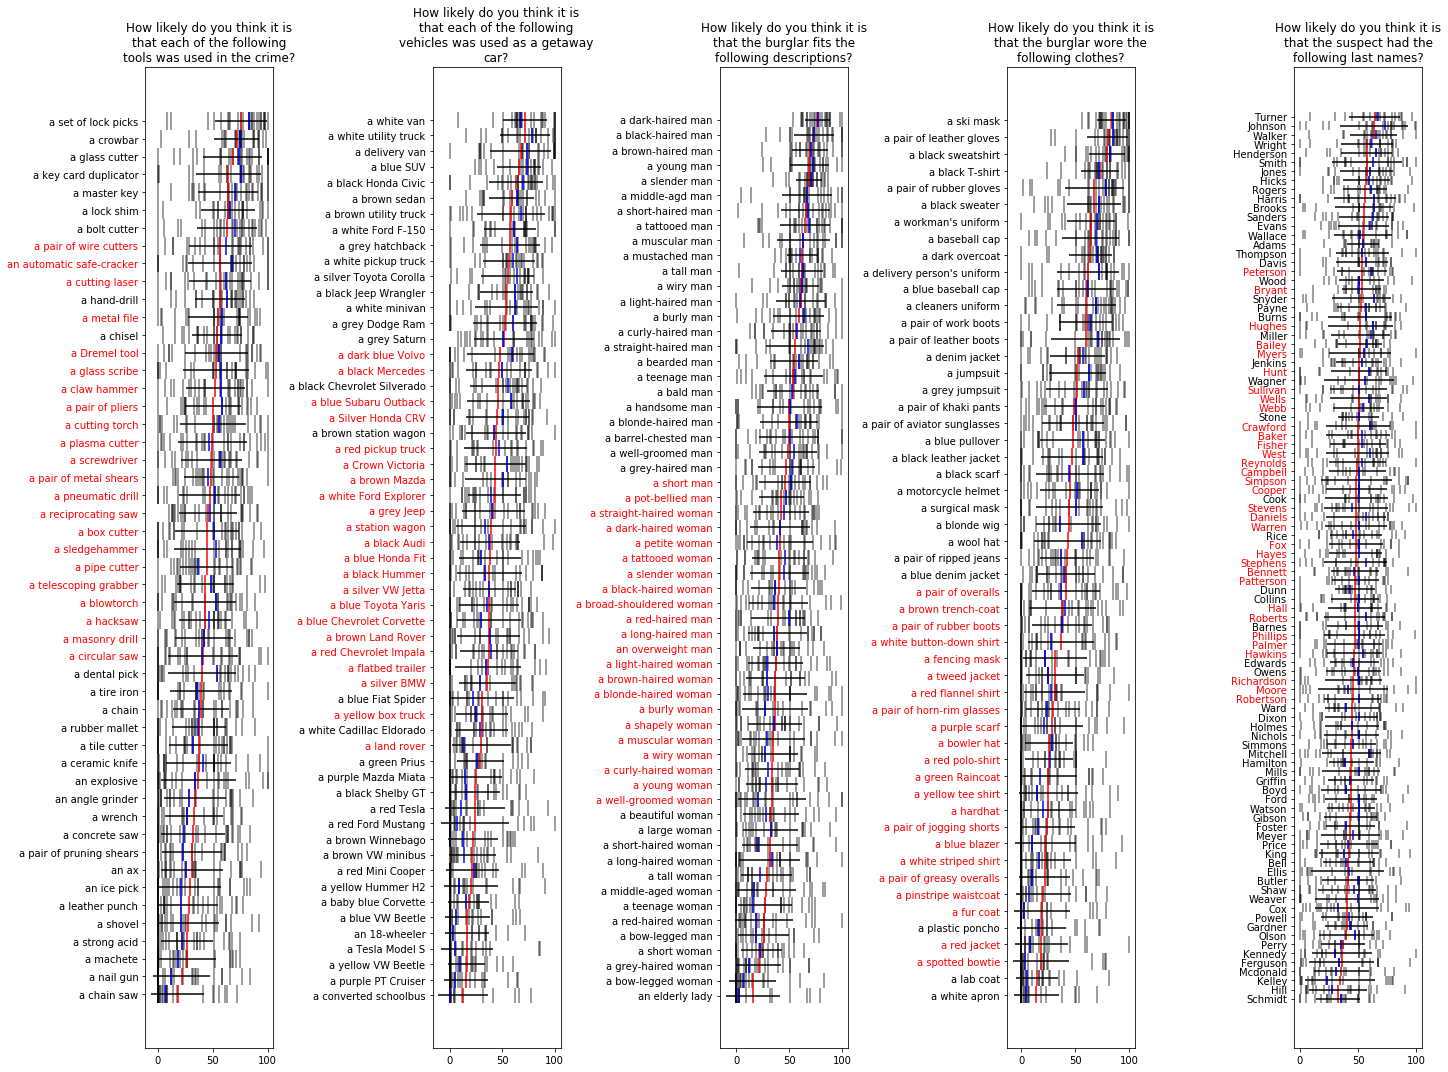

In [10]:
from textwrap import wrap

plt.figure(figsize=(20,15))
col = 1
for Q, AS in scores.groupby(level=['Q']):  
    plt.subplot(1, 5, col)
    row = 0
    for A, res1 in AS.sort_values('mean').iterrows():
        plt.vlines(res1['scores'], row, row+1, alpha=.5)
        plt.vlines(res1['mean'], row, row+1, alpha=1, color='r')
        plt.vlines(res1['median'], row, row+1, alpha=1, color='b')
        plt.hlines(row+0.5, res1['mean']-res1['std'], res1['mean']+res1['std'])
        row +=1
    labels = AS.sort_values('mean').index.get_level_values('A')
    #print(list(keepers[Q].index.get_level_values('A')))
    colors = ['r' if l in list(keepers[Q].index.get_level_values('A')) else 'k' for l in labels]
    plt.yticks(np.arange(0.5, row+0.5), labels)
    for tick, color in zip(plt.gca().get_yticklabels(), colors):
        tick.set_color(color)
#     for ytick, color in ax.get_yticklabels():
#         xtick.set_color('r' if xtick in list(keepers[Q].index.get_level_values('A')) else 'k')
    
    plt.title("\n".join(wrap(Q, 30)))
    col += 1
    
plt.tight_layout()

In [70]:
normed = pd.concat([AS.apply(lambda x: (x-np.mean(x))/np.std(x)) for Q, AS in data.groupby(level=['Q'])])
nscores = pd.DataFrame(index=normed.index)
nscores["scores"] = normed.apply(lambda r: [v for v in r if not np.isnan(v)], axis=1)
nscores['mean'] = nscores['scores'].apply(lambda x: np.mean(x))
nscores['median'] = nscores['scores'].apply(lambda x: np.median(x))
nscores['std'] = nscores['scores'].apply(lambda x: np.std(x))
nscores['count'] = nscores['scores'].apply(lambda x: len(x))
nscores.head()

scores  \
Q                                                  A                                                                           
How likely do you think it is that each of the ... a set of lock picks     [1.5966352563072588, 0.9546135596748366, 1.207...   
                                                   a claw hammer           [-0.8018448047139548, 2.6614435875050475, 1.11...   
                                                   a tire iron             [-1.229591074904069, 0.11522110097062689, 0.89...   
                                                   a pair of metal shears  [0.4656691042957804, 0.06411583609756356, 0.41...   
                                                   a concrete saw          [-1.7732878087051882, -0.8119279187945492, -0....   

                                                                               mean  \
Q                                                  A                                  
How likely do you think it is that each of the ... a set of lock picks     1.114538   
                                                   a claw hammer           0.229357   
                                                   a tire iron            -0.036103   
                                                   a pair of metal shears  0.088774   
                                                   a concrete saw         -0.214978   

                                                                             median  \
Q                                                  A                                  
How likely do you think it is that each of the ... a set of lock picks     1.434195   
                                                   a claw hammer           0.231899   
                                                   a tire iron            -0.071719   
                                                   a pair of metal shears  0.126920   
                                                   a concrete saw         -0.431630   

                                                                                std  \
Q                                                  A                                  
How likely do you think it is that each of the ... a set of lock picks     1.058057   
                                                   a claw hammer           0.978051   
                                                   a tire iron             0.849528   
                                                   a pair of metal shears  0.784049   
                                                   a concrete saw          0.929282   

                                                                           count  
Q                                                  A                              
How likely do you think it is that each of the ... a set of lock picks        29  
                                                   a claw hammer              30  
                                                   a tire iron                31  
                                                   a pair of metal shears     30  
                                                   a concrete saw             31

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


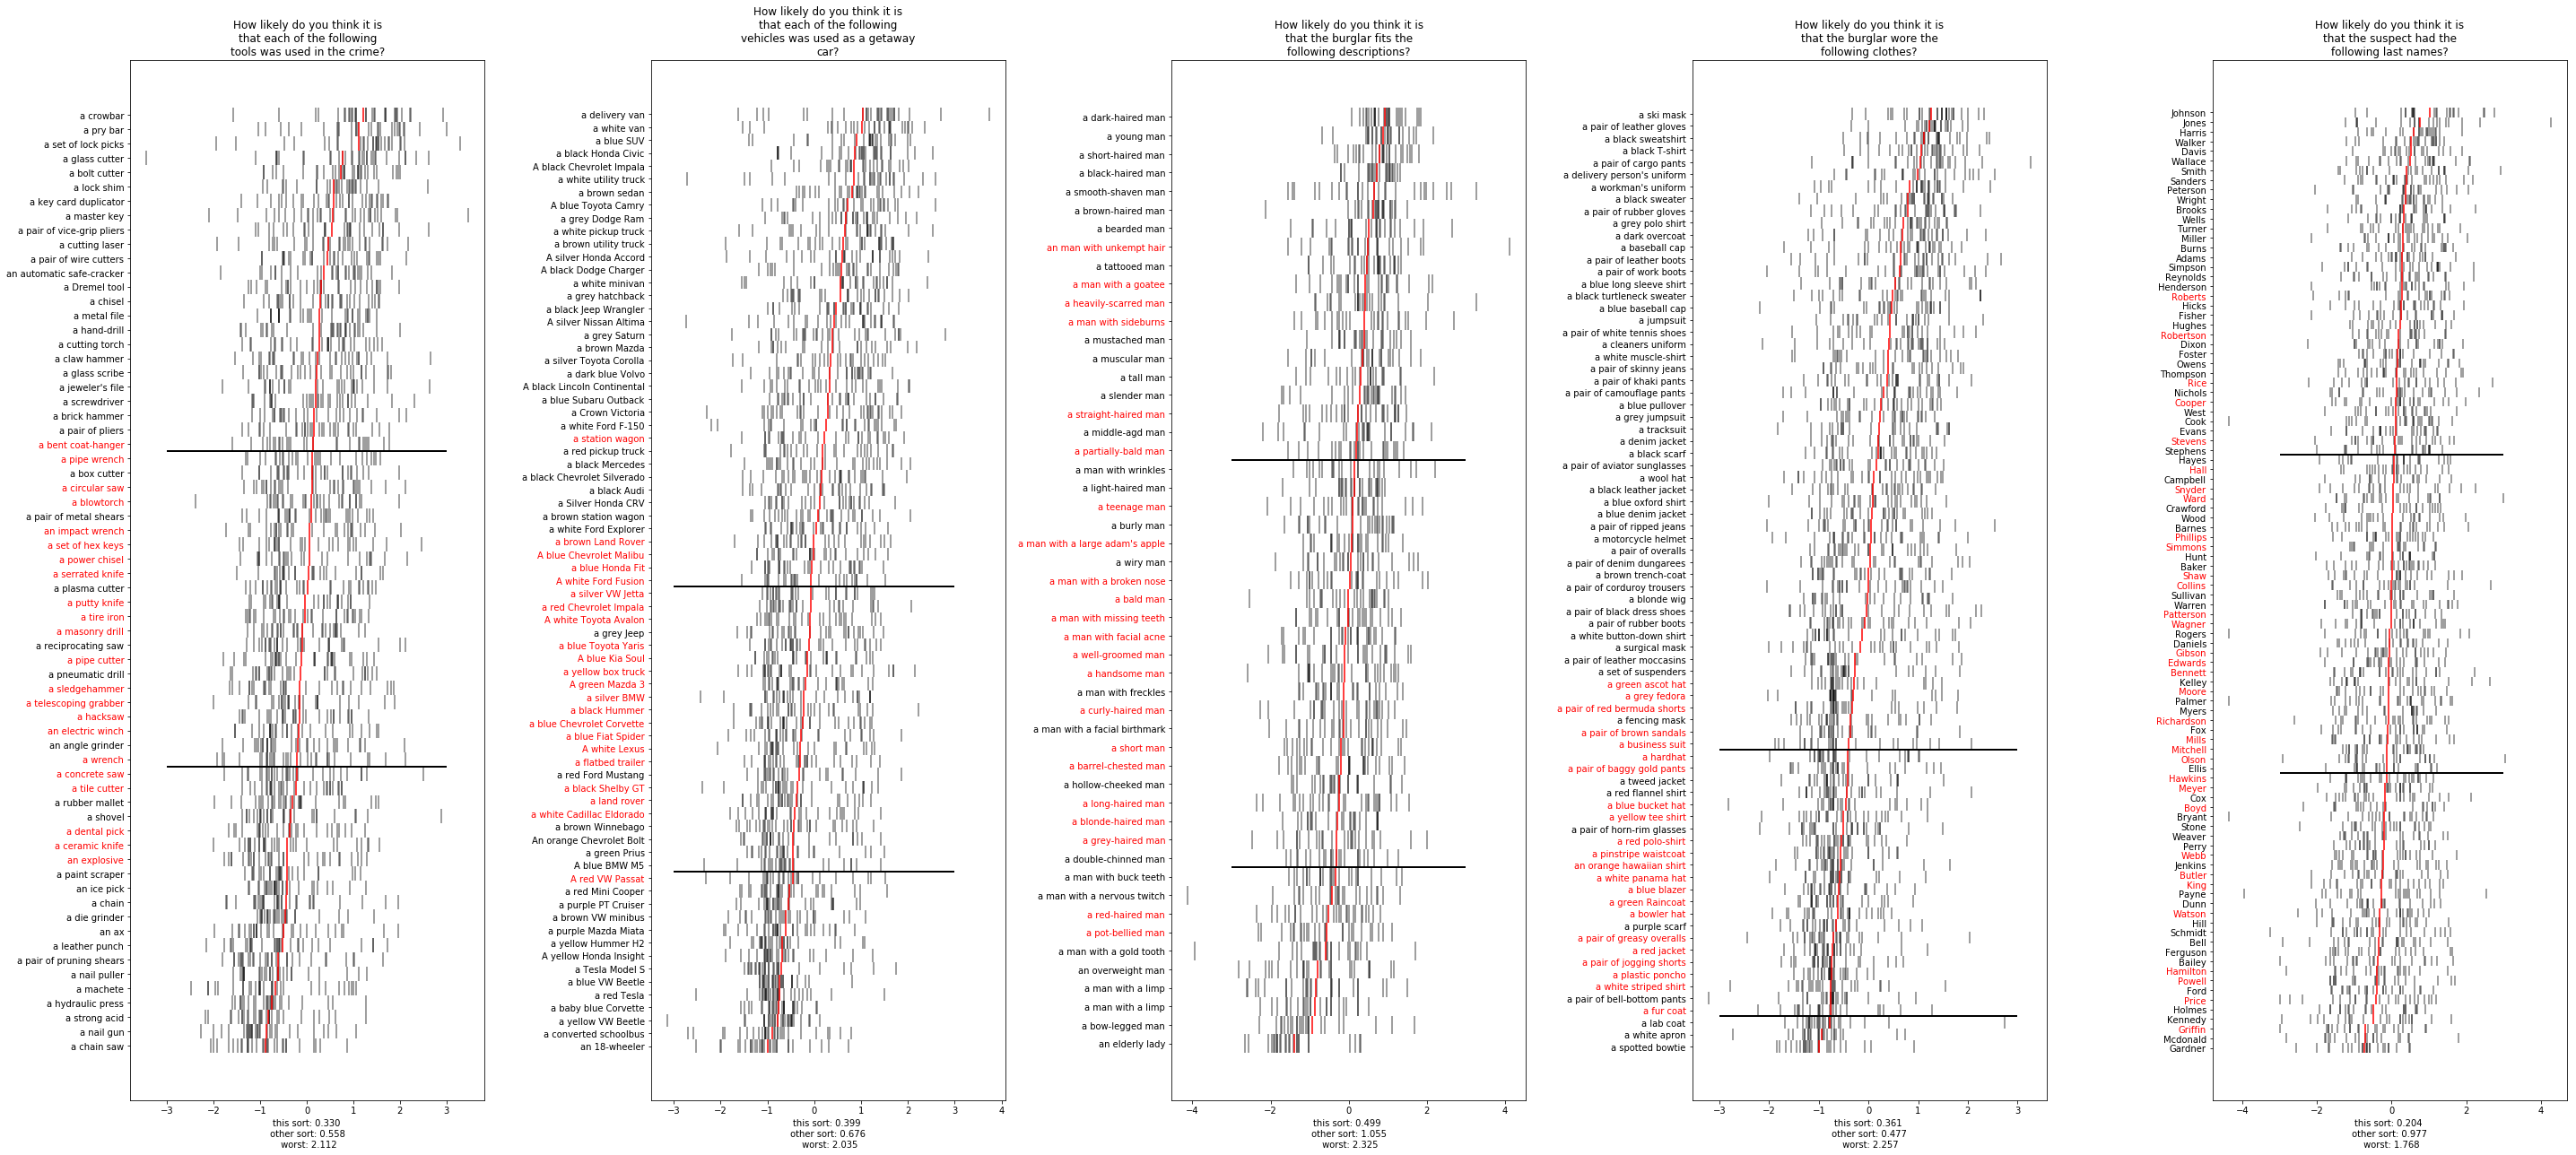

In [71]:
from textwrap import wrap

plt.figure(figsize=(40,18))
col = 1
keepers3 = {}
for Q, AS in nscores.groupby(level=['Q']):  
    plt.subplot(1, 5, col)
    row = 0
    for A, res1 in AS.sort_values('mean').iterrows():
        plt.vlines(res1['scores'], row, row+1, alpha=.5)
        plt.vlines(res1['mean'], row, row+1, alpha=1, color='r')
        row +=1
    n_keep = 33 if Q == "How likely do you think it is that the suspect had the following last names?" else 22
    diffs = (AS.sort_values('mean')['mean'] - AS.sort_values('mean')['mean'].shift(n_keep)).reset_index(drop=True)
    first = diffs.idxmin()
    last = first-n_keep+1
    #print(first, last)
    plt.hlines([first+1, last], -3, 3, linewidth=2)
    plt.title("\n".join(wrap(Q, 30)))
    
    
    
    labels = AS.sort_values('mean').index.get_level_values('A')
    colors = ['r' if l in keepers1[Q] else 'k' for l in labels]
    plt.yticks(np.arange(0.5, row+0.5), labels)
    for tick, color in zip(plt.gca().get_yticklabels(), colors):
        tick.set_color(color)
        
    keepers3[Q] = labels.values[last:first+1]
    
    plt.yticks(np.arange(0.5, row+0.5), labels)   
    
    other_set = AS['mean'].loc[Q,keepers1[Q]]
    
    plt.xlabel("this sort: %.03f \n other sort: %.03f \n worst: %.03f" %(diffs[first], 
                                                                         other_set.max()-other_set.min(),
                                                                         AS['mean'].max()-AS['mean'].min()))
    col += 1
    
plt.tight_layout()

# supporting control clues

In [45]:
data = pd.read_csv('../results-anonymized/pretest/Mystery object ranking 2 - extra details_September 24, 2019_11.45.csv').T
data['Q'] = data[0].apply(lambda x: x.split(' - ')[0] if ' - ' in x else x)
data['A'] = data[0].apply(lambda x: x.split(' - ')[1] if ' - ' in x else "")

data = data[~data['A'].str.contains('woman')]

data.set_index(["Q","A"], drop=True, inplace=True)
data = data.iloc[11:-6]
data.drop([0, 1], axis=1, inplace=True)
data = data.astype(float)
data.head()

2   \
Q                                                  A                                        
How likely do you think each of the following i... Someone seen walking a dog        38.0   
                                                   Someone seen jaywalking            NaN   
                                                   Someone seen smoking a cigarette   NaN   
                                                   Someone with a family              NaN   
                                                   Someone who is 30 years old        NaN   

                                                                                       3   \
Q                                                  A                                        
How likely do you think each of the following i... Someone seen walking a dog         NaN   
                                                   Someone seen jaywalking            NaN   
                                                   Someone seen smoking a cigarette  58.0   
                                                   Someone with a family              NaN   
                                                   Someone who is 30 years old        NaN   

                                                                                     4   \
Q                                                  A                                      
How likely do you think each of the following i... Someone seen walking a dog       NaN   
                                                   Someone seen jaywalking          NaN   
                                                   Someone seen smoking a cigarette NaN   
                                                   Someone with a family            NaN   
                                                   Someone who is 30 years old      NaN   

                                                                                       5   \
Q                                                  A                                        
How likely do you think each of the following i... Someone seen walking a dog         NaN   
                                                   Someone seen jaywalking           57.0   
                                                   Someone seen smoking a cigarette   NaN   
                                                   Someone with a family              NaN   
                                                   Someone who is 30 years old       57.0   

                                                                                       6   \
Q                                                  A                                        
How likely do you think each of the following i... Someone seen walking a dog         0.0   
                                                   Someone seen jaywalking            0.0   
                                                   Someone seen smoking a cigarette   NaN   
                                                   Someone with a family             75.0   
                                                   Someone who is 30 years old        0.0   

                                                                                      7   \
Q                                                  A                                       
How likely do you think each of the following i... Someone seen walking a dog        2.0   
                                                   Someone seen jaywalking           NaN   
                                                   Someone seen smoking a cigarette  7.0   
                                                   Someone with a family             NaN   
                                                   Someone who is 30 years old       NaN   

                                                                                       8   \
Q                                                  A                                        
How likely

In [46]:
scores = pd.DataFrame(index=data.index)
scores["scores"] = data.apply(lambda r: [int(v) for v in r if not np.isnan(v)], axis=1)
scores['mean'] = scores['scores'].apply(lambda x: np.mean(x))
scores['median'] = scores['scores'].apply(lambda x: np.median(x))
scores['std'] = scores['scores'].apply(lambda x: np.std(x))
scores['count'] = scores['scores'].apply(lambda x: len(x))
scores.head()

scores  \
Q                                                  A                                                                                     
How likely do you think each of the following i... Someone seen walking a dog        [38, 0, 2, 69, 6, 4, 51, 25, 31, 51, 97, 0, 31...   
                                                   Someone seen jaywalking           [57, 0, 21, 83, 50, 10, 80, 51, 24, 0, 80, 78,...   
                                                   Someone seen smoking a cigarette  [58, 7, 69, 89, 37, 81, 64, 66, 88, 65, 94, 39...   
                                                   Someone with a family             [75, 74, 19, 88, 25, 25, 42, 65, 75, 56, 42, 1...   
                                                   Someone who is 30 years old       [57, 0, 19, 32, 78, 75, 74, 72, 71, 73, 25, 40...   

                                                                                          mean  \
Q                                                  A                                             
How likely do you think each of the following i... Someone seen walking a dog        33.818182   
                                                   Someone seen jaywalking           51.409091   
                                                   Someone seen smoking a cigarette  62.000000   
                                                   Someone with a family             38.650000   
                                                   Someone who is 30 years old       51.571429   

                                                                                     median  \
Q                                                  A                                          
How likely do you think each of the following i... Someone seen walking a dog          29.0   
                                                   Someone seen jaywalking             56.0   
                                                   Someone seen smoking a cigarette    64.0   
                                                   Someone with a family               33.5   
                                                   Someone who is 30 years old         57.0   

                                                                                           std  \
Q                                                  A                                             
How likely do you think each of the following i... Someone seen walking a dog        26.964010   
                                                   Someone seen jaywalking           28.153248   
                                                   Someone seen smoking a cigarette  22.654759   
                                                   Someone with a family             26.348197   
                                                   Someone who is 30 years old       25.639574   

                                                                                     count  
Q                                                  A                                        
How likely do you think each of the following i... Someone seen walking a dog           22  
                                                   Someone seen jaywalking              22  
                                                   Someone seen smoking a cigarette     21  
                                                   Someone with a family                20  
                                                   Someone who is 30 years old          21

In [47]:
# works
d = scores.iloc[scores.index.get_level_values(1).str.contains('works')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
d

scores  \
Q                                                  A                                                                                                 
How likely do you think each of the following i... Someone who works in an industrial park       [38, 0, 10, 50, 23, 9, 36, 10, 63, 97, 0, 68, ...   
                                                   Someone who works in the garment district     [69, 2, 77, 51, 10, 27, 2, 51, 0, 94, 22, 31, ...   
                                                   Someone who works on the north shore          [68, 4, 21, 68, 51, 65, 8, 59, 31, 28, 96, 51,...   
                                                   Someone who works in the inner city           [4, 67, 81, 29, 23, 70, 80, 63, 71, 0, 0, 53, ...   
                                                   Someone who works in the arts district        [2, 27, 50, 90, 34, 43, 21, 0, 27, 69, 11, 87,...   
                                                   Someone who works in the business district    [70, 3, 93, 9, 22, 7, 60, 96, 34, 0, 85, 64, 1...   
                                                   Someone who works in the commercial district  [2, 78, 51, 62, 2, 71, 51, 9, 0, 75, 51, 67, 3...   
                                                   Someone who works by the port                 [73, 0, 51, 58, 82, 27, 60, 0, 51, 85, 51, 51,...   
                                                   Someone who works in the west side            [45, 3, 3, 74, 65, 51, 15, 10, 89, 51, 94, 57,...   
                                                   Someone who works downtown                    [2, 89, 35, 50, 42, 66, 53, 74, 72, 68, 59, 60...   

                                                                                                      mean  \
Q                                                  A                                                         
How likely do you think each of the following i... Someone who works in an industrial park       34.050000   
                                                   Someone who works in the garment district     36.700000   
                                                   Someone who works on the north shore          44.863636   
                                                   Someone who works in the inner city           44.904762   
                                                   Someone who works in the arts district        45.000000   
                                                   Someone who works in the business district    45.142857   
                                                   Someone who works in the commercial district  46.450000   
                                                   Someone who works by the port                 48.600000   
                                                   Someone who works in the west side            48.952381   
                                                   Someone who works downtown                    50.285714   

                                                                                                 median  \
Q                                                  A                                                      
How likely do you think each of the following i... Someone who works in an industrial park         29.0   
                                                   Someone who works in the garment district       30.5   
                                                   Someone who works on the north shore            41.5   
                                                   Someone who works in the inner city             51.0   
                                                   Someone who works in the arts district          46.5   
                                                   Someone who works in the business district      46.0   
                                                   Someone who works in the commercial district    51.0   
                                                   Some

In [48]:
# hometown
d = scores.iloc[scores.index.get_level_values(1).str.contains('from')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-8)
d

scores  \
Q                                                  A                                                                                                 
How likely do you think each of the following i... Someone from Barrington                       [22, 39, 0, 15, 37, 56, 51, 51, 0, 34, 30, 35,...   
                                                   Someone from Farmington                       [9, 61, 37, 50, 44, 74, 72, 9, 0, 39, 14, 28, ...   
                                                   Someone from Hudson                           [0, 20, 36, 29, 61, 7, 30, 29, 52, 62, 32, 37,...   
                                                   Someone from Springfield                      [75, 0, 4, 27, 51, 26, 77, 34, 51, 10, 63, 11,...   
                                                   Someone from Cedarville                       [4, 42, 21, 51, 50, 15, 11, 51, 21, 1, 92, 51,...   
                                                   Someone from Appleton                         [0, 66, 1, 66, 23, 60, 74, 51, 4, 32, 58, 67, ...   
                                                   Someone from Mayfield                         [0, 22, 0, 62, 8, 67, 51, 30, 1, 94, 51, 38, 3...   
                                                   Someone from Deerfield                        [0, 51, 50, 10, 36, 30, 21, 50, 68, 63, 51, 37...   
                                                   Someone from Ipswich                          [73, 42, 51, 24, 36, 51, 19, 15, 0, 96, 36, 18...   
                                                   Someone from Georgetown                       [9, 42, 10, 66, 50, 31, 11, 51, 8, 0, 76, 70, ...   
                                                   Someone from Oakdale                          [0, 5, 50, 27, 64, 51, 6, 96, 94, 51, 34, 26, ...   
                                                   Someone from Rosemont                         [0, 8, 62, 25, 72, 18, 49, 16, 51, 85, 63, 37,...   
                                                   Someone from Kingston                         [78, 0, 5, 51, 76, 24, 72, 51, 22, 0, 72, 63, ...   
How likely do you think it is that the followin... Something that can be ordered from a catalog  [80, 68, 0, 50, 30, 21, 66, 33, 0, 80, 77, 81,...   

                                                                                                      mean  \
Q                                                  A                                                         
How likely do you think each of the following i... Someone from Barrington                       36.950000   
                                                   Someone from Farmington                       37.095238   
                                                   Someone from Hudson                           37.550000   
                                                   Someone from Springfield                      37.900000   
                                                   Someone from Cedarville                       38.272727   
                                                   Someone from Appleton                         38.380952   
                                                   Someone from Mayfield                         38.619048   
                                                   Someone from Deerfield                        39.750000   
                                                   Someone from Ipswich                          39.947368   
                                                   Someone from Georgetown                       40.727273   
                                                   Someone from Oakdale                          42.150000   
                                                   Someone from Rosemont                         42.238095   
                                                   Someone from Kingston                         46.571429   
How likely do you think it is that the followin... Something that can be ordered from a c

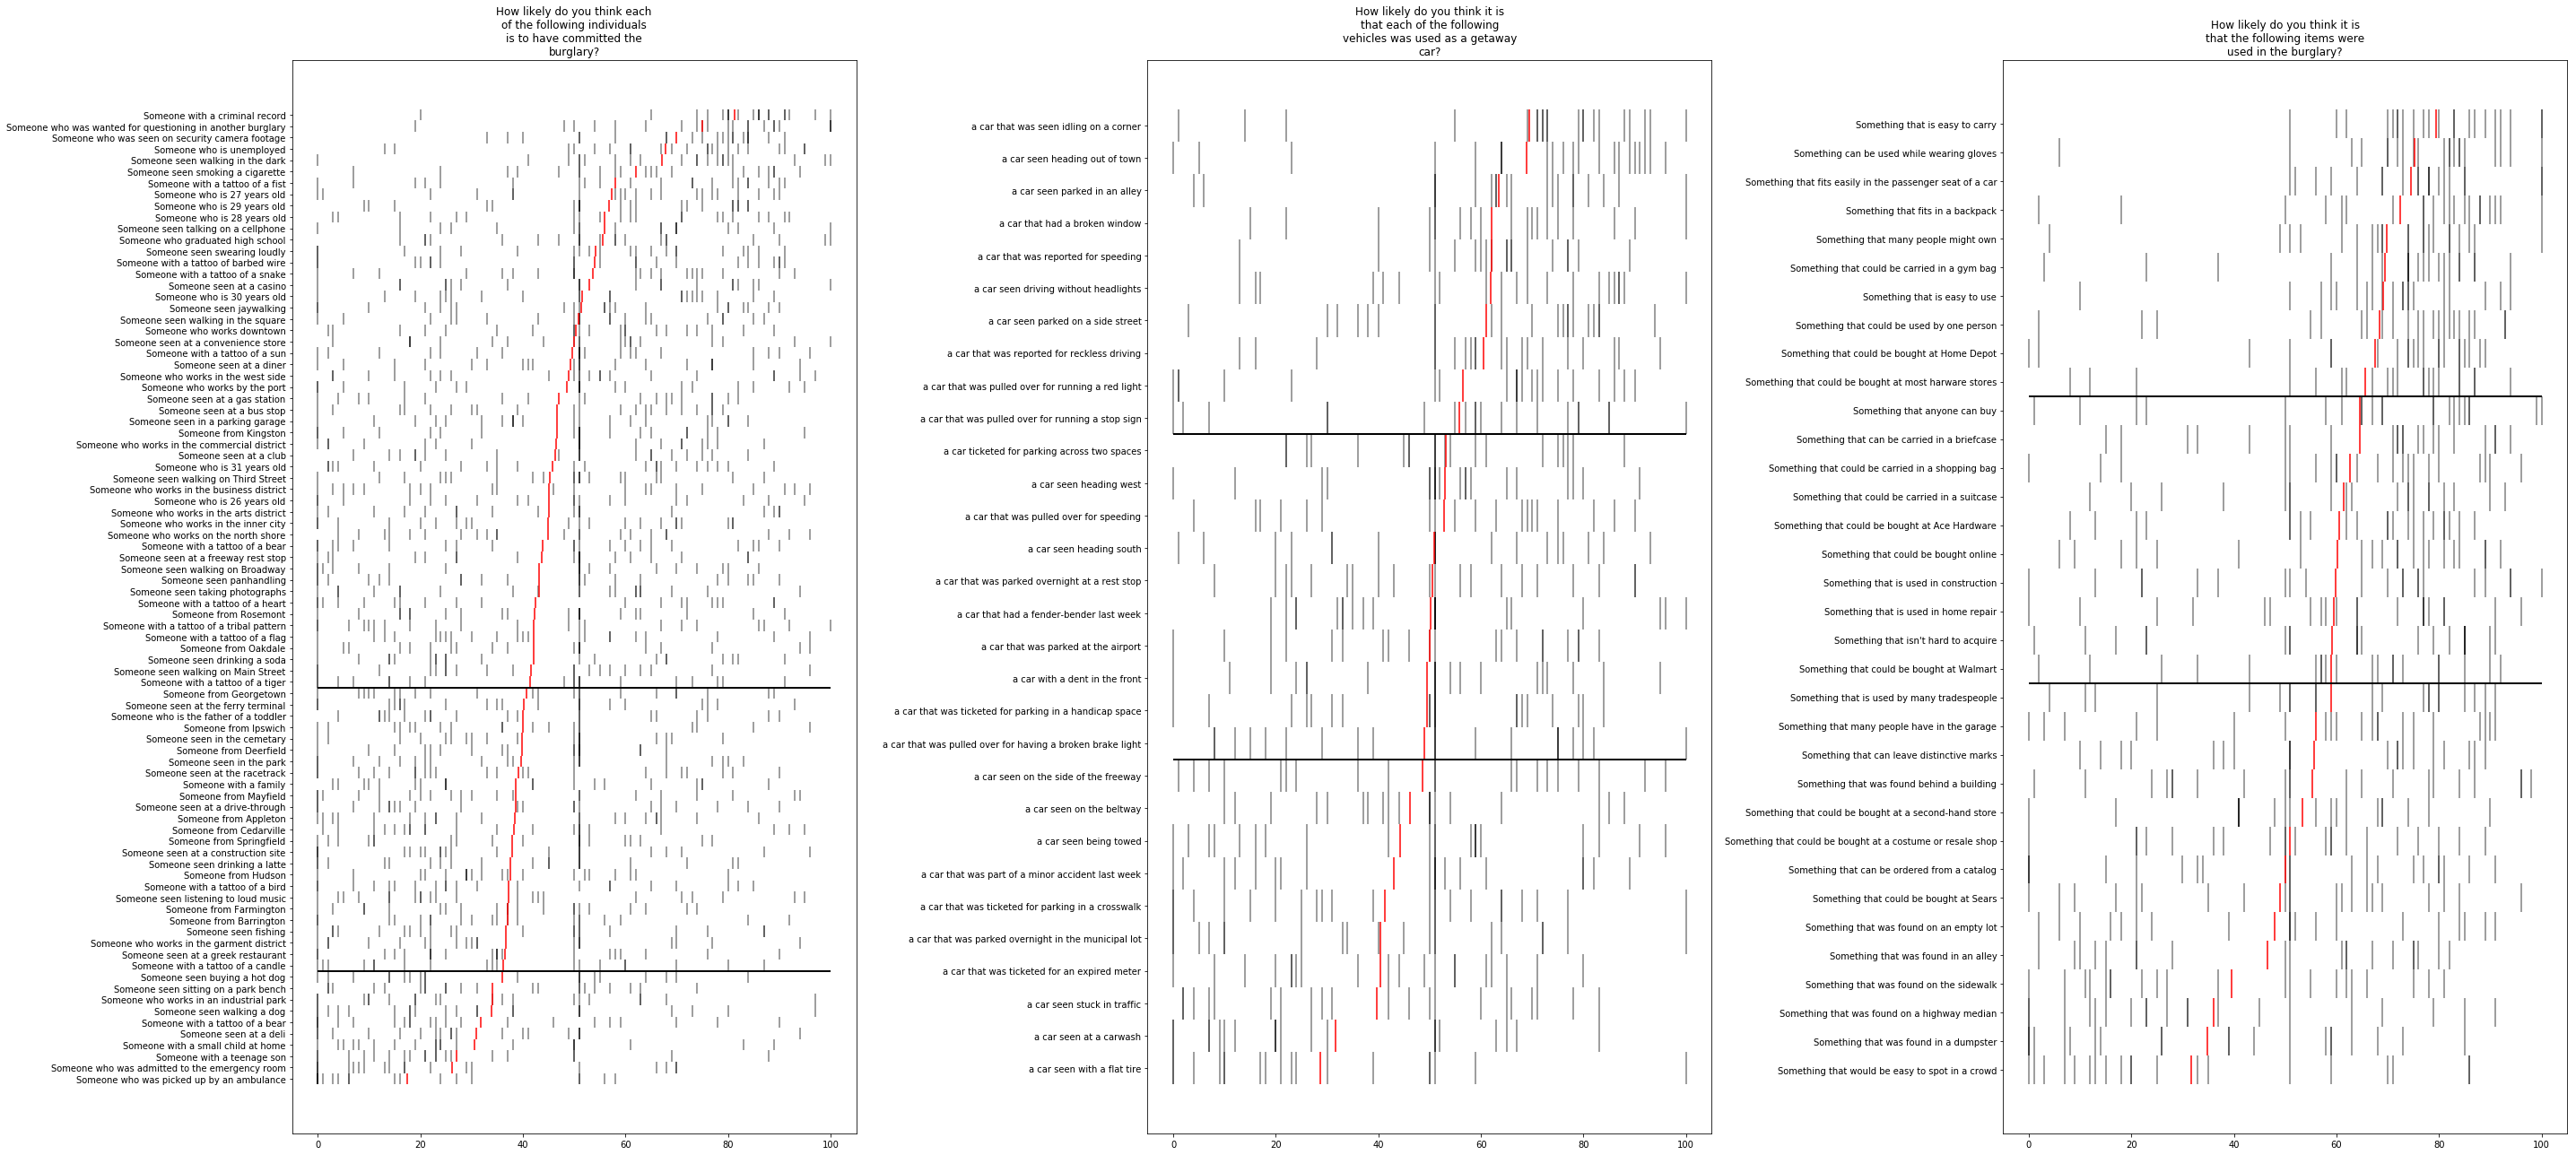

In [12]:
from textwrap import wrap

plt.figure(figsize=(40,18))
col = 1
keepers1 = {}
for Q, AS in scores.groupby(level=['Q']):  
    plt.subplot(1, 3, col)
    row = 0
    for A, res1 in AS.sort_values('mean').iterrows():
        plt.vlines(res1['scores'], row, row+1, alpha=.5)
        plt.vlines(res1['mean'], row, row+1, alpha=1, color='r')
        row +=1
        
        
    n_keep = 25 if col==1 else 10
    diffs = (AS.sort_values('mean')['mean'] - AS.sort_values('mean')['mean'].shift(n_keep)).reset_index(drop=True)
    first = diffs.idxmin()
    last = first-n_keep+1
    plt.hlines([first+1, last], 0, 100, linewidth=2)
    
    plt.title("\n".join(wrap(Q, 30)))
    labels = AS.sort_values('mean').index.get_level_values('A')
    #colors = ['r' if l in keepers3[Q] else 'k' for l in labels]
    colors = ['k' for l in labels]
    plt.yticks(np.arange(0.5, row+0.5), labels)
    for tick, color in zip(plt.gca().get_yticklabels(), colors):
        tick.set_color(color)
    
    
    #print(labels[first], labels[last])
#     keepers1[Q] = labels.values[last:first+1]
#     plt.yticks(np.arange(0.5, row+0.5), labels)    
    
#     other_set = AS['mean'].loc[Q,keepers3[Q]]
#     plt.xlabel("this sort: %.03f \n other sort: %.03f \n worst: %.03f" %(diffs[first], 
#                                                                          other_set.max()-other_set.min(),
#                                                                          AS['mean'].max()-AS['mean'].min()))
    
    col += 1
    
plt.tight_layout()

In [49]:
data = pd.read_csv('../results-anonymized/pretest/Mystery object ranking 3 - redo spurs_November 22, 2019_11.46.csv').T
data['Q'] = data[0].apply(lambda x: x.split(' - ')[0] if ' - ' in x else x)
data['A'] = data[0].apply(lambda x: x.split(' - ')[1] if ' - ' in x else "")

#data = data[~data['A'].str.contains('woman')]

data.set_index(["Q","A"], drop=True, inplace=True)
data = data.iloc[11:-6]
data.drop([0, 1], axis=1, inplace=True)
data = data.astype(float)
data.head()

2    \
Q                                                  A                                                         
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   

                                                                                                        3    \
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  70.0   
                                                   Someone matching the suspect's description was ...  69.0   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...   NaN   

                                                                                                       4    \
Q                                                  A                                                         
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   
                                                   Someone matching the suspect's description was ...  NaN   

                                                                                                        5    \
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  51.0   
                                                   Someone matching the suspect's description was ...  53.0   
                                                   Someone matching the suspect's description was ...  45.0   
                                                   Someone matching the suspect's description was ...  56.0   

                                                                                                        6    \
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  51.0   

                                                                                                        7    \
Q                                                  A                                                          
If pr

In [50]:

scores = pd.DataFrame(index=data.index)
scores["scores"] = data.apply(lambda r: [int(v) for v in r if not np.isnan(v)], axis=1)
scores['mean'] = scores['scores'].apply(lambda x: np.mean(x))
scores['median'] = scores['scores'].apply(lambda x: np.median(x))
scores['std'] = scores['scores'].apply(lambda x: np.std(x))
scores['count'] = scores['scores'].apply(lambda x: len(x))
scores.head()

scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [68, 78, 51, 10, 51, 4, 65, 50, 25, 28, 45, 51...   
                                                   Someone matching the suspect's description was ...  [70, 51, 34, 65, 0, 42, 50, 51, 55, 57, 53, 29...   
                                                   Someone matching the suspect's description was ...  [69, 53, 54, 3, 14, 51, 51, 3, 27, 66, 71, 76,...   
                                                   Someone matching the suspect's description was ...  [45, 45, 55, 73, 49, 77, 51, 64, 51, 51, 55, 3...   
                                                   Someone matching the suspect's description was ...  [56, 51, 82, 50, 0, 51, 50, 51, 28, 51, 50, 38...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  49.840000   
                                                   Someone matching the suspect's description was ...  51.520000   
                                                   Someone matching the suspect's description was ...  51.600000   
                                                   Someone matching the suspect's description was ...  54.185185   
                                                   Someone matching the suspect's description was ...  54.615385   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... Someone matching the suspect's description was ...    50.0   
                                                   Someone matching the suspect's description was ...    51.0   
                                                   Someone matching the suspect's description was ...    54.0   
                                                   Someone matching the suspect's description was ...    51.0   
                                                   Someone matching the suspect's description was ...    51.0   

                                                                                                             std  \
Q                                                  A                                                               
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  20.279408   
                                                   Someone matching the suspect's description was ...  19.419825   
                                                   Someone matching the suspect's description was ...  24.214046   
                                                   Someone matching the suspect's description was ...  15.294727   
                                                   Someone matching the suspect's description was ...  17.565431   

                                                                                                       count  
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...     25  
                                                   Someone matching the suspect's description was ...     25  
                                                   Someone matching the suspect's description was ...     25  
                                                   Someone matching the suspect'

In [93]:
# tattoo
d=scores.iloc[scores.index.get_level_values(1).str.contains('tattoo')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-8)
d

scores  \
Q                                                  A                                                                                          
If presented in court, how do you think the fol... The suspect has a tattoo of a flag     [7, 63, 10, 48, 52, 51, 61, 4, 55, 56, 51, 34,...   
                                                   The suspect has a tattoo of a flower   [50, 51, 57, 27, 25, 100, 30, 2, 55, 51, 51, 5...   
                                                   The suspect has a tattoo of a star     [51, 68, 11, 66, 52, 53, 51, 5, 59, 51, 51, 55...   
                                                   The suspect has a tattoo of a bird     [51, 51, 75, 69, 48, 68, 52, 65, 54, 72, 42, 4...   
                                                   The suspect has a tattoo of a fish     [51, 47, 49, 36, 55, 51, 51, 67, 94, 56, 50, 6...   
                                                   The suspect has a tattoo of a knot     [51, 94, 42, 86, 28, 50, 69, 46, 69, 50, 38, 6...   
                                                   The suspect has a tattoo of a heart    [85, 73, 67, 52, 97, 50, 51, 93, 57, 51, 51, 2...   
                                                   The suspect has a tattoo of a tiger    [54, 52, 37, 86, 55, 7, 53, 50, 56, 70, 80, 76...   
                                                   The suspect has a tattoo of a bear     [51, 54, 66, 32, 51, 76, 51, 68, 49, 57, 50, 8...   
                                                   The suspect has a tattoo of an anchor  [59, 48, 70, 35, 51, 51, 87, 52, 50, 51, 53, 6...   
                                                   The suspect has a tattoo of a dragon   [51, 83, 90, 30, 95, 41, 74, 53, 59, 50, 51, 8...   
                                                   The suspect has a tattoo of a snake    [76, 59, 97, 51, 51, 61, 59, 51, 61, 65, 51, 6...   
                                                   The suspect has a tattoo of a fist     [75, 70, 54, 52, 95, 51, 35, 48, 65, 59, 50, 6...   
                                                   The suspect has a tattoo of a skull    [51, 96, 59, 50, 57, 76, 4, 68, 64, 51, 81, 82...   
                                                   The suspect has a tattoo of a wolf     [91, 77, 79, 30, 52, 49, 88, 56, 60, 51, 50, 6...   

                                                                                               mean  \
Q                                                  A                                                  
If presented in court, how do you think the fol... The suspect has a tattoo of a flag     50.200000   
                                                   The suspect has a tattoo of a flower   51.296296   
                                                   The suspect has a tattoo of a star     53.000000   
                                                   The suspect has a tattoo of a bird     53.521739   
                                                   The suspect has a tattoo of a fish     54.038462   
                                                   The suspect has a tattoo of a knot     59.000000   
                                                   The suspect has a tattoo of a heart    59.111111   
                                                   The suspect has a tattoo of a tiger    59.652174   
                                                   The suspect has a tattoo of a bear     61.333333   
                                                   The suspect has a tattoo of an anchor  62.120000   
                                                   The suspect has a tattoo of a dragon   62.153846   
                                                   The suspect has a tattoo of a snake    62.666667   
                                                   The suspect has a tattoo of a fist     63.000000   
                                                   The suspect has a tattoo of a skull    63.840000   
                                                   Th

In [92]:
# livesWith
d = scores.iloc[scores.index.get_level_values(1).str.contains('lives with')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-8)
d

scores  \
Q                                                  A                                                                                             
If presented in court, how do you think the fol... The suspect lives with their brother      [51, 51, 9, 50, 51, 9, 51, 60, 46, 73, 18, 51,...   
                                                   The suspect lives with their niece        [45, 2, 60, 76, 40, 48, 10, 51, 45, 50, 50, 44...   
                                                   The suspect lives with their son          [46, 70, 32, 11, 53, 48, 42, 50, 51, 51, 50, 2...   
                                                   The suspect lives with their cousin       [50, 57, 11, 49, 49, 9, 51, 50, 51, 8, 51, 50,...   
                                                   The suspect lives with their daughter     [40, 34, 29, 50, 50, 35, 27, 42, 51, 50, 22, 2...   
                                                   The suspect lives with their grandmother  [48, 10, 50, 36, 42, 44, 79, 51, 52, 50, 51, 5...   
                                                   The suspect lives with their sister       [51, 52, 33, 7, 51, 36, 45, 30, 71, 50, 51, 72...   
                                                   The suspect lives with a friend           [68, 21, 51, 57, 29, 30, 42, 51, 51, 73, 49, 8...   
                                                   The suspect lives with their grandfather  [58, 9, 50, 49, 68, 54, 29, 51, 50, 51, 62, 74...   
                                                   The suspect lives with their uncle        [8, 56, 38, 21, 53, 51, 51, 70, 47, 65, 56, 51...   
                                                   The suspect lives with a roommate         [32, 15, 51, 62, 51, 51, 62, 57, 35, 50, 55, 5...   
                                                   The suspect lives with their partner      [51, 50, 67, 43, 21, 50, 50, 88, 85, 50, 50, 5...   
                                                   The suspect lives with their mother       [51, 55, 38, 66, 35, 51, 51, 32, 51, 59, 36, 5...   
                                                   The suspect lives with their nephew       [56, 45, 46, 50, 51, 51, 70, 51, 81, 89, 49, 5...   
                                                   The suspect lives with their aunt         [46, 59, 35, 50, 38, 51, 50, 44, 51, 62, 50, 5...   
                                                   The suspect lives with their spouse       [51, 59, 56, 43, 32, 51, 45, 3, 51, 53, 51, 10...   
                                                   The suspect lives with their father       [74, 51, 71, 10, 51, 28, 51, 51, 64, 50, 45, 4...   

                                                                                                  mean  \
Q                                                  A                                                     
If presented in court, how do you think the fol... The suspect lives with their brother      36.291667   
                                                   The suspect lives with their niece        39.590909   
                                                   The suspect lives with their son          43.192308   
                                                   The suspect lives with their cousin       44.173913   
                                                   The suspect lives with their daughter     45.370370   
                                                   The suspect lives with their grandmother  46.476190   
                                                   The suspect lives with their sister       47.500000   
                                                   The suspect lives with a friend           47.640000   
                                                   The suspect lives with their grandfather  48.423077   
                                                   The suspect lives with their uncle        48.538462   
                                                   The suspect lives with a roommate     

In [91]:
# street
d = scores.iloc[(scores.index.get_level_values(1).str.contains('lives on') | 
                scores.index.get_level_values(1).str.contains('seen on')) &
               ~scores.index.get_level_values(1).str.contains('seen on the') &
               ~scores.index.get_level_values(1).str.contains('seen on a')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-11)
d

scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... Someone matching the suspect's description live...  [51, 19, 51, 5, 45, 49, 3, 51, 63, 53, 40, 51,...   
                                                   Someone matching the suspect's description live...  [51, 25, 51, 6, 51, 63, 55, 50, 61, 51, 50, 50...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [51, 1, 42, 70, 26, 51, 52, 50, 51, 34, 51, 51...   
If presented in court, how do you think the fol... Someone matching the suspect's description live...  [72, 20, 49, 52, 71, 25, 50, 52, 51, 60, 77, 9...   
                                                   Someone matching the suspect's description live...  [84, 64, 0, 0, 46, 48, 45, 51, 74, 51, 80, 38,...   
                                                   Someone matching the suspect's description live...  [51, 45, 51, 30, 66, 50, 51, 51, 66, 44, 51, 5...   
                                                   Someone matching the suspect's description live...  [51, 84, 60, 50, 51, 70, 53, 51, 3, 40, 50, 91...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [51, 45, 39, 73, 51, 51, 25, 52, 51, 51, 51, 5...   
If presented in court, how do you think the fol... Someone matching the suspect's description live...  [51, 50, 52, 52, 51, 51, 51, 51, 51, 78, 35, 5...   
                                                   Someone matching the suspect's description live...  [86, 50, 49, 35, 55, 65, 51, 51, 51, 51, 50, 5...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [0, 74, 51, 51, 81, 51, 1, 56, 51, 51, 51, 51,...   
                                                   A person wearing this type of garment was seen ...  [51, 64, 51, 51, 51, 48, 75, 51, 50, 51, 51, 5...   
                                                   A person wearing this type of garment was seen ...  [65, 0, 68, 57, 51, 51, 62, 51, 51, 3, 51, 56,...   
If presented in court, how do you think the fol... Someone matching the suspect's description live...  [87, 51, 24, 69, 49, 51, 8, 51, 51, 39, 33, 77...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [58, 0, 69, 50, 23, 51, 74, 46, 78, 0, 74, 47,...   
                                                   A person wearing this type of garment was seen ...  [41, 41, 25, 77, 63, 51, 54, 51, 50, 51, 54, 5...   
If presented in court, how do you think the fol... Someone matching the suspect's description live...  [51, 51, 57, 32, 76, 64, 41, 51, 51, 50, 51, 5...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [57, 39, 66, 51, 50, 71, 51, 51, 0, 51, 55, 51...   
If presented in court, how do you think the fol... Someone matching the suspect's description live...  [78, 51, 49, 51, 50, 28, 50, 51, 50, 51, 50, 4...   
                                                   Someone matching the suspect's description live...  [64, 66, 66, 63, 49, 51, 51, 51, 77, 51, 60, 8...   
                                                   Someone matching the suspect's description live...  [1, 51, 51, 35, 61, 51, 51, 88, 50, 51, 71, 98...   
                                                   Someone matching the suspect's description live...  [73, 51, 61, 53, 48, 49, 51, 51, 50, 51, 49, 5...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [40, 51, 72, 51, 55, 77, 51, 2, 74, 83, 51, 51...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented 

In [59]:
# age
d = scores.iloc[scores.index.get_level_values(1).str.contains('years old')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-8)
d

scores  \
Q                                                  A                                                                                
If presented in court, how do you think the fol... The suspect is 30 years old  [10, 59, 60, 51, 50, 51, 62, 50, 50, 9, 50, 47...   
                                                   The suspect is 38 years old  [49, 59, 76, 51, 10, 37, 51, 31, 51, 51, 53, 4...   
                                                   The suspect is 37 years old  [51, 48, 63, 51, 52, 50, 51, 48, 50, 51, 3, 50...   
                                                   The suspect is 26 years old  [62, 68, 49, 34, 32, 51, 50, 50, 51, 50, 51, 5...   
                                                   The suspect is 28 years old  [28, 61, 10, 66, 52, 76, 51, 3, 50, 49, 5, 50,...   
                                                   The suspect is 39 years old  [1, 51, 75, 50, 32, 25, 53, 51, 48, 7, 59, 51,...   
                                                   The suspect is 31 years old  [51, 16, 51, 10, 50, 49, 79, 11, 51, 57, 52, 5...   
                                                   The suspect is 32 years old  [10, 51, 66, 50, 51, 65, 51, 42, 51, 50, 5, 51...   
                                                   The suspect is 36 years old  [51, 55, 63, 60, 52, 60, 51, 45, 8, 53, 6, 50,...   
                                                   The suspect is 34 years old  [6, 38, 51, 51, 51, 66, 51, 68, 50, 53, 50, 55...   
                                                   The suspect is 33 years old  [14, 68, 56, 49, 52, 78, 67, 49, 51, 51, 50, 4...   
                                                   The suspect is 27 years old  [55, 51, 61, 51, 33, 49, 74, 53, 70, 32, 50, 5...   
                                                   The suspect is 35 years old  [3, 56, 49, 52, 60, 51, 47, 4, 49, 49, 51, 99,...   
                                                   The suspect is 25 years old  [47, 51, 89, 51, 48, 72, 76, 76, 84, 51, 50, 5...   
                                                   The suspect is 29 years old  [56, 66, 10, 64, 70, 78, 51, 78, 61, 50, 77, 5...   

                                                                                     mean  \
Q                                                  A                                        
If presented in court, how do you think the fol... The suspect is 30 years old  44.652174   
                                                   The suspect is 38 years old  46.920000   
                                                   The suspect is 37 years old  46.960000   
                                                   The suspect is 26 years old  47.272727   
                                                   The suspect is 28 years old  47.600000   
                                                   The suspect is 39 years old  47.833333   
                                                   The suspect is 31 years old  48.720000   
                                                   The suspect is 32 years old  48.958333   
                                                   The suspect is 36 years old  50.800000   
                                                   The suspect is 34 years old  51.000000   
                                                   The suspect is 33 years old  51.320000   
                                                   The suspect is 27 years old  51.925926   
                                                   The suspect is 35 years old  53.080000   
                                                   The suspect is 25 years old  56.230769   
                                                   The suspect is 29 years old  57.680000   

                                                                                median  \
Q                                                  A                                     
If presented in court, how do you think the fol... The suspect is 30 years old    50.0   
         

In [90]:
# clothingRandom
d = scores.iloc[scores.index.get_level_values(1).str.contains('This type of garment') &
            ~scores.index.get_level_values(1).str.contains('purchased')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
d

scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... This type of garment is worn by many people         [41, 39, 39, 32, 0, 4, 51, 43, 40, 3, 66, 35, ...   
                                                   This type of garment catches your attention         [51, 39, 42, 22, 51, 35, 64, 31, 29, 24, 0, 51...   
                                                   This type of garment can be comfortable to wear     [44, 51, 53, 67, 63, 0, 29, 53, 55, 41, 48, 51...   
                                                   This type of garment is easy to acquire             [51, 51, 51, 29, 50, 51, 51, 1, 77, 51, 65, 25...   
                                                   This type of garment could be worn in any season    [51, 51, 83, 56, 48, 71, 51, 51, 51, 51, 71, 4...   
                                                   This type of garment comes in a range of sizes      [51, 49, 51, 49, 54, 23, 54, 50, 51, 54, 23, 5...   
                                                   This type of garment is easy to put on and take...  [61, 56, 75, 60, 71, 51, 51, 78, 77, 68, 51, 5...   
                                                   This type of garment is highly recognizable         [39, 69, 79, 100, 68, 31, 40, 39, 51, 35, 55, ...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type of garment is worn by many people         41.750000   
                                                   This type of garment catches your attention         47.750000   
                                                   This type of garment can be comfortable to wear     48.151515   
                                                   This type of garment is easy to acquire             51.366667   
                                                   This type of garment could be worn in any season    51.558824   
                                                   This type of garment comes in a range of sizes      53.588235   
                                                   This type of garment is easy to put on and take...  58.969697   
                                                   This type of garment is highly recognizable         60.181818   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... This type of garment is worn by many people           40.5   
                                                   This type of garment catches your attention           51.0   
                                                   This type of garment can be comfortable to wear       51.0   
                                                   This type of garment is easy to acquire               51.0   
                                                   This type of garment could be worn in any season      51.0   
                                                   This type of garment comes in a range of sizes        51.0   
                                                   This type of garment is easy to put on and take...    56.0   
                                                   This type of garment is highly recognizable           55.0   

                                                                                                             std  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type 

In [89]:
# clothingPurchase
d = scores.iloc[scores.index.get_level_values(1).str.contains('garment') &
            scores.index.get_level_values(1).str.contains('purchase')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
d

scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... This type of garment could be purchased from a ...  [1, 67, 51, 35, 51, 0, 50, 51, 50, 52, 40, 51,...   
                                                   This type of garment could be purchased at a bi...  [0, 69, 65, 51, 51, 74, 68, 51, 0, 72, 61, 50,...   
                                                   This type of garment could be purchased at a di...  [51, 62, 40, 81, 51, 50, 0, 51, 51, 51, 52, 49...   
                                                   This type of garment could be purchased at the ...  [51, 50, 51, 58, 65, 57, 51, 51, 51, 34, 52, 5...   
                                                   This type of garment could be purchased online      [68, 51, 74, 15, 61, 51, 76, 51, 50, 61, 72, 5...   
                                                   This type of garment could be purchased from a ...  [54, 51, 83, 66, 33, 51, 51, 48, 86, 2, 68, 51...   
                                                   This type of garment could be purchased at a ya...  [51, 34, 49, 60, 51, 45, 74, 52, 51, 35, 51, 5...   
                                                   This type of garment could be purchased from a ...  [72, 1, 64, 62, 80, 0, 51, 67, 77, 55, 76, 51,...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type of garment could be purchased from a ...  43.558824   
                                                   This type of garment could be purchased at a bi...  46.233333   
                                                   This type of garment could be purchased at a di...  49.285714   
                                                   This type of garment could be purchased at the ...  51.057143   
                                                   This type of garment could be purchased online      54.457143   
                                                   This type of garment could be purchased from a ...  54.939394   
                                                   This type of garment could be purchased at a ya...  56.096774   
                                                   This type of garment could be purchased from a ...  60.531250   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... This type of garment could be purchased from a ...    51.0   
                                                   This type of garment could be purchased at a bi...    51.0   
                                                   This type of garment could be purchased at a di...    51.0   
                                                   This type of garment could be purchased at the ...    51.0   
                                                   This type of garment could be purchased online        51.0   
                                                   This type of garment could be purchased from a ...    51.0   
                                                   This type of garment could be purchased at a ya...    51.0   
                                                   This type of garment could be purchased from a ...    63.5   

                                                                                                             std  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type 

In [149]:
# toolPurchase
d = scores.iloc[scores.index.get_level_values(1).str.contains('tool') &
            scores.index.get_level_values(1).str.contains('purchased')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-6)
d

scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... This type of tool could be purchased from a cat...  [53, 49, 51, 49, 51, 51, 51, 68, 51, 51, 55, 1...   
                                                   This type of tool could be purchased at a big-b...  [3, 71, 50, 27, 50, 53, 51, 55, 77, 61, 37, 64...   
                                                   This type of tool could be purchased at a depar...  [50, 51, 51, 91, 51, 14, 51, 51, 70, 51, 49, 5...   
                                                   This type of tool could be purchased from a dis...  [55, 71, 71, 46, 32, 54, 49, 51, 49, 60, 51, 5...   
                                                   This type of tool could be purchased from a con...  [51, 70, 44, 51, 49, 51, 73, 37, 51, 47, 51, 1...   
                                                   This type of tool could be purchased online         [1, 24, 70, 51, 0, 51, 53, 51, 51, 64, 68, 77,...   
                                                   This type of tool could be purchased at a garag...  [1, 51, 71, 57, 68, 1, 51, 66, 75, 80, 51, 49,...   
                                                   This type of tool could be purchased from an in...  [50, 42, 82, 50, 51, 49, 50, 1, 44, 48, 50, 51...   
                                                   This type of tool could be purchased at a tool ...  [51, 51, 31, 50, 35, 52, 51, 72, 51, 50, 51, 4...   
                                                   This type of tool could be purchased at a hardw...  [51, 38, 51, 88, 51, 51, 48, 72, 33, 59, 51, 5...   
                                                   This type of tool could be purchased secondhand     [51, 59, 75, 64, 51, 67, 54, 51, 52, 72, 51, 5...   
                                                   This type of tool could be purchased in the mall    [2, 66, 48, 43, 51, 76, 74, 51, 69, 50, 87, 51...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type of tool could be purchased from a cat...  45.708333   
                                                   This type of tool could be purchased at a big-b...  46.541667   
                                                   This type of tool could be purchased at a depar...  49.920000   
                                                   This type of tool could be purchased from a dis...  50.240000   
                                                   This type of tool could be purchased from a con...  50.619048   
                                                   This type of tool could be purchased online         51.739130   
                                                   This type of tool could be purchased at a garag...  51.772727   
                                                   This type of tool could be purchased from an in...  51.916667   
                                                   This type of tool could be purchased at a tool ...  53.782609   
                                                   This type of tool could be purchased at a hardw...  54.727273   
                                                   This type of tool could be purchased secondhand     57.280000   
                                                   This type of tool could be purchased in the mall    57.826087   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... This type of tool could be purchased from a cat...    51.0 

In [145]:
# toolCarry
d = scores.iloc[scores.index.get_level_values(1).str.contains('tool') &
            scores.index.get_level_values(1).str.contains('carried')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
print(len(d), d['c'].idxmax(), d['c'].max())
d

10 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular tool was used in the burglary?", 'This type of tool could be carried in a suitcase') -4.8660287081339675


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... This type of tool could be carried in a shoppin...  [42, 40, 64, 50, 71, 68, 53, 49, 51, 49, 54, 4...   
                                                   This type of tool could be carried in a suitcase    [65, 51, 56, 66, 55, 59, 65, 76, 84, 66, 51, 5...   
                                                   This type of tool could be carried in a toolbox     [71, 69, 79, 27, 51, 23, 64, 60, 51, 65, 49, 5...   
                                                   This type of tool could be carried in a box         [43, 70, 64, 51, 56, 42, 55, 51, 51, 100, 25, ...   
                                                   This type of tool could be carried in a duffel bag  [56, 38, 86, 57, 0, 80, 78, 80, 63, 51, 51, 14...   
                                                   This type of tool could be carried in an instru...  [51, 71, 51, 49, 51, 51, 81, 50, 41, 51, 85, 8...   
                                                   This type of tool could be carried in a briefcase   [75, 51, 68, 51, 54, 13, 19, 50, 42, 91, 89, 5...   
                                                   This type of tool could be carried in a messeng...  [54, 74, 74, 48, 31, 78, 54, 63, 51, 75, 40, 5...   
                                                   This type of tool could be carried in a backpack    [75, 31, 51, 51, 80, 1, 51, 80, 51, 87, 53, 51...   
                                                   This type of tool could be carried in a gym bag     [73, 73, 71, 51, 37, 22, 51, 51, 85, 70, 57, 8...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type of tool could be carried in a shoppin...  50.869565   
                                                   This type of tool could be carried in a suitcase    52.818182   
                                                   This type of tool could be carried in a toolbox     52.880000   
                                                   This type of tool could be carried in a box         54.636364   
                                                   This type of tool could be carried in a duffel bag  56.260870   
                                                   This type of tool could be carried in an instru...  57.428571   
                                                   This type of tool could be carried in a briefcase   57.684211   
                                                   This type of tool could be carried in a messeng...  59.347826   
                                                   This type of tool could be carried in a backpack    61.272727   
                                                   This type of tool could be carried in a gym bag     62.545455   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... This type of tool could be carried in a shoppin...    51.0   
                                                   This type of tool could be carried in a suitcase      55.5   
                                                   This type of tool could be carried in a toolbox       51.0   
                                                   This type of tool could be carried in a box           51.0   
                                                   This type of tool could be carried in a duffel bag    56.0   
                                                   This type of tool could be carried in 

In [144]:
# toolSeen
d = scores.iloc[scores.index.get_level_values(1).str.contains('tool') &
            scores.index.get_level_values(1).str.contains('seen')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
print(len(d), d['c'].idxmax(), d['c'].max())
d

12 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular tool was used in the burglary?", 'A tool of this type was seen in a warehouse') -5.867424242424242


scores  \
Q                                                  A                                                                                                     
If presented in court, how do you think the fol... A tool of this type was seen in a garage          [51, 38, 38, 25, 42, 27, 1, 51, 51, 50, 98, 20...   
                                                   A tool of this type was seen in a driveway        [51, 38, 75, 83, 50, 94, 1, 41, 51, 59, 74, 51...   
                                                   A tool of this type was seen behind a building    [71, 63, 51, 64, 41, 2, 51, 51, 49, 55, 51, 69...   
                                                   A tool of this type was seen in a warehouse       [60, 51, 61, 51, 24, 83, 48, 51, 50, 49, 50, 4...   
                                                   A tool of this type was seen in a workshop        [62, 37, 50, 80, 51, 46, 51, 72, 59, 53, 97, 5...   
                                                   A tool of this type was seen on a highway median  [51, 52, 2, 40, 62, 79, 18, 52, 77, 65, 48, 29...   
                                                   A tool of this type was seen on a sidewalk        [51, 83, 51, 83, 51, 50, 73, 51, 58, 50, 62, 5...   
                                                   A tool of this type was seen in a shed            [51, 79, 66, 47, 66, 51, 84, 2, 51, 51, 52, 51...   
                                                   A tool of this type was seen in a parking lot     [51, 40, 43, 63, 84, 51, 51, 81, 53, 72, 87, 9...   
                                                   A tool of this type was seen beside a road        [51, 51, 64, 80, 53, 100, 50, 51, 60, 70, 74, ...   
                                                   A tool of this type was seen in an alley          [93, 54, 92, 64, 50, 71, 51, 96, 30, 51, 92, 6...   
                                                   A tool of this type was seen in a dumpster        [54, 90, 69, 33, 66, 82, 50, 71, 86, 57, 83, 5...   

                                                                                                          mean  \
Q                                                  A                                                             
If presented in court, how do you think the fol... A tool of this type was seen in a garage          44.083333   
                                                   A tool of this type was seen in a driveway        48.320000   
                                                   A tool of this type was seen behind a building    48.608696   
                                                   A tool of this type was seen in a warehouse       53.590909   
                                                   A tool of this type was seen in a workshop        55.440000   
                                                   A tool of this type was seen on a highway median  55.769231   
                                                   A tool of this type was seen on a sidewalk        56.954545   
                                                   A tool of this type was seen in a shed            58.440000   
                                                   A tool of this type was seen in a parking lot     59.458333   
                                                   A tool of this type was seen beside a road        62.750000   
                                                   A tool of this type was seen in an alley          67.227273   
                                                   A tool of this type was seen in a dumpster        67.380952   

                                                                                                     median  \
Q                                                  A                                                          
If presented in court, how do you think the fol... A tool of this type was seen in a garage            50.0   
                                                   A tool

In [143]:
# toolUse
d = scores.iloc[scores.index.get_level_values(1).str.contains('tool') &
                (scores.index.get_level_values(1).str.contains('used by') | 
                 scores.index.get_level_values(1).str.contains('used in'))].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
print(len(d), d['c'].idxmax(), d['c'].max())
d


9 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular tool was used in the burglary?", 'This type of tool is often used by builders') -6.771739130434781


scores  \
Q                                                  A                                                                                                    
If presented in court, how do you think the fol... This type of tool is often used by builders      [45, 36, 67, 34, 62, 75, 3, 44, 51, 51, 37, 66...   
                                                   This type of tool is often used by handymen      [66, 37, 59, 0, 51, 51, 51, 51, 51, 48, 50, 48...   
                                                   This type of tool is often used by repairmen     [49, 45, 50, 29, 22, 51, 72, 65, 51, 51, 51, 4...   
                                                   This type of tool is often used by contractors   [51, 3, 43, 33, 50, 75, 70, 72, 48, 51, 65, 51...   
                                                   This type of tool is often used by hobbyists     [8, 51, 60, 24, 81, 51, 49, 72, 55, 51, 50, 29...   
                                                   This type of tool is often used in demolition    [48, 51, 42, 0, 67, 14, 48, 84, 75, 51, 84, 84...   
                                                   This type of tool is often used by tradespeople  [50, 42, 73, 28, 51, 50, 53, 80, 26, 51, 98, 7...   
                                                   This type of tool could be used by one person    [56, 66, 51, 69, 45, 51, 56, 70, 66, 52, 51, 8...   
                                                   This type of tool is often used in construction  [42, 51, 61, 51, 51, 68, 75, 51, 89, 51, 51, 8...   

                                                                                                         mean  \
Q                                                  A                                                            
If presented in court, how do you think the fol... This type of tool is often used by builders      44.750000   
                                                   This type of tool is often used by handymen      48.681818   
                                                   This type of tool is often used by repairmen     50.095238   
                                                   This type of tool is often used by contractors   50.230769   
                                                   This type of tool is often used by hobbyists     51.041667   
                                                   This type of tool is often used in demolition    51.521739   
                                                   This type of tool is often used by tradespeople  56.363636   
                                                   This type of tool could be used by one person    61.636364   
                                                   This type of tool is often used in construction  63.909091   

                                                                                                    median  \
Q                                                  A                                                         
If presented in court, how do you think the fol... This type of tool is often used by builders        51.0   
                                                   This type of tool is often used by handymen        51.0   
                                                   This type of tool is often used by repairmen       51.0   
                                                   This type of tool is often used by contractors     51.0   
                                                   This type of tool is often used by hobbyists       51.0   
                                                   This type of tool is often used in demolition      51.0   
                                                   This type of tool is often used by tradespeople    51.0   
                                                   This type of tool could be used by one person      59.0   
                                                   This type of tool is often used in construction    56.0   

    

In [142]:
# toolRandom
d = scores.iloc[scores.index.get_level_values(1).str.contains('tool') &
                ~scores.index.get_level_values(1).str.contains('manufactured') &
                ~scores.index.get_level_values(1).str.contains('used by') &
                ~scores.index.get_level_values(1).str.contains('used in') &
                ~scores.index.get_level_values(1).str.contains('purchased') &
                ~scores.index.get_level_values(1).str.contains('seen') &
                ~scores.index.get_level_values(1).str.contains('carried')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
print(len(d), d['c'].idxmax(), d['c'].max())
d
# interesting that the tails are flatter. prefer the upper tail to make more engaging...

11 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular tool was used in the burglary?", 'This type of tool should be used with safety glasses') -7.60217391304348


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... This type of tool should be used with safety gl...  [3, 34, 28, 50, 51, 1, 51, 58, 51, 50, 51, 51,...   
                                                   This type of tool is often used for repair jobs     [51, 75, 23, 51, 63, 51, 47, 58, 52, 67, 37, 5...   
                                                   This type of tool has many applications             [51, 55, 66, 32, 31, 76, 51, 50, 0, 34, 51, 51...   
                                                   This type of tool is owned by lots of people        [36, 51, 73, 95, 26, 51, 0, 29, 41, 51, 52, 72...   
                                                   This type of tool lasts a long time                 [62, 2, 71, 81, 39, 55, 52, 51, 49, 74, 49, 51...   
                                                   This type of tool can be sent in the mail           [66, 51, 70, 50, 32, 51, 55, 56, 65, 53, 89, 5...   
                                                   This type of tool is easy to find                   [51, 83, 36, 64, 84, 51, 3, 62, 75, 64, 50, 75...   
                                                   This type of tool is easy to transport              [59, 56, 72, 74, 80, 54, 74, 37, 51, 51, 61, 7...   
                                                   This type of tool is fairly cheap                   [81, 51, 76, 65, 0, 76, 53, 52, 77, 51, 71, 71...   
                                                   This type of tool is not hard to use                [81, 55, 55, 51, 88, 51, 61, 79, 68, 80, 70, 5...   
                                                   This type of tool works quickly                     [81, 79, 63, 96, 0, 59, 71, 51, 63, 51, 67, 49...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type of tool should be used with safety gl...  47.050000   
                                                   This type of tool is often used for repair jobs     47.652174   
                                                   This type of tool has many applications             48.000000   
                                                   This type of tool is owned by lots of people        49.000000   
                                                   This type of tool lasts a long time                 52.000000   
                                                   This type of tool can be sent in the mail           54.652174   
                                                   This type of tool is easy to find                   57.880000   
                                                   This type of tool is easy to transport              59.760000   
                                                   This type of tool is fairly cheap                   60.458333   
                                                   This type of tool is not hard to use                64.040000   
                                                   This type of tool works quickly                     64.142857   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... This type of tool should be used with safety gl...    51.0   
                                                   This type of tool is often used for repair jobs       51.0   
                                                   This type of tool has many applications               50.5   
                                           

In [141]:
#toolMfg
d = scores.iloc[scores.index.get_level_values(1).str.contains('tool') &
                scores.index.get_level_values(1).str.contains('manufactured')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
print(len(d), d['c'].idxmax(), d['c'].max())
d

11 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular tool was used in the burglary?", 'This type of tool might be manufactured by Bosch') -5.730072463768117


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... This type of tool might be manufactured by Blac...  [1, 51, 49, 2, 51, 51, 30, 31, 54, 47, 50, 95,...   
                                                   This type of tool might be manufactured by Craf...  [51, 85, 51, 25, 51, 18, 51, 51, 51, 92, 50, 2...   
                                                   This type of tool might be manufactured by Ryobi    [51, 27, 29, 51, 51, 49, 63, 52, 52, 51, 51, 4...   
                                                   This type of tool might be manufactured by Milw...  [51, 51, 51, 50, 18, 53, 51, 50, 50, 51, 50, 9...   
                                                   This type of tool might be manufactured by Bosch    [43, 51, 28, 51, 16, 51, 51, 49, 51, 50, 65, 4...   
                                                   This type of tool might be manufactured by Makita   [51, 51, 1, 50, 32, 51, 61, 51, 50, 48, 52, 68...   
                                                   This type of tool might be manufactured by Harb...  [41, 53, 51, 66, 52, 51, 51, 51, 28, 53, 21, 4...   
                                                   This type of tool might be manufactured by Sears    [51, 36, 51, 79, 36, 68, 50, 51, 75, 48, 51, 8...   
                                                   This type of tool might be manufactured by Kobalt   [41, 72, 27, 62, 72, 51, 51, 51, 48, 51, 51, 5...   
                                                   This type of tool might be manufactured by DeWalt   [51, 69, 51, 61, 50, 28, 51, 50, 51, 84, 69, 5...   
                                                   This type of tool might be manufactured by Stanley  [68, 51, 73, 39, 51, 67, 51, 54, 51, 51, 51, 5...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... This type of tool might be manufactured by Blac...  39.190476   
                                                   This type of tool might be manufactured by Craf...  43.272727   
                                                   This type of tool might be manufactured by Ryobi    44.500000   
                                                   This type of tool might be manufactured by Milw...  46.956522   
                                                   This type of tool might be manufactured by Bosch    48.478261   
                                                   This type of tool might be manufactured by Makita   48.818182   
                                                   This type of tool might be manufactured by Harb...  50.227273   
                                                   This type of tool might be manufactured by Sears    53.608696   
                                                   This type of tool might be manufactured by Kobalt   53.952381   
                                                   This type of tool might be manufactured by DeWalt   54.208333   
                                                   This type of tool might be manufactured by Stanley  54.560000   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... This type of tool might be manufactured by Blac...    50.0   
                                                   This type of tool might be manufactured by Craf...    50.5   
                                                   This type of tool might be manufactured by Ryobi      51.0   
                                           

In [140]:
#activity
d = scores.iloc[scores.index.get_level_values(1).str.contains('seen') &
                ~scores.index.get_level_values(1).str.contains('seen at') &
                ~scores.index.get_level_values(1).str.contains('seen on') &
                ~scores.index.get_level_values(1).str.contains('seen in') &
                ~scores.index.get_level_values(1).str.contains('seen by') &
               ~scores.index.get_level_values(1).str.contains('tool') &
               ~scores.index.get_level_values(1).str.contains('vehicle')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-11)
print(len(d), d['c'].idxmax(), d['c'].max())
d


28 ("If presented in court, how do you think the following statements would influence a jury's likelihood of finding the suspect guilty, and convicting them?", "Someone matching the suspect's description was seen taking out the trash") -7.003952569169961


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [69, 2, 9, 32, 0, 5, 51, 61, 26, 70, 50, 13, 5...   
                                                   Someone matching the suspect's description was ...  [51, 48, 12, 11, 50, 50, 50, 50, 5, 51, 51, 31...   
                                                   Someone matching the suspect's description was ...  [3, 72, 51, 52, 76, 51, 2, 26, 42, 51, 51, 14,...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [60, 2, 49, 50, 11, 51, 17, 51, 51, 51, 65, 51...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [12, 48, 61, 50, 52, 48, 51, 39, 51, 50, 51, 5...   
                                                   Someone matching the suspect's description was ...  [41, 44, 51, 28, 51, 51, 68, 43, 33, 81, 17, 3...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [51, 67, 51, 47, 0, 51, 51, 56, 51, 1, 70, 51,...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [76, 51, 50, 38, 69, 50, 51, 5, 59, 31, 33, 50...   
                                                   Someone matching the suspect's description was ...  [63, 74, 50, 0, 50, 46, 25, 34, 50, 50, 0, 10,...   
                                                   Someone matching the suspect's description was ...  [54, 94, 55, 74, 0, 47, 51, 2, 60, 51, 35, 68,...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [59, 44, 81, 34, 25, 51, 50, 51, 10, 48, 58, 5...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [64, 50, 35, 50, 51, 43, 51, 50, 50, 50, 4, 13...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [50, 1, 23, 61, 50, 25, 50, 51, 53, 0, 67, 46,...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [69, 67, 52, 0, 38, 51, 47, 51, 51, 50, 97, 51...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [51, 59, 51, 21, 85, 0, 65, 74, 77, 0, 51, 65,...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [76, 43, 52, 66, 35, 51, 50, 51, 50, 52, 17, 5...   
                                                   Someone matching the suspect's description was ...  [56, 69, 51, 7, 78, 76, 9, 51, 51, 37, 52, 76,...   
                                                   Someone matching the suspect's description was ...  [5, 51, 51, 36, 49, 50, 36, 90, 51, 52, 75, 0,...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [51, 40, 66, 75, 58, 51, 51, 51, 72, 80, 49, 5...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [48, 36, 84, 50, 50, 70, 51, 69, 50, 52, 51, 5...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [42, 60, 29, 33, 52, 51, 54, 57, 51, 51, 88, 5...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [64, 66, 63, 10, 48, 25, 51, 70, 47, 61, 95, 4...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [1, 51, 91, 51, 64, 25, 71, 80, 77, 77, 60, 41...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [1, 76, 76, 73, 50, 92, 51, 56, 69, 33, 63, 52...   
If presented in court, how do you think the fol... A person wearing this type of garment w

In [139]:
# traveling
d = scores.iloc[scores.index.get_level_values(1).str.contains('vehicle') &
                scores.index.get_level_values(1).str.contains('seen') &
                ~scores.index.get_level_values(1).str.contains('seen at')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
print(len(d), d['c'].idxmax(), d['c'].max())
d

13 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular car was used as the getaway vehicle?", 'A matching vehicle was seen parked at the airport') -2.7666666666666657


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... A matching vehicle was seen in a parking garage     [51, 51, 27, 54, 80, 41, 51, 31, 51, 50, 51, 5...   
                                                   A matching vehicle was seen in a parking lot        [60, 77, 29, 79, 56, 50, 51, 3, 48, 51, 49, 76...   
                                                   A matching vehicle was seen traveling south         [72, 51, 25, 44, 50, 79, 51, 50, 25, 57, 51, 4...   
                                                   A matching vehicle was seen parked at the airport   [25, 65, 57, 48, 24, 40, 50, 56, 88, 61, 27, 5...   
                                                   A matching vehicle was seen parked at a rest stop   [1, 41, 62, 62, 95, 76, 50, 35, 51, 2, 51, 56,...   
                                                   A matching vehicle was seen driving through town    [49, 29, 50, 89, 51, 54, 100, 51, 66, 50, 22, ...   
                                                   A matching vehicle was seen on the beltway          [55, 34, 61, 51, 51, 33, 51, 44, 51, 39, 7, 49...   
                                                   A matching vehicle was seen heading west            [27, 28, 50, 51, 85, 75, 49, 3, 44, 52, 51, 59...   
                                                   A matching vehicle was seen double-parked           [25, 75, 23, 51, 51, 65, 78, 70, 52, 55, 81, 2...   
                                                   A matching vehicle was seen parked on a side st...  [63, 35, 72, 43, 69, 77, 78, 86, 40, 51, 75, 4...   
                                                   A matching vehicle was seen heading out of town     [99, 84, 65, 27, 51, 51, 65, 54, 78, 35, 90, 5...   
                                                   A matching vehicle was seen parked in an underpass  [59, 61, 77, 51, 77, 50, 53, 80, 64, 60, 65, 5...   
                                                   A matching vehicle was seen circling the block      [43, 62, 86, 51, 79, 36, 68, 59, 74, 85, 100, ...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... A matching vehicle was seen in a parking garage     49.218750   
                                                   A matching vehicle was seen in a parking lot        50.275862   
                                                   A matching vehicle was seen traveling south         53.516129   
                                                   A matching vehicle was seen parked at the airport   54.200000   
                                                   A matching vehicle was seen parked at a rest stop   54.533333   
                                                   A matching vehicle was seen driving through town    55.407407   
                                                   A matching vehicle was seen on the beltway          56.035714   
                                                   A matching vehicle was seen heading west            56.586207   
                                                   A matching vehicle was seen double-parked           56.966667   
                                                   A matching vehicle was seen parked on a side st...  58.645161   
                                                   A matching vehicle was seen heading out of town     62.800000   
                                                   A matching vehicle was seen parked in an underpass  66.250000   
                                                   A matching vehicle was seen circling the block      70.680000   

                                                                

In [148]:
# carBuy
d = scores.iloc[scores.index.get_level_values(1).str.contains('vehicle') &
                scores.index.get_level_values(1).str.contains('purchased')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-6)
print(len(d), d['c'].idxmax(), d['c'].max())
d

10 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular car was used as the getaway vehicle?", 'A matching vehicle was recently purchased from a used-car salesmen') -4.65625


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... A matching vehicle was recently purchased from ...  [1, 49, 25, 38, 28, 51, 66, 56, 48, 51, 48, 25...   
                                                   A matching vehicle was recently purchased from ...  [54, 93, 51, 61, 50, 51, 55, 56, 80, 79, 73, 5...   
                                                   A matching vehicle was recently purchased from ...  [72, 37, 51, 95, 51, 51, 63, 55, 51, 51, 26, 8...   
                                                   A matching vehicle was recently purchased as a ...  [100, 25, 64, 50, 24, 81, 55, 51, 34, 78, 38, ...   
                                                   A matching vehicle was recently purchased from ...  [87, 51, 73, 78, 42, 73, 63, 51, 68, 57, 51, 5...   
                                                   A matching vehicle was recently purchased from ...  [57, 91, 51, 63, 24, 75, 51, 37, 69, 69, 51, 6...   
                                                   A matching vehicle was recently purchased throu...  [46, 78, 9, 20, 51, 91, 45, 64, 79, 51, 63, 76...   
                                                   A matching vehicle was recently purchased at au...  [56, 100, 51, 67, 25, 51, 54, 55, 65, 70, 92, ...   
                                                   A matching vehicle was recently purchased from ...  [63, 67, 18, 36, 30, 63, 47, 63, 70, 77, 85, 6...   
                                                   A matching vehicle was recently purchased on cr...  [55, 70, 76, 69, 100, 59, 57, 71, 69, 71, 51, ...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... A matching vehicle was recently purchased from ...  51.285714   
                                                   A matching vehicle was recently purchased from ...  56.468750   
                                                   A matching vehicle was recently purchased from ...  57.862069   
                                                   A matching vehicle was recently purchased as a ...  58.580645   
                                                   A matching vehicle was recently purchased from ...  59.413793   
                                                   A matching vehicle was recently purchased from ...  60.566667   
                                                   A matching vehicle was recently purchased throu...  60.607143   
                                                   A matching vehicle was recently purchased at au...  61.125000   
                                                   A matching vehicle was recently purchased from ...  67.200000   
                                                   A matching vehicle was recently purchased on cr...  70.000000   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... A matching vehicle was recently purchased from ...    51.0   
                                                   A matching vehicle was recently purchased from ...    54.5   
                                                   A matching vehicle was recently purchased from ...    55.0   
                                                   A matching vehicle was recently purchased as a ...    55.0   
                                                   A matching vehicle was recently purchased from ...    58.0   
                                                   A matching vehicle was recently purcha

In [137]:
# ticketed
d = scores.iloc[scores.index.get_level_values(1).str.contains('ticketed')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-5)
print(len(d), d['c'].idxmax(), d['c'].max())
d

14 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular car was used as the getaway vehicle?", 'A matching vehicle was ticketed for tailgating') -3.15625


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... A matching vehicle was ticketed for an expired ...  [51, 1, 51, 67, 50, 24, 0, 51, 53, 2, 51, 61, ...   
                                                   A matching vehicle was ticketed for texting whi...  [51, 56, 51, 82, 49, 26, 35, 61, 62, 2, 51, 54...   
                                                   A matching vehicle was ticketed for a broken ta...  [51, 1, 22, 51, 64, 25, 17, 70, 77, 80, 51, 56...   
                                                   A matching vehicle was ticketed for an expired ...  [52, 29, 57, 83, 51, 77, 51, 51, 47, 64, 15, 5...   
                                                   A matching vehicle was ticketed for tailgating      [66, 60, 82, 43, 67, 52, 80, 53, 26, 64, 57, 1...   
                                                   A matching vehicle was ticketed for not slowing...  [45, 50, 28, 66, 34, 51, 36, 53, 52, 59, 17, 5...   
                                                   A matching vehicle was ticketed for driving wit...  [51, 61, 82, 70, 51, 0, 63, 58, 51, 67, 38, 69...   
                                                   A matching vehicle was ticketed for running a r...  [72, 89, 65, 67, 80, 62, 94, 3, 54, 61, 17, 10...   
                                                   A matching vehicle was ticketed for failing to ...  [97, 26, 88, 64, 24, 82, 51, 56, 75, 80, 58, 6...   
                                                   A matching vehicle was ticketed for speeding        [85, 78, 40, 59, 25, 66, 0, 87, 62, 70, 65, 62...   
                                                   A matching vehicle was ticketed for making an i...  [60, 77, 51, 0, 62, 57, 80, 100, 51, 62, 61, 5...   
                                                   A matching vehicle was ticketed for erratic dri...  [97, 28, 62, 59, 24, 88, 51, 87, 56, 100, 15, ...   
                                                   A matching vehicle was ticketed for running a s...  [51, 99, 51, 55, 67, 75, 0, 51, 63, 63, 67, 51...   
                                                   A matching vehicle was ticketed for illegal par...  [51, 81, 79, 69, 50, 51, 62, 84, 79, 73, 81, 4...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... A matching vehicle was ticketed for an expired ...  48.781250   
                                                   A matching vehicle was ticketed for texting whi...  51.000000   
                                                   A matching vehicle was ticketed for a broken ta...  54.406250   
                                                   A matching vehicle was ticketed for an expired ...  58.533333   
                                                   A matching vehicle was ticketed for tailgating      58.687500   
                                                   A matching vehicle was ticketed for not slowing...  59.068966   
                                                   A matching vehicle was ticketed for driving wit...  60.965517   
                                                   A matching vehicle was ticketed for running a r...  61.838710   
                                                   A matching vehicle was ticketed for failing to ...  61.838710   
                                                   A matching vehicle was ticketed for speeding        61.843750   
                                                   A matching vehicle was ticketed for making an i...  64.655172   
                                                   A matching vehicle was ticketed for erratic dri...  65.300000   
                         

In [147]:
#seen
d = scores.iloc[~scores.index.get_level_values(1).str.contains('tool') &
                ~scores.index.get_level_values(1).str.contains('Avenue') &
                ~scores.index.get_level_values(1).str.contains('Street') &
                ~scores.index.get_level_values(1).str.contains('Boulevard') &
                ~scores.index.get_level_values(1).str.contains('parking lot') &
                (scores.index.get_level_values(1).str.contains('seen at ') |
                scores.index.get_level_values(1).str.contains('seen visiting ') |
                scores.index.get_level_values(1).str.contains('seen in ') |
                scores.index.get_level_values(1).str.contains('seen by ') |                 
                scores.index.get_level_values(1).str.contains('seen on '))].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-26)
print(len(d), d['c'].idxmax(), d['c'].max())
d

51 ("If presented in court, how do you think the following statements would influence a jury's likelihood of finding the suspect guilty, and convicting them?", "Someone matching the suspect's description was seen at a trade show") -5.8658823529411706


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [5, 54, 18, 5, 51, 28, 51, 47, 7, 51, 41, 52, ...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [1, 40, 18, 44, 51, 71, 51, 73, 0, 71, 61, 51,...   
                                                   A person wearing this type of garment was seen ...  [46, 58, 51, 50, 16, 52, 50, 51, 17, 51, 50, 6...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [12, 48, 61, 50, 52, 48, 51, 39, 51, 50, 51, 5...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [50, 0, 65, 51, 73, 51, 29, 54, 23, 51, 51, 51...   
If presented in court, how do you think the fol... A matching vehicle was seen at a gym                [51, 48, 51, 41, 50, 94, 41, 49, 50, 42, 53, 2...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [13, 61, 63, 4, 50, 27, 41, 49, 51, 20, 84, 28...   
                                                   Someone matching the suspect's description was ...  [44, 30, 9, 5, 40, 32, 51, 47, 51, 81, 26, 31,...   
                                                   Someone matching the suspect's description was ...  [61, 67, 38, 51, 31, 50, 52, 49, 50, 29, 52, 5...   
                                                   Someone matching the suspect's description was ...  [73, 61, 2, 52, 40, 50, 29, 48, 50, 58, 63, 36...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [50, 41, 67, 51, 38, 39, 51, 51, 51, 32, 47, 5...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [83, 67, 51, 32, 50, 64, 51, 50, 51, 50, 53, 2...   
If presented in court, how do you think the fol... A matching vehicle was seen at a diner              [1, 52, 34, 27, 97, 53, 51, 51, 3, 51, 59, 51,...   
                                                   A matching vehicle was seen at a delicatessen       [4, 25, 67, 51, 46, 82, 23, 51, 49, 54, 51, 50...   
                                                   A matching vehicle was seen at a convenience store  [2, 27, 60, 63, 51, 51, 49, 56, 3, 51, 67, 79,...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [51, 30, 42, 51, 12, 53, 80, 51, 25, 52, 51, 7...   
                                                   Someone matching the suspect's description was ...  [19, 76, 2, 51, 17, 51, 54, 51, 50, 0, 28, 17,...   
If presented in court, how do you think the fol... A matching vehicle was seen at a grocery store      [0, 41, 36, 36, 51, 51, 24, 25, 51, 50, 51, 51...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [35, 45, 50, 52, 62, 51, 3, 48, 53, 51, 53, 0,...   
                                                   Someone matching the suspect's description was ...  [18, 65, 51, 52, 28, 51, 51, 51, 51, 51, 51, 5...   
If presented in court, how do you think the fol... A matching vehicle was seen in a parking garage     [51, 51, 27, 54, 80, 41, 51, 31, 51, 50, 51, 5...   
                                                   A matching vehicle was seen at the town hall        [68, 51, 51, 39, 49, 95, 56, 23, 3, 43, 47, 55...   
If presented in court, how do you think the fol... A person wearing this type of garment was seen ...  [51, 36, 38, 51, 47, 25, 51, 13, 50, 51, 47, 4...   
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [68, 78, 51, 10, 51, 4, 65, 50, 25, 28, 45, 51...   
If presented in court, how do you think the fol... A matching vehicle was seen at a drive 

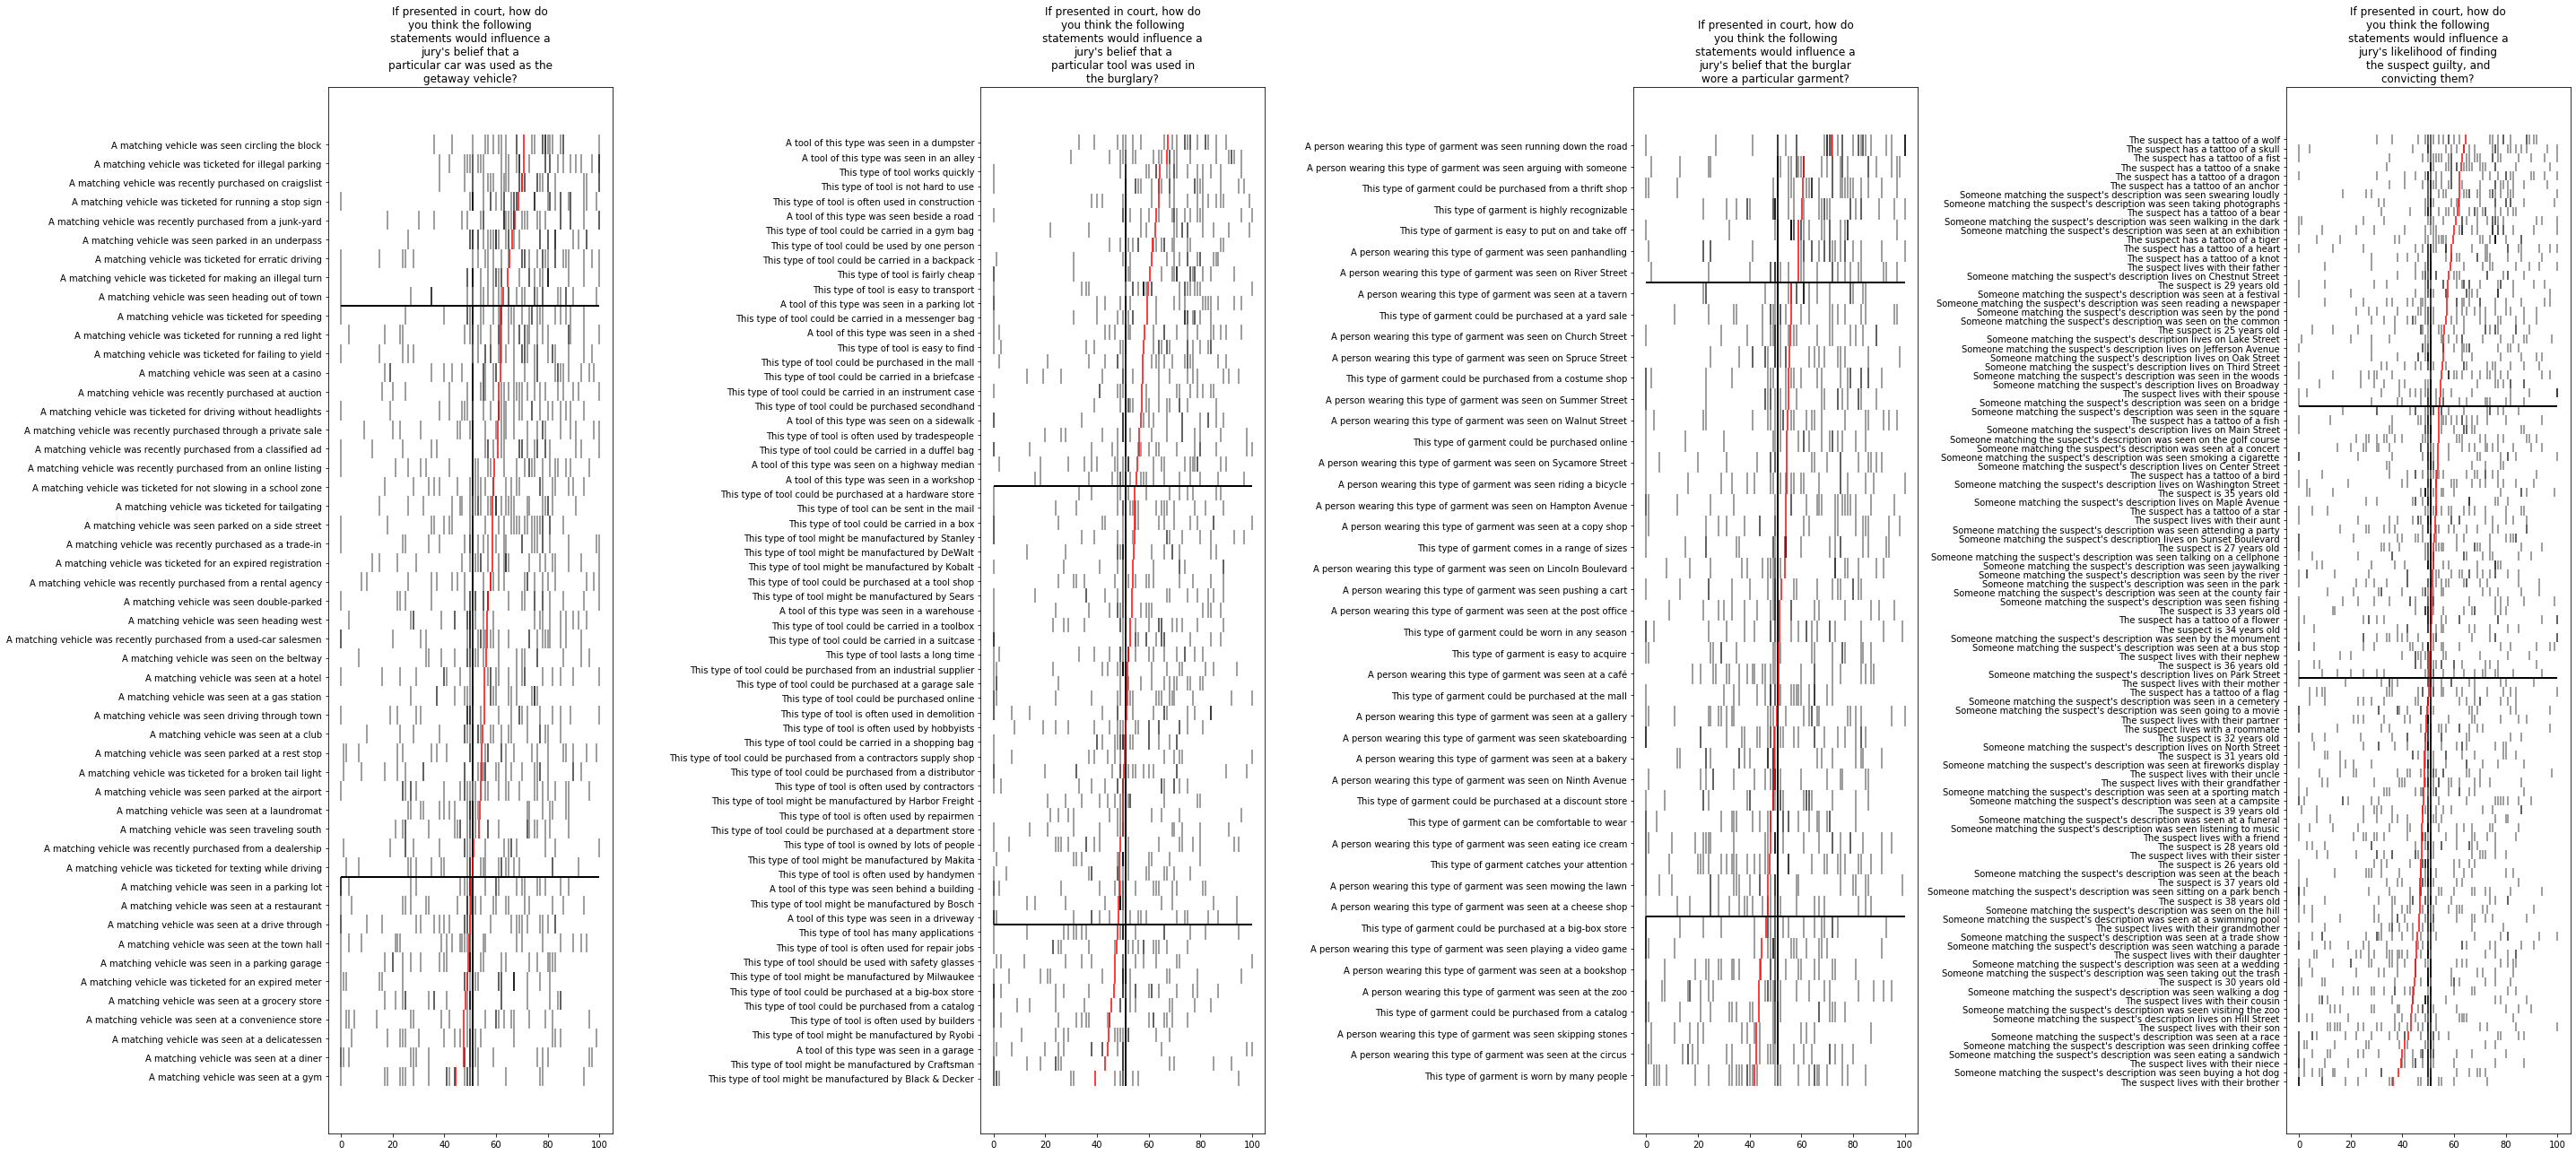

In [8]:
from textwrap import wrap

plt.figure(figsize=(40,18))
col = 1
keepers1 = {}
for Q, AS in scores.groupby(level=['Q']):  
    plt.subplot(1, 4, col)
    row = 0
    for A, res1 in AS.sort_values('mean').iterrows():
        plt.vlines(res1['scores'], row, row+1, alpha=.5)
        plt.vlines(res1['mean'], row, row+1, alpha=1, color='r')
        row +=1
        
        
    n_keep = 30
    diffs = (AS.sort_values('mean')['mean'] - AS.sort_values('mean')['mean'].shift(n_keep)).reset_index(drop=True)
    first = diffs.idxmin()
    last = first-n_keep+1
    plt.hlines([first+1, last], 0, 100, linewidth=2)
    
    plt.title("\n".join(wrap(Q, 30)))
    labels = AS.sort_values('mean').index.get_level_values('A')
    #colors = ['r' if l in keepers3[Q] else 'k' for l in labels]
    colors = ['k' for l in labels]
    plt.yticks(np.arange(0.5, row+0.5), labels)
    for tick, color in zip(plt.gca().get_yticklabels(), colors):
        tick.set_color(color)
    
    
    #print(labels[first], labels[last])
    keepers1[Q] = labels.values[last:first+1]
    plt.yticks(np.arange(0.5, row+0.5), labels)    
    
#     other_set = AS['mean'].loc[Q,keepers3[Q]]
#     plt.xlabel("this sort: %.03f \n other sort: %.03f \n worst: %.03f" %(diffs[first], 
#                                                                          other_set.max()-other_set.min(),
#                                                                          AS['mean'].max()-AS['mean'].min()))
    
    col += 1
    
plt.tight_layout()

In [6]:
normed = pd.concat([AS.apply(lambda x: (x-np.mean(x))/np.std(x)) for Q, AS in data.groupby(level=['Q'])])
nscores = pd.DataFrame(index=normed.index)
nscores["scores"] = normed.apply(lambda r: [v for v in r if not np.isnan(v)], axis=1)
nscores['mean'] = nscores['scores'].apply(lambda x: np.mean(x))
nscores['median'] = nscores['scores'].apply(lambda x: np.median(x))
nscores['std'] = nscores['scores'].apply(lambda x: np.std(x))
nscores['count'] = nscores['scores'].apply(lambda x: len(x))
nscores.head()

scores  \
Q                                                  A                                                                                                      
If presented in court, how do you think the fol... A matching vehicle was seen traveling south        [0.5919688523512532, 0.2346405331038971, -1.27...   
                                                   A matching vehicle was seen parked at the airport  [-0.9103664774626051, -0.5416339602893968, 0.8...   
                                                   A matching vehicle was seen heading west           [-0.4138029443011843, -1.1021143796181103, -0....   
                                                   A matching vehicle was seen parked at a rest stop  [-0.9345367838571843, -0.7709617516270894, 0.8...   
                                                   A matching vehicle was seen on the beltway         [0.8714893406611902, 1.3241694217637885, 0.469...   

                                                                                                          mean  \
Q                                                  A                                                             
If presented in court, how do you think the fol... A matching vehicle was seen traveling south       -0.163239   
                                                   A matching vehicle was seen parked at the airport -0.306375   
                                                   A matching vehicle was seen heading west          -0.286034   
                                                   A matching vehicle was seen parked at a rest stop -0.083327   
                                                   A matching vehicle was seen on the beltway        -0.158967   

                                                                                                        median  \
Q                                                  A                                                             
If presented in court, how do you think the fol... A matching vehicle was seen traveling south       -0.267261   
                                                   A matching vehicle was seen parked at the airport -0.508297   
                                                   A matching vehicle was seen heading west          -0.512655   
                                                   A matching vehicle was seen parked at a rest stop -0.320585   
                                                   A matching vehicle was seen on the beltway        -0.381199   

                                                                                                           std  \
Q                                                  A                                                             
If presented in court, how do you think the fol... A matching vehicle was seen traveling south        1.147858   
                                                   A matching vehicle was seen parked at the airport  1.175565   
                                                   A matching vehicle was seen heading west           0.749138   
                                                   A matching vehicle was seen parked at a rest stop  0.839813   
                                                   A matching vehicle was seen on the beltway         0.860641   

                                                                                                      count  
Q                                                  A                                                         
If presented in court, how do you think the fol... A matching vehicle was seen traveling south           31  
                                                   A matching vehicle was seen parked at the airport     30  
                                                   A matching vehicle was seen heading west              29  
                                                   A matching vehicle was seen parked at a rest stop     30  
  

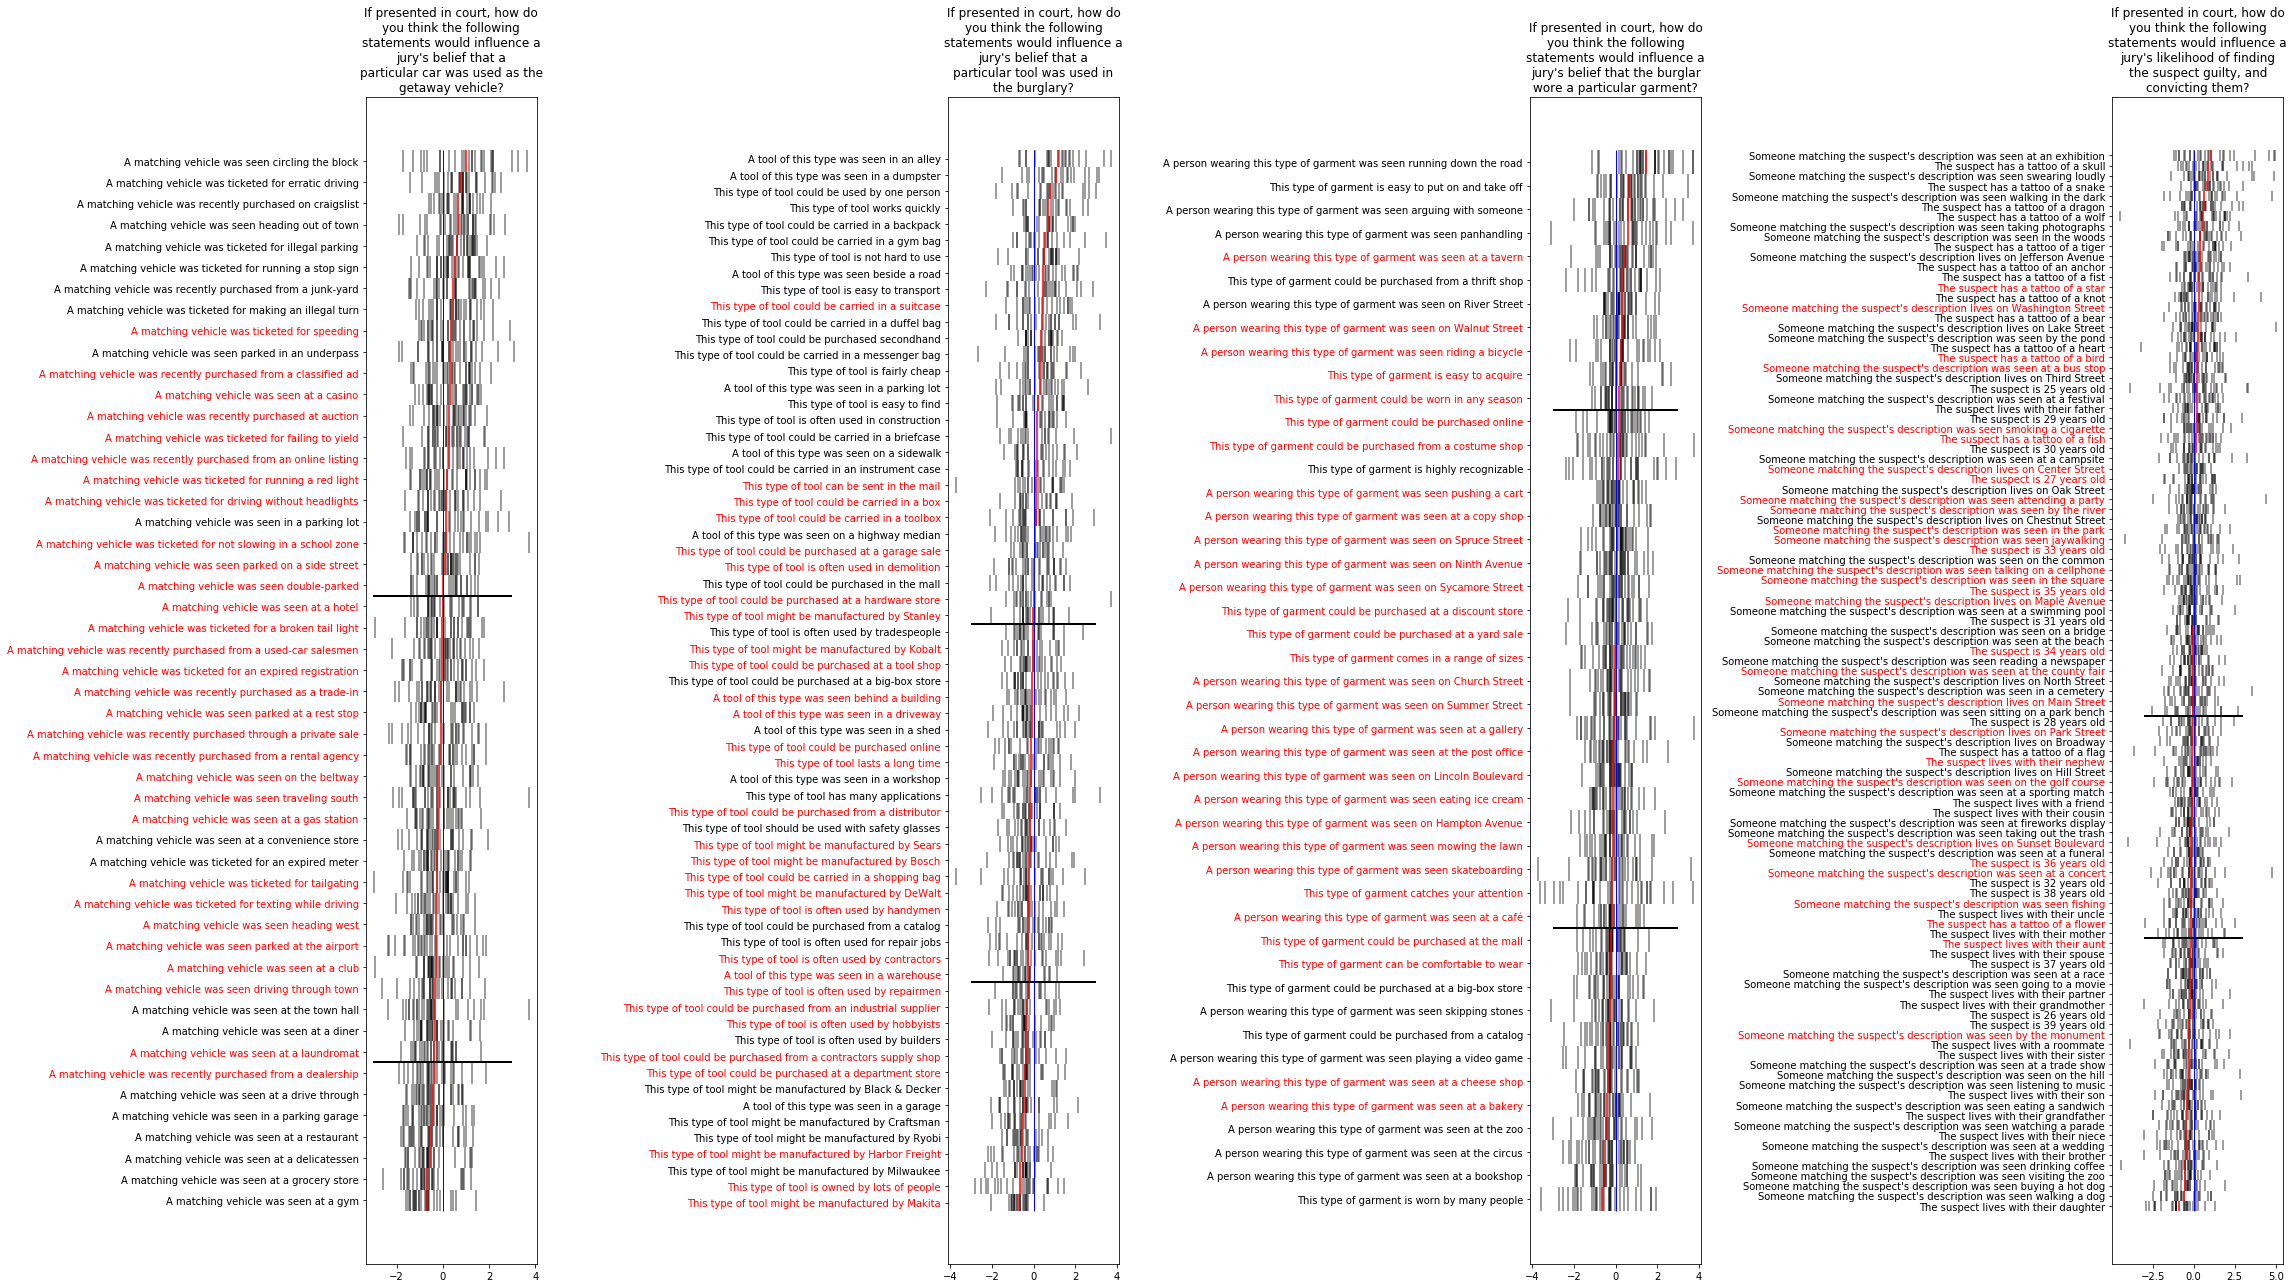

In [7]:
from textwrap import wrap

plt.figure(figsize=(40,18))
col = 1
keepers3 = {}
for Q, AS in nscores.groupby(level=['Q']):  
    plt.subplot(1, 5, col)
    row = 0
    for A, res1 in AS.sort_values('mean').iterrows():
        plt.vlines(res1['scores'], row, row+1, alpha=.5)
        plt.vlines(res1['mean'], row, row+1, alpha=1, color='r')
        row +=1
    n_keep = 33 if Q == "How likely do you think it is that the suspect had the following last names?" else 22
    diffs = (AS.sort_values('mean')['mean'] - AS.sort_values('mean')['mean'].shift(n_keep)).reset_index(drop=True)
    first = diffs.idxmin()
    last = first-n_keep+1
    #print(first, last)
    plt.hlines([first+1, last], -3, 3, linewidth=2)
    plt.title("\n".join(wrap(Q, 30)))
    plt.vlines(0, 0, row, 'b', linewidth=1 )
    
    
    
    labels = AS.sort_values('mean').index.get_level_values('A')
    colors = ['r' if l in keepers1[Q] else 'k' for l in labels]
    #colors = ['k' for l in labels]
    plt.yticks(np.arange(0.5, row+0.5), labels)
    for tick, color in zip(plt.gca().get_yticklabels(), colors):
        tick.set_color(color)
        
    keepers3[Q] = labels.values[last:first+1]
    
    plt.yticks(np.arange(0.5, row+0.5), labels)   
    
    #other_set = AS['mean'].loc[Q,keepers1[Q]]
    
#     plt.xlabel("this sort: %.03f \n other sort: %.03f \n worst: %.03f" %(diffs[first], 
#                                                                          other_set.max()-other_set.min(),
#                                                                          AS['mean'].max()-AS['mean'].min()))
    col += 1
    
plt.tight_layout()

In [17]:
data.T.iloc[26:].T

28  \
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  37.0   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  84.0   
                                                   Someone matching the suspect's description was ...   NaN   
...                                                                                                     ...   
If presented in court, how do you think the fol... A matching vehicle had been seen heading out of...   0.0   
                                                   A matching vehicle had been seen driving throug...  69.0   
                                                   A matching vehicle had been seen driving after ...   NaN   
                                                   A matching vehicle had been seen multiple days ...   NaN   
                                                   A matching vehicle had been seen circling the b...   NaN   

                                                                                                         29  \
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  51.0   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  83.0   
                                                   Someone matching the suspect's description was ...   NaN   
...                                                                                                     ...   
If presented in court, how do you think the fol... A matching vehicle had been seen heading out of...   NaN   
                                                   A matching vehicle had been seen driving throug...   NaN   
                                                   A matching vehicle had been seen driving after ...   NaN   
                                                   A matching vehicle had been seen multiple days ...  79.0   
                                                   A matching vehicle had been seen circling the b...  90.0   

                                                                                                         30  \
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  69.0   
                                                   Someone matching the suspect's description was ...  69.0   
                                                   Someone matching the suspect's description was ...   NaN   
                                                   Someone matching the suspect's description was ...  77.0   
...                                                                                                     ...   
If presented in court, how do you think the fol... A matching vehicle had been seen heading out of...   NaN   
                                                   A matching vehicle had been seen driving throug...   NaN   
                                                   A matching vehicle had been seen driving after ...  82.0

# Pretest 4
Needed some more 'spur' clues, to make them match the treatment condition more closely.

In [18]:
# screwed up some of these by leaving the 'snap to grid' option ticked. 
# This represents the first 26 samples, discard these.

data = pd.read_csv('../results-anonymized/pretest/Mystery object ranking 4 - additional spurs_February 14, 2020_12.57.csv').T
data['Q'] = data[0].apply(lambda x: x.split(' - ')[0] if ' - ' in x else x)
data['A'] = data[0].apply(lambda x: x.split(' - ')[1] if ' - ' in x else "")

#data = data[~data['A'].str.contains('woman')]

data.set_index(["Q","A"], drop=True, inplace=True)
data = data.iloc[11:-6]
data.drop([0, 1], axis=1, inplace=True)
data = data.astype(float)
data = data.T.iloc[26:].T

scores = pd.DataFrame(index=data.index)
scores["scores"] = data.apply(lambda r: [int(v) for v in r if not np.isnan(v)], axis=1)
scores['mean'] = scores['scores'].apply(lambda x: np.mean(x))
scores['median'] = scores['scores'].apply(lambda x: np.median(x))
scores['std'] = scores['scores'].apply(lambda x: np.std(x))
scores['count'] = scores['scores'].apply(lambda x: len(x))
scores.head()

scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [51, 65, 72, 50, 51, 60, 67, 50, 63, 0, 58, 82...   
                                                   Someone matching the suspect's description was ...  [37, 69, 62, 76, 51, 68, 52, 51, 68, 25, 84, 8...   
                                                   Someone matching the suspect's description was ...  [69, 72, 74, 62, 51, 50, 78, 15, 40, 41, 58, 9...   
                                                   Someone matching the suspect's description was ...  [84, 83, 50, 57, 50, 66, 51, 84, 81, 5, 69, 63...   
                                                   Someone matching the suspect's description was ...  [77, 40, 50, 51, 58, 59, 43, 12, 59, 92, 56, 8...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  59.640000   
                                                   Someone matching the suspect's description was ...  63.333333   
                                                   Someone matching the suspect's description was ...  66.880000   
                                                   Someone matching the suspect's description was ...  62.160000   
                                                   Someone matching the suspect's description was ...  59.958333   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... Someone matching the suspect's description was ...    61.0   
                                                   Someone matching the suspect's description was ...    68.0   
                                                   Someone matching the suspect's description was ...    72.0   
                                                   Someone matching the suspect's description was ...    66.0   
                                                   Someone matching the suspect's description was ...    58.5   

                                                                                                             std  \
Q                                                  A                                                               
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  19.656816   
                                                   Someone matching the suspect's description was ...  20.151280   
                                                   Someone matching the suspect's description was ...  19.281743   
                                                   Someone matching the suspect's description was ...  20.876168   
                                                   Someone matching the suspect's description was ...  19.854637   

                                                                                                       count  
Q                                                  A                                                          
If presented in court, how do you think the fol... Someone matching the suspect's description was ...     25  
                                                   Someone matching the suspect's description was ...     27  
                                                   Someone matching the suspect's description was ...     25  
                                                   Someone matching the suspect'

In [20]:
# treated
d = scores.iloc[scores.index.get_level_values(1).str.contains('treated')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-9)
print(len(d), d['c'].idxmax(), d['c'].max())
d

16 ("If presented in court, how do you think the following statements would influence a jury's likelihood of finding the suspect guilty, and convicting them?", "Someone matching the suspect's description was treated for a broken tooth") -3.853333333333339


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  [0, 51, 50, 51, 50, 29, 4, 66, 30, 60, 26, 60,...   
                                                   Someone matching the suspect's description was ...  [76, 50, 58, 51, 59, 51, 72, 66, 4, 86, 73, 78...   
                                                   Someone matching the suspect's description was ...  [59, 68, 32, 51, 51, 26, 50, 63, 7, 55, 69, 81...   
                                                   Someone matching the suspect's description was ...  [40, 67, 51, 50, 51, 65, 61, 48, 80, 0, 32, 87...   
                                                   Someone matching the suspect's description was ...  [81, 57, 28, 74, 38, 50, 65, 66, 0, 26, 54, 67...   
                                                   Someone matching the suspect's description was ...  [51, 65, 72, 50, 51, 60, 67, 50, 63, 0, 58, 82...   
                                                   Someone matching the suspect's description was ...  [77, 40, 50, 51, 58, 59, 43, 12, 59, 92, 56, 8...   
                                                   Someone matching the suspect's description was ...  [70, 39, 74, 60, 55, 35, 9, 56, 25, 56, 84, 87...   
                                                   Someone matching the suspect's description was ...  [55, 76, 27, 51, 63, 79, 51, 65, 0, 50, 67, 87...   
                                                   Someone matching the suspect's description was ...  [65, 80, 50, 57, 48, 60, 50, 87, 7, 56, 54, 63...   
                                                   Someone matching the suspect's description was ...  [84, 83, 50, 57, 50, 66, 51, 84, 81, 5, 69, 63...   
                                                   Someone matching the suspect's description was ...  [0, 63, 65, 68, 66, 50, 50, 66, 0, 59, 67, 92,...   
                                                   Someone matching the suspect's description was ...  [61, 70, 74, 50, 51, 66, 59, 32, 50, 25, 55, 6...   
                                                   Someone matching the suspect's description was ...  [37, 69, 62, 76, 51, 68, 52, 51, 68, 25, 84, 8...   
                                                   Someone matching the suspect's description was ...  [69, 72, 74, 62, 51, 50, 78, 15, 40, 41, 58, 9...   
                                                   Someone matching the suspect's description was ...  [82, 81, 74, 71, 51, 51, 56, 64, 39, 67, 55, 7...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... Someone matching the suspect's description was ...  48.538462   
                                                   Someone matching the suspect's description was ...  57.000000   
                                                   Someone matching the suspect's description was ...  57.750000   
                                                   Someone matching the suspect's description was ...  58.153846   
                                                   Someone matching the suspect's description was ...  59.480000   
                                                   Someone matching the suspect's description was ...  59.640000   
                                                   Someone matching the suspect's description was ...  59.958333   
                                                   Someone matching the suspect's description was ...  60.333333   
                                                   Someone matching the suspect's description was ...  61.458333   
                                                   Someone ma

In [21]:
#owns
d = scores.iloc[scores.index.get_level_values(1).str.contains('owns')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-9)
print(len(d), d['c'].idxmax(), d['c'].max())
d

19 ("If presented in court, how do you think the following statements would influence a jury's likelihood of finding the suspect guilty, and convicting them?", 'The suspect owns an apartment') -1.741538461538461


scores  \
Q                                                  A                                                                                              
If presented in court, how do you think the fol... The suspect owns a boat                    [51, 38, 6, 51, 0, 29, 37, 38, 5, 65, 46, 68, ...   
                                                   The suspect owns a mobile home             [0, 51, 29, 64, 51, 55, 0, 51, 16, 50, 80, 64,...   
                                                   The suspect owns an apartment              [50, 22, 8, 50, 51, 50, 0, 27, 60, 76, 50, 49,...   
                                                   The suspect owns a bicycle                 [50, 34, 5, 50, 25, 44, 50, 63, 19, 2, 17, 87,...   
                                                   The suspect owns a small business          [76, 51, 20, 50, 22, 49, 0, 29, 50, 74, 49, 50...   
                                                   The suspect owns a sports card collection  [80, 28, 10, 50, 20, 0, 51, 80, 34, 84, 68, 69...   
                                                   The suspect owns a rental property         [2, 8, 12, 52, 41, 0, 55, 70, 10, 42, 34, 86, ...   
                                                   The suspect owns a timeshare               [0, 51, 50, 50, 33, 51, 0, 35, 43, 50, 62, 3, ...   
                                                   The suspect owns a two-seat  aircraft      [51, 22, 13, 51, 68, 50, 66, 65, 5, 1, 49, 5, ...   
                                                   The suspect owns a trailer                 [0, 51, 26, 50, 51, 48, 0, 38, 62, 37, 86, 77,...   
                                                   The suspect owns a smartphone              [51, 7, 51, 50, 39, 50, 50, 37, 5, 40, 71, 78,...   
                                                   The suspect owns a house                   [0, 51, 22, 8, 50, 14, 0, 77, 50, 22, 22, 49, ...   
                                                   The suspect owns a landscaping business    [0, 12, 51, 20, 51, 50, 0, 50, 35, 58, 65, 69,...   
                                                   The suspect owns a franchise               [17, 49, 36, 7, 26, 29, 80, 24, 74, 0, 32, 71,...   
                                                   The suspect owns a life insurance policy   [50, 70, 30, 51, 0, 50, 82, 13, 3, 85, 49, 21,...   
                                                   The suspect owns three dogs                [51, 8, 50, 50, 49, 41, 42, 35, 40, 64, 49, 51...   
                                                   The suspect owns a shop                    [100, 68, 28, 29, 0, 29, 51, 84, 9, 60, 66, 75...   
                                                   The suspect owns a storage unit            [76, 51, 81, 51, 89, 51, 65, 32, 79, 81, 47, 7...   
                                                   The suspect owns a gun                     [83, 55, 52, 79, 49, 74, 75, 0, 35, 50, 95, 85...   

                                                                                                   mean  \
Q                                                  A                                                      
If presented in court, how do you think the fol... The suspect owns a boat                    42.416667   
                                                   The suspect owns a mobile home             43.360000   
                                                   The suspect owns an apartment              43.720000   
                                                   The suspect owns a bicycle                 43.880000   
                                                   The suspect owns a small business          43.923077   
                                                   The suspect owns a sports card collection  44.080000   
                                                   The suspect owns a rental property         44.153846   
                                                   The suspect owns a timeshare       

In [23]:
# damage
d = scores.iloc[scores.index.get_level_values(1).str.contains('found with')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-6)
print(len(d), d['c'].idxmax(), d['c'].max())
d

17 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular car was used as the getaway vehicle?", 'A matching vehicle was found with a dented side') -3.386842105263156


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... A matching vehicle was found with a missing wheel   [0, 52, 37, 51, 49, 61, 68, 81, 58, 69, 24, 51...   
                                                   A matching vehicle was found with leaking oil       [0, 51, 31, 18, 50, 35, 51, 32, 77, 55, 66, 57...   
                                                   A matching vehicle was found with a broken grill    [53, 52, 50, 49, 63, 41, 59, 57, 61, 68, 60, 3...   
                                                   A matching vehicle was found with a cracked win...  [52, 27, 29, 51, 57, 50, 30, 36, 84, 62, 75, 6...   
                                                   A matching vehicle was found with a cracked tai...  [80, 11, 51, 51, 43, 50, 65, 26, 63, 40, 68, 5...   
                                                   A matching vehicle was found with a dented hood     [62, 32, 31, 54, 56, 37, 63, 39, 56, 88, 60, 5...   
                                                   A matching vehicle was found with a dented side     [50, 74, 26, 79, 60, 34, 33, 61, 68, 49, 66, 5...   
                                                   A matching vehicle was found with a flat tire       [70, 51, 36, 11, 53, 55, 68, 71, 50, 7, 88, 65...   
                                                   A matching vehicle was found with a dented door     [83, 30, 51, 51, 46, 38, 85, 33, 66, 64, 83, 7...   
                                                   A matching vehicle was found with the airbags d...  [26, 51, 86, 61, 50, 65, 62, 65, 84, 80, 51, 7...   
                                                   A matching vehicle was found with a broken axel     [35, 50, 51, 82, 83, 65, 10, 58, 69, 66, 73, 5...   
                                                   A matching vehicle was found with severe scratches  [65, 35, 72, 66, 50, 82, 13, 65, 79, 86, 51, 3...   
                                                   A matching vehicle was found with a damaged bumper  [63, 43, 68, 51, 74, 23, 44, 67, 59, 89, 84, 5...   
                                                   A matching vehicle was found with a broken head...  [58, 56, 51, 51, 48, 63, 84, 51, 26, 68, 64, 6...   
                                                   A matching vehicle was found with a missing win...  [56, 80, 35, 51, 44, 64, 83, 68, 59, 67, 73, 7...   
                                                   A matching vehicle was found with damaged suspe...  [65, 76, 51, 96, 67, 67, 50, 64, 24, 71, 51, 5...   
                                                   A matching vehicle was found with a broken window   [52, 76, 51, 50, 54, 62, 62, 59, 81, 65, 82, 7...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... A matching vehicle was found with a missing wheel   51.850000   
                                                   A matching vehicle was found with leaking oil       52.380952   
                                                   A matching vehicle was found with a broken grill    53.263158   
                                                   A matching vehicle was found with a cracked win...  54.142857   
                                                   A matching vehicle was found with a cracked tai...  55.500000   
                                                   A matching vehicle was found with a dented hood     55.550000   
                                                   A matching vehicle was found with a dented side     56.350000   
                                                   A matching vehicle was found with a flat tire       57.571429   
                     

In [25]:
#seen
d = scores.iloc[~scores.index.get_level_values(1).str.contains('found with') &
               scores.index.get_level_values(1).str.contains('found')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-6)
print(len(d), d['c'].idxmax(), d['c'].max())
d

15 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular car was used as the getaway vehicle?", 'A matching vehicle was found in a parking garage') -2.7397660818713447


scores  \
Q                                                  A                                                                                                     
If presented in court, how do you think the fol... A matching vehicle was found in a parking garage  [43, 50, 52, 61, 77, 60, 62, 66, 66, 78, 59, 7...   
                                                   A matching vehicle was found under a bridge       [53, 51, 60, 68, 31, 23, 54, 31, 63, 69, 70, 9...   
                                                   A matching vehicle was found in a parking lot     [82, 51, 51, 56, 32, 65, 38, 54, 70, 61, 43, 5...   
                                                   A matching vehicle was found at the airport       [70, 51, 88, 83, 51, 72, 37, 37, 72, 62, 62, 7...   
                                                   A matching vehicle was found at an impound lot    [51, 51, 51, 51, 59, 58, 45, 65, 31, 55, 97, 5...   
                                                   A matching vehicle was found in a field           [66, 65, 54, 50, 61, 34, 56, 42, 63, 66, 25, 6...   
                                                   A matching vehicle was found at a junkyard        [42, 50, 48, 60, 56, 76, 29, 88, 74, 63, 51, 6...   
                                                   A matching vehicle was found in an empty lot      [83, 74, 64, 50, 59, 58, 63, 62, 71, 65, 77, 6...   
                                                   A matching vehicle was found on a side street     [63, 53, 49, 58, 62, 61, 28, 40, 72, 62, 65, 5...   
                                                   A matching vehicle was found in a barn            [77, 33, 68, 50, 63, 78, 55, 31, 79, 66, 51, 7...   
                                                   A matching vehicle was found under a tarp         [67, 90, 51, 51, 60, 30, 57, 66, 84, 78, 93, 5...   
                                                   A matching vehicle was found in a ditch           [89, 62, 64, 56, 65, 58, 42, 72, 68, 62, 72, 5...   
                                                   A matching vehicle was found in an underpass      [70, 51, 52, 54, 65, 56, 58, 91, 83, 57, 83, 5...   
                                                   A matching vehicle was found at a rest stop       [67, 51, 50, 71, 51, 77, 64, 71, 70, 84, 42, 6...   
                                                   A matching vehicle was found at a landfill        [69, 89, 63, 61, 72, 51, 69, 27, 71, 75, 74, 3...   

                                                                                                          mean  \
Q                                                  A                                                             
If presented in court, how do you think the fol... A matching vehicle was found in a parking garage  56.315789   
                                                   A matching vehicle was found under a bridge       56.833333   
                                                   A matching vehicle was found in a parking lot     57.421053   
                                                   A matching vehicle was found at the airport       57.857143   
                                                   A matching vehicle was found at an impound lot    58.157895   
                                                   A matching vehicle was found in a field           58.578947   
                                                   A matching vehicle was found at a junkyard        59.055556   
                                                   A matching vehicle was found in an empty lot      60.250000   
                                                   A matching vehicle was found on a side street     60.631579   
                                                   A matching vehicle was found in a barn            61.750000   
                                                   A matching vehicle was found under a tarp         62.250000   
                                           

In [26]:
# seen
d = scores.iloc[scores.index.get_level_values(1).str.contains('seen')].sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-6)
print(len(d), d['c'].idxmax(), d['c'].max())
d

12 ("If presented in court, how do you think the following statements would influence a jury's belief that a particular car was used as the getaway vehicle?", 'A matching vehicle had been seen double-parked') -7.126315789473679


scores  \
Q                                                  A                                                                                                       
If presented in court, how do you think the fol... A matching vehicle had been seen traveling south    [0, 52, 68, 49, 65, 38, 60, 81, 58, 63, 51, 51...   
                                                   A matching vehicle had been seen driving very s...  [85, 67, 53, 51, 57, 34, 42, 65, 64, 76, 85, 4...   
                                                   A matching vehicle had been seen double-parked      [100, 82, 49, 57, 50, 64, 87, 55, 81, 69, 25, ...   
                                                   A matching vehicle had been seen heading west       [49, 55, 71, 51, 50, 67, 53, 20, 86, 89, 51, 5...   
                                                   A matching vehicle had been seen on the beltway     [51, 51, 51, 51, 56, 75, 40, 75, 54, 69, 56, 6...   
                                                   A matching vehicle had been seen driving throug...  [69, 51, 59, 43, 68, 27, 31, 30, 65, 89, 65, 5...   
                                                   A matching vehicle had been seen heading out of...  [0, 89, 72, 53, 51, 62, 57, 43, 60, 68, 65, 91...   
                                                   A matching vehicle had been seen taking the bac...  [85, 29, 51, 50, 78, 37, 70, 83, 66, 78, 72, 6...   
                                                   A matching vehicle had been seen driving up on ...  [59, 88, 26, 52, 61, 82, 60, 73, 66, 89, 51, 5...   
                                                   A matching vehicle had been seen multiple days ...  [79, 79, 69, 68, 62, 87, 41, 64, 40, 32, 77, 7...   
                                                   A matching vehicle had been seen driving after ...  [82, 51, 51, 62, 62, 50, 42, 73, 85, 95, 78, 7...   
                                                   A matching vehicle had been seen circling the b...  [90, 74, 94, 62, 64, 62, 74, 81, 68, 51, 78, 9...   

                                                                                                            mean  \
Q                                                  A                                                               
If presented in court, how do you think the fol... A matching vehicle had been seen traveling south    55.850000   
                                                   A matching vehicle had been seen driving very s...  56.350000   
                                                   A matching vehicle had been seen double-parked      57.473684   
                                                   A matching vehicle had been seen heading west       57.650000   
                                                   A matching vehicle had been seen on the beltway     58.200000   
                                                   A matching vehicle had been seen driving throug...  58.500000   
                                                   A matching vehicle had been seen heading out of...  63.550000   
                                                   A matching vehicle had been seen taking the bac...  63.631579   
                                                   A matching vehicle had been seen driving up on ...  64.600000   
                                                   A matching vehicle had been seen multiple days ...  65.368421   
                                                   A matching vehicle had been seen driving after ...  67.900000   
                                                   A matching vehicle had been seen circling the b...  69.235294   

                                                                                                       median  \
Q                                                  A                                                            
If presented in court, how do you think the fol... A matching vehicle had been seen traveling south      59.0 

# survey 5

In [247]:

data = pd.read_csv('../results-anonymized/pretest/Mystery object ranking 5 - all spurs together_March 7, 2020_14.20.csv').T
data['Q'] = data[0].apply(lambda x: x.split(' - ')[0] if ' - ' in x else x)
data['A'] = data[0].apply(lambda x: x.split(' - ')[1].strip() if ' - ' in x else "")

#data = data[~data['A'].str.contains('woman')]

data.set_index("A", drop=True, inplace=True)
data = data.iloc[13:-5] # drop metadata
data.drop([0, 1, 'Q'], axis=1, inplace=True)
data = data.astype(float)
data


2     3      4      5    \
A                                                                              
The suspect has a prior conviction for shoplifting   NaN   NaN    NaN    NaN   
The suspect has a prior conviction for drug pos...   NaN   NaN    NaN    NaN   
The suspect has a prior conviction for drunk dr...   NaN   NaN    NaN    NaN   
The suspect has a prior conviction for drug dis...   NaN   NaN    NaN    NaN   
The suspect has a prior conviction for vandalism     NaN   NaN   68.0    NaN   
The suspect has a prior conviction for petty theft   NaN   NaN    NaN    NaN   
The suspect has a prior conviction for assault      65.0   NaN    NaN    NaN   
The suspect has a prior conviction for fraud         NaN   NaN   82.0    NaN   
The suspect has a prior conviction for passing ...   NaN   NaN    NaN    NaN   
The suspect has a prior conviction for carrying...   NaN   NaN    NaN    NaN   
The suspect has a prior conviction for pickpock...   NaN   NaN    NaN   72.0   
The suspect has a prior conviction for trespass      NaN   NaN    NaN    NaN   
The suspect has a prior conviction for identity...   NaN   NaN   80.0    NaN   
The suspect has a prior conviction for attempte...   NaN  61.0    NaN    NaN   
The suspect has a prior conviction for arson        63.0   NaN    NaN    NaN   
The suspect has a prior conviction for forgery       NaN   NaN    NaN    NaN   
The suspect is 25 years old                          NaN   NaN    1.0    NaN   
The suspect is 26 years old                          NaN  62.0    NaN    NaN   
The suspect is 27 years old                          NaN   NaN    NaN    NaN   
The suspect is 28 years old                          NaN   NaN    NaN    NaN   
The suspect is 29 years old                          NaN   NaN    NaN    NaN   
The suspect is 30 years old                          NaN   NaN    NaN    NaN   
The suspect is 31 years old                          NaN   NaN    NaN    NaN   
The suspect is 32 years old                          NaN   NaN    NaN   44.0   
The suspect is 33 years old                          NaN   NaN    NaN    NaN   
The suspect is 34 years old                          NaN   NaN    NaN    NaN   
The suspect is 35 years old                         64.0   NaN    NaN   45.0   
The suspect is 36 years old                          NaN   NaN    NaN    NaN   
The suspect is 37 years old                          NaN   NaN    NaN    NaN   
The suspect is 38 years old                         62.0   NaN    NaN    NaN   
The suspect is 39 years old                          NaN   NaN    NaN    NaN   
The suspect lives with their mother                 30.0   NaN    NaN    NaN   
The suspect lives with their father                  NaN   NaN    NaN    NaN   
The suspect lives with their uncle                   NaN   NaN    NaN    NaN   
The suspect lives with their aunt                    NaN   NaN    NaN    NaN   
The suspect lives with their grandmother             NaN   NaN    NaN    NaN   
The suspect lives with their grandfather             NaN   NaN    NaN    NaN   
The suspect lives with their brother                 NaN   NaN    NaN   61.0   
The suspect lives with their sister                  NaN   NaN    NaN    NaN   
The suspect lives with their cousin                  NaN   NaN    NaN    NaN   
The suspect lives with their nephew                  NaN   NaN    NaN    NaN   
The suspect lives with their niece                   NaN   NaN    NaN    NaN   
The suspect lives with their son                     NaN   NaN    0.0    NaN   
The suspect lives with their daughter                NaN  45.0    NaN   77.0   
The suspect lives with their spouse                  NaN   NaN    NaN    NaN   
The suspect lives with their partner                 NaN   NaN    NaN    NaN   
The suspect's mother is in prison                    NaN   NaN    NaN    NaN   
The suspect's father is in prison                    NaN   NaN    NaN    NaN   
The suspect's uncle is in prison                    1

In [248]:
scores = pd.DataFrame(index=data.index)
scores["scores"] = data.apply(lambda r: [int(v) for v in r if not np.isnan(v)], axis=1)
scores['mean'] = scores['scores'].apply(lambda x: np.mean(x))
scores['median'] = scores['scores'].apply(lambda x: np.median(x))
scores['std'] = scores['scores'].apply(lambda x: np.std(x))
scores['count'] = scores['scores'].apply(lambda x: len(x))
scores.shape

(463, 5)

In [249]:
spurs = pd.read_excel('Clues.xlsx', sheet_name='Pretest spurs')
spurs.dropna(inplace=True)
spurs.index = spurs['Clue'].apply(lambda s: s.strip())
spurs.drop("Clue", axis=1,inplace=True)
spurs.shape

(463, 5)

In [250]:
df = spurs.merge(scores, how='inner', left_index=True, right_index=True)
df.head()

Node  \
A "Wanted" poster features someone matching the...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   

                                                              SpurNode  \
A "Wanted" poster features someone matching the...  {appearanceWanted}   
A constable noticed someone matching the suspec...  {appearanceStreet}   
A constable noticed someone matching the suspec...  {appearanceStreet}   
A constable noticed someone matching the suspec...  {appearanceStreet}   
A constable noticed someone matching the suspec...  {appearanceStreet}   

                                                                                      NodeText  \
A "Wanted" poster features someone matching the...  someone matching the suspect's description   
A constable noticed someone matching the suspec...  someone matching the suspect's description   
A constable noticed someone matching the suspec...  someone matching the suspect's description   
A constable noticed someone matching the suspec...  someone matching the suspect's description   
A constable noticed someone matching the suspec...  someone matching the suspect's description   

                                                                                             Template  \
A "Wanted" poster features someone matching the...                    {appearanceWanted} {Appearance}   
A constable noticed someone matching the suspec...  A constable noticed {Appearance} on {appearanc...   
A constable noticed someone matching the suspec...  A constable noticed {Appearance} on {appearanc...   
A constable noticed someone matching the suspec...  A constable noticed {Appearance} on {appearanc...   
A constable noticed someone matching the suspec...  A constable noticed {Appearance} on {appearanc...   

                                                                  SpurNodeText  \
A "Wanted" poster features someone matching the...  A "Wanted" poster features   
A constable noticed someone matching the suspec...                    Broadway   
A constable noticed someone matching the suspec...               Center Street   
A constable noticed someone matching the suspec...             Chestnut Street   
A constable noticed someone matching the suspec...               Church Street   

                                                                                               scores  \
A "Wanted" poster features someone matching the...  [93, 76, 65, 34, 64, 100, 100, 100, 66, 63, 86...   
A constable noticed someone matching the suspec...  [64, 79, 90, 80, 73, 44, 65, 6, 80, 51, 31, 72...   
A constable noticed someone matching the suspec...  [39, 100, 50, 84, 82, 71, 84, 79, 76, 69, 91, ...   
A constable noticed someone matching the suspec...  [76, 38, 96, 100, 54, 60, 81, 77, 95, 76, 48, ...   
A constable noticed someone matching the suspec...  [73, 76, 94, 73, 92, 82, 84, 45, 72, 79, 78, 8...   

                                                         mean  median  \
A "Wanted" poster features someone matching the...  72.870968    73.0   
A constable noticed someone matching the suspec...  63.941176    63.0   
A constable noticed someone matching the suspec...  71.515152    76.0   
A constable noticed someone matching the suspec...  71.000000    74.0   
A constable noticed someone matching the suspec...  69.941176    74.5   

                                                          std  count  
A "Wanted" poster features someone matching the...  21.513300     31  
A constable noticed someone matching the suspec...  17.940984     34  
A constable noticed someone matching the suspec...  19.745535     33  
A constable noticed someone matching the suspec...  15.231546     31  
A constable noticed someone matching the suspec...  21.015318     34

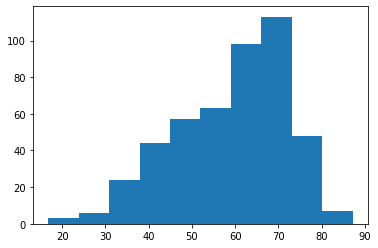

In [251]:
plt.hist(df['mean']);

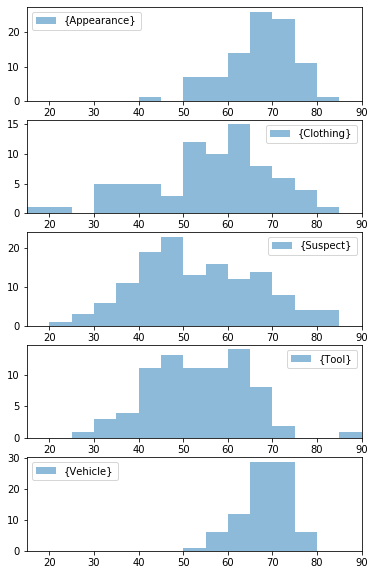

In [252]:
plt.figure(figsize=(6,10))
for i, (name,group) in enumerate(df.groupby('Node')):
    plt.subplot(5,1,i+1)
    plt.hist(group['mean'], label=name, alpha=.5, bins=range(0,100,5))
    plt.xlim(15,90)
    plt.legend()

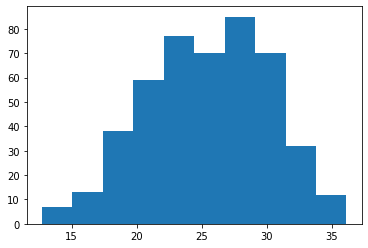

In [253]:
plt.hist(df['std']);

In [254]:
d = df.sort_values('mean')
d['c'] = d['mean']-d['mean'].shift(-6)
print(len(d), d['c'].idxmax(), d['c'].max())
d

463 A matching vehicle was found at a junkyard -0.12581699346405628


Node  \
This type of garment can be comfortable to wear       {Clothing}   
The suspect owns a sports card collection              {Suspect}   
This type of garment comes in a range of sizes        {Clothing}   
The suspect owns three dogs                            {Suspect}   
The suspect owns a life insurance policy               {Suspect}   
The suspect's grandmother is in prison                 {Suspect}   
This type of tool lasts a long time                       {Tool}   
This type of garment could be purchased from a ...    {Clothing}   
The suspect's aunt is in prison                        {Suspect}   
This type of tool should be used with safety gl...        {Tool}   
The suspect lives with their mother                    {Suspect}   
This type of tool is owned by lots of people              {Tool}   
This type of garment is not prohibitively expen...    {Clothing}   
This type of tool has many applications                   {Tool}   
This type of garment is easy to acquire               {Clothing}   
The suspect owns a smartphone                          {Suspect}   
The suspect's niece is in prison                       {Suspect}   
The suspect's sister is in prison                      {Suspect}   
This type of garment could be purchased from a ...    {Clothing}   
This type of garment is worn by many people           {Clothing}   
The suspect owns a timeshare                           {Suspect}   
The suspect's uncle is in prison                       {Suspect}   
This type of garment could be purchased at the ...    {Clothing}   
This type of tool could be purchased from a cat...        {Tool}   
This type of garment could be worn in any season      {Clothing}   
This type of garment could be purchased at a di...    {Clothing}   
The suspect owns a franchise                           {Suspect}   
This type of garment blends in with a crowd           {Clothing}   
The suspect owns a bicycle                             {Suspect}   
This type of tool can be sent in the mail                 {Tool}   
The suspect's grandfather is in prison                 {Suspect}   
This type of garment could be purchased at a bi...    {Clothing}   
The suspect lives with their partner                   {Suspect}   
The suspect lives with their brother                   {Suspect}   
The suspect owns a house                               {Suspect}   
The suspect lives with their grandmother               {Suspect}   
The suspect's nephew is in prison                      {Suspect}   
This type of tool could be purchased in the mall          {Tool}   
The suspect lives with their cousin                    {Suspect}   
This type of tool could be carried in a toolbox           {Tool}   
The suspect's best friend is in prison                 {Suspect}   
This type of garment could be purchased online        {Clothing}   
The suspect idolizes master criminals from movi...     {Suspect}   
The suspect lives with their grandfather               {Suspect}   
The suspect lives with their nephew                    {Suspect}   
The suspect is a thrill-seeking risk taker             {Suspect}   
The suspect lives with their son                       {Suspect}   
This type of garment could be purchased at a ya...    {Clothing}   
The suspect lives with their spouse                    {Suspect}   
Someone matching the suspect's description was ...  {Appearance}   
This type of tool is fairly cheap                         {Tool}   
A garment of this type was found with food stai...    {Clothing}   
The suspect's brother is in prison                     {Suspect}   
This type of garment is hard to see in the dark       {Clothing}   
This type of tool could be purchased at a big-b...        {Tool}   
This type of tool is not hard to use                      {Tool}   
The suspect is an anarchist                            {Suspect}   
The suspect's father is in prison                      {Suspect}   
The suspect owns a two-seat  aircraft           

In [255]:
df.sort_values('mean', ascending=False, inplace=True)
df

Node  \
A tool of this type was found with readily iden...        {Tool}   
The suspect has a tattoo of an eagle                   {Suspect}   
The suspect has a tattoo of a wolf                     {Suspect}   
The suspect has a tattoo of a bear                     {Suspect}   
The suspect has a tattoo of a tiger                    {Suspect}   
An arrest bulletin shows someone matching the s...  {Appearance}   
Someone wearing this type of garment was seen t...    {Clothing}   
The suspect has a tattoo of a fist                     {Suspect}   
Someone matching the suspect's description was ...  {Appearance}   
The suspect has a tattoo of a compass                  {Suspect}   
A garment of this type was found with blood stains    {Clothing}   
Someone matching the suspect's description was ...  {Appearance}   
The suspect has a tattoo of barbed wire                {Suspect}   
A matching vehicle was reported circling the block     {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
A matching vehicle was found in a parking lot          {Vehicle}   
A matching vehicle was found at an impound lot         {Vehicle}   
The suspect has a prior conviction for petty theft     {Suspect}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
Someone wearing this type of garment was seen o...    {Clothing}   
A garment of this type was found covered with g...    {Clothing}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone wearing this type of garment was seen o...    {Clothing}   
Someone matching the suspect's description was ...  {Appearance}   
An officer identified a matching vehicle at a g...     {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
A recent police lineup included someone matchin...  {Appearance}   
A matching vehicle was found at the airport            {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
A matching vehicle was found at a landfill             {Vehicle}   
Someone wearing this type of garment was seen o...    {Clothing}   
An officer identified a matching vehicle at a club     {Vehicle}   
The suspect has a tattoo of a flower                   {Suspect}   
A matching vehicle was reported heading west           {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
A matching vehicle was found under a bridge            {Vehicle}   
Someone wearing this type of garment was seen o...    {Clothing}   
Someone matching the suspect's description was ...  {Appearance}   
Police issued an APB for someone matching the s...  {Appearance}   
The suspect has a tattoo of a flag                     {Suspect}   
A matching vehicle was found in a ditch                {Vehicle}   
The suspect has family connections to organized...     {Suspect}   
A matching vehicle was found on a side street          {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A matching vehicle was found with a broken grill       {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
A matching vehicle was ticketed for running a s...     {Vehicle}   
A matching vehicle was found at a rest stop            {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
A matching vehicle was reported driving up on t...     {Vehicle}   
Someone matching the suspect's description was ...  {Appearance}   
A matching vehicle was reported traveling south        {Vehicle}   
A matching vehicle was recently purchased from ...     {Vehicle}   
Someone wearing this type of garment was seen o...    {Clothing}   
A matching vehicle was ticketed for erratic dri.

In [96]:
reqs = {'{Suspect}':(5,9), '{Appearance}':(5,6), '{Clothing}':(5,6), '{Tool}':(5,6), '{Vehicle}':(5,6)}

In [172]:
for cat, (n_types, n_clues) in reqs.items():
    counts = df[df['Node']==cat].groupby('SpurNode')['NodeText'].count()
    print(counts, sum(counts>=n_clues)>n_types)
    cat_satisfied = sum(counts>=n_clues) > n_types



SpurNode
{age}                15
{liveswith}          15
{means}              19
{motive}             18
{owns}               19
{priorConviction}    16
{relative}           16
{tattoo}             18
Name: NodeText, dtype: int64 True
SpurNode
{appearanceReported}    16
{appearanceStreet}      16
{appearanceWanted}      13
{footage}               16
{injury}                16
{removed}               14
Name: NodeText, dtype: int64 True
SpurNode
{activity}           15
{garmentDamage}      16
{garmentFootage}     15
{garmentPurchase}     8
{garmentRandom}      13
{garmentStreet}       9
Name: NodeText, dtype: int64 True
SpurNode
{toolCarry}       15
{toolDamage}      14
{toolFound}       12
{toolPurchase}    12
{toolUse}         13
{toolrandom}      13
Name: NodeText, dtype: int64 True
SpurNode
{carBehavior}    13
{carBuy}         10
{carDamage}      18
{carFound}       15
{enterprise}     13
{ticketed}       14
Name: NodeText, dtype: int64 True


In [148]:
df['mean'].iloc[:-1]

A tool of this type was found with readily identifiable fingerprints    87.187500
The suspect has a tattoo of an eagle                                    82.093750
The suspect has a tattoo of a wolf                                      81.705882
The suspect has a tattoo of a bear                                      81.147059
The suspect has a tattoo of a tiger                                     81.058824
                                                                          ...    
The suspect's grandmother is in prison                                  29.181818
The suspect owns a life insurance policy                                27.171429
The suspect owns three dogs                                             26.181818
This type of garment comes in a range of sizes                          23.812500
The suspect owns a sports card collection                               23.562500
Name: mean, Length: 464, dtype: float64

In [166]:
for cat, (n_types, n_clues) in reqs.items():
    print (cat, n_types, n_clues)

{Suspect} 5 9
{Appearance} 5 6
{Clothing} 5 6
{Tool} 5 6
{Vehicle} 5 6


In [297]:
pd.options.display.max_rows = 10
def contains_reqs(df, givens, reqs):
    """
    Does the dataframe df + givens contain all the components that are required in reqs?
    """
    df = df.append(givens)
    for cat, (n_types, n_clues) in reqs.items():
        counts = df[df['Node']==cat].groupby('SpurNode')['NodeText'].count() 
        cat_satisfied = sum(counts>=n_clues) >= n_types
        if not cat_satisfied:
            return False

    return True
    

def recur(df, givens, reqs, bias=1):
    
    if len(df) < 2:
        if contains_reqs(pd.DataFrame(columns=df.columns),
                         givens, reqs):
            return givens
        elif contains_reqs(df, givens, reqs):
            return df.append(givens)
    
    df.sort_values('mean', ascending=False, inplace=True)
    top_contains = contains_reqs(df.iloc[:-1], givens, reqs)
    bottom_contains = contains_reqs(df.iloc[1:], givens, reqs)
    
    if top_contains and not bottom_contains:
        givens = recur(df.iloc[:-1], givens, reqs)
    elif bottom_contains and not top_contains:
        givens = recur(df.iloc[1:], givens, reqs)
    elif bottom_contains and top_contains:
        top_delta = df['mean'].iloc[0] - df['mean'].iloc[-2]
        bottom_delta = df['mean'].iloc[1] - df['mean'].iloc[-1]
        if top_delta <= bias*bottom_delta:
            givens = recur(df.iloc[:-1], givens, reqs)
        else:
            givens = recur(df.iloc[1:], givens, reqs)
    else:  # need both top and bottom element
        givens = givens.append(df.iloc[[0,-1]])
        #print(givens.index)
        givens = recur(df.iloc[1:-1], givens, reqs)
    
    return givens

reqs = {'{Suspect}':(5,9), '{Appearance}':(5,6), '{Clothing}':(5,6), '{Tool}':(5,6), '{Vehicle}':(5,6)}
#reqs = {'{Suspect}':(5,9)}#, '{Appearance}':(5,6), '{Clothing}':(5,6), '{Tool}':(5,6), '{Vehicle}':(5,6)}
result = recur(df, givens=pd.DataFrame(columns=df.columns), reqs=reqs)

for i, group in result.groupby(['Node', 'SpurNode']):
    print(i, len(group))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


('{Appearance}', '{appearanceReported}') 6
('{Appearance}', '{appearanceStreet}') 6
('{Appearance}', '{appearanceWanted}') 6
('{Appearance}', '{injury}') 6
('{Appearance}', '{removed}') 6
('{Clothing}', '{activity}') 6
('{Clothing}', '{garmentDamage}') 6
('{Clothing}', '{garmentFootage}') 6
('{Clothing}', '{garmentRandom}') 6
('{Clothing}', '{garmentStreet}') 6
('{Suspect}', '{age}') 9
('{Suspect}', '{means}') 9
('{Suspect}', '{motive}') 9
('{Suspect}', '{owns}') 9
('{Suspect}', '{priorConviction}') 9
('{Tool}', '{toolCarry}') 6
('{Tool}', '{toolDamage}') 6
('{Tool}', '{toolFound}') 6
('{Tool}', '{toolPurchase}') 6
('{Tool}', '{toolUse}') 6
('{Vehicle}', '{carBehavior}') 6
('{Vehicle}', '{carBuy}') 6
('{Vehicle}', '{carDamage}') 6
('{Vehicle}', '{enterprise}') 6
('{Vehicle}', '{ticketed}') 6


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


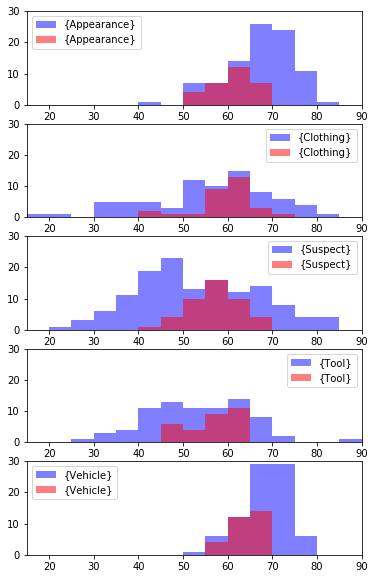

In [298]:
plt.figure(figsize=(6,10))
for i, (name,group) in enumerate(df.groupby('Node')):
    plt.subplot(5,1,i+1)
    plt.hist(group['mean'], label=name, alpha=.5, bins=range(0,100,5), color='b')
    plt.xlim(15,90)
    plt.ylim(0,30)
    plt.legend()
    
    
for i, (name,group) in enumerate(result.groupby('Node')):
    plt.subplot(5,1,i+1)
    plt.hist(group['mean'], label=name, alpha=.5, bins=range(0,100,5), color='r')
    plt.xlim(15,90)
    plt.ylim(0,30)
    plt.legend()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


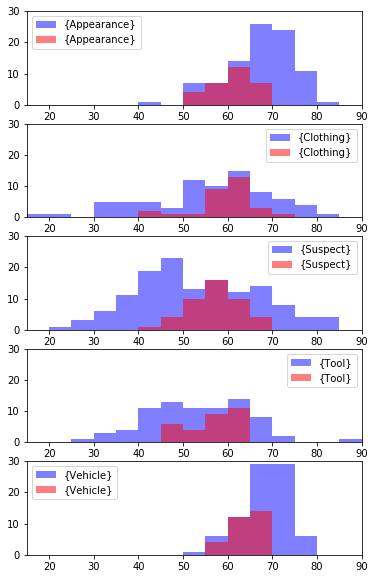

In [262]:
plt.figure(figsize=(6,10))
for i, (name,group) in enumerate(df.groupby('Node')):
    plt.subplot(5,1,i+1)
    plt.hist(group['mean'], label=name, alpha=.5, bins=range(0,100,5), color='b')
    plt.xlim(15,90)
    plt.ylim(0,30)
    plt.legend()
    
    
for i, (name,group) in enumerate(result.groupby('Node')):
    plt.subplot(5,1,i+1)
    plt.hist(group['mean'], label=name, alpha=.5, bins=range(0,100,5), color='r')
    plt.xlim(15,90)
    plt.ylim(0,30)
    plt.legend()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


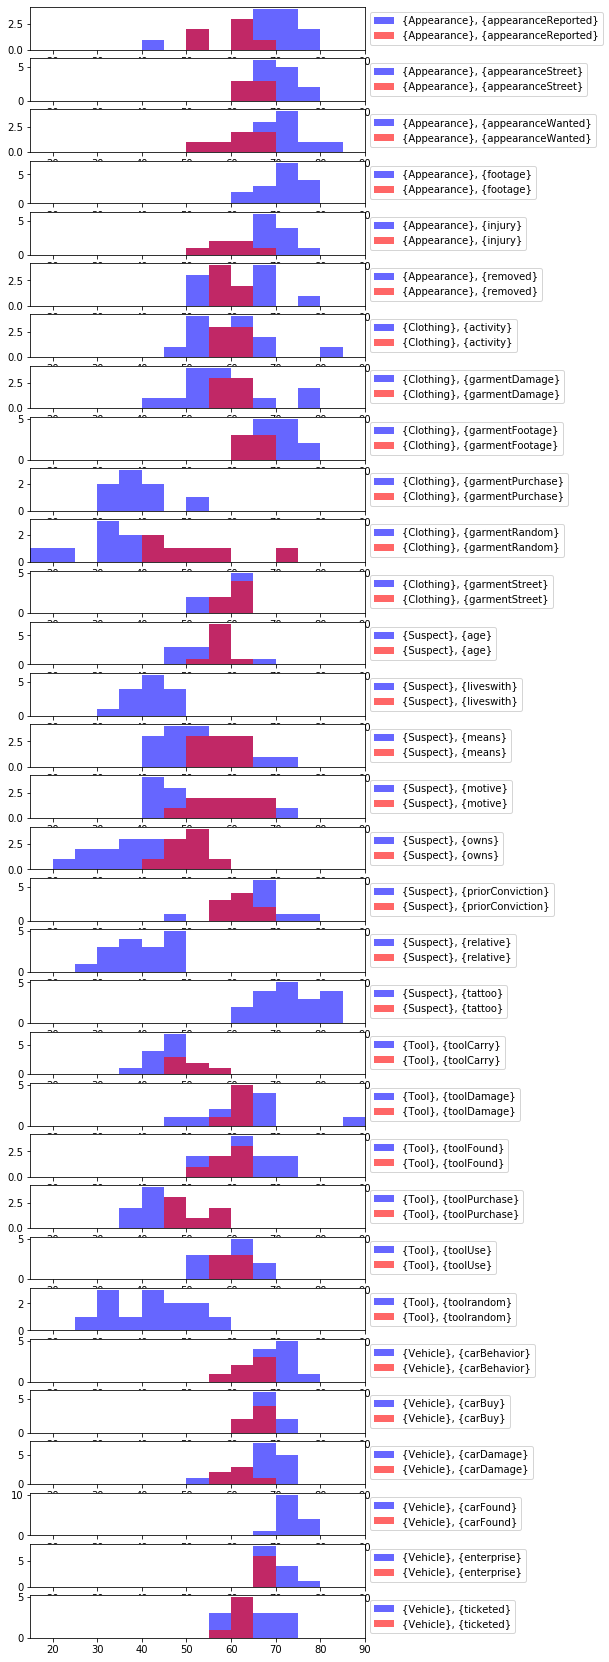

In [308]:
plt.figure(figsize=(6,30))
groups = df.groupby(['Node', 'SpurNode'])

for i, (name, group) in enumerate(groups):
    plt.subplot(len(groups),1,i+1)
    plt.hist(group['mean'], label=', '.join(name), alpha=.6, bins=range(0,100,5), color='b')
    plt.xlim(15,90)
    plt.legend(loc='center left', bbox_to_anchor=(1,.5))
    
for i, (name, group) in enumerate(groups):
    plt.subplot(len(groups),1,i+1)
    plt.hist(result[(result['Node']==name[0]) & (result['SpurNode']==name[1])]['mean'], 
             label=', '.join(name), alpha=.6, bins=range(0,100,5), color='r')
    plt.xlim(15,90)
    plt.legend(loc='center left', bbox_to_anchor=(1,.5))

In [296]:
pd.options.display.max_rows = 999
result.sort_values('mean', ascending=False, inplace=True)
result['mean']

The suspect has family connections to organized crime        73.685714
The suspect has a tattoo of a dragon                         71.676471
The suspect has a tattoo of a star                           71.151515
The suspect has a tattoo of a knot                           70.400000
The suspect has a tattoo of a skull                          69.861111
The suspect has a tattoo of an anchor                        68.375000
The suspect has a tattoo of a fish                           67.411765
The suspect is 29 years old                                  67.314286
The suspect was recently fired from their job                66.666667
The suspect has a tattoo of the sun                          66.533333
The suspect had been involved in gang actvity                65.794118
The suspect has a prior conviction for identity theft        65.606061
The suspect worked for an alarm company                      65.483871
The suspect has a prior conviction for attempted bribery     65.333333
The su

In [309]:
pd.options.display.max_rows = 999
df.sort_values('mean', ascending=False, inplace=True)
df['mean']

A tool of this type was found with readily identifiable fingerprints                                87.187500
The suspect has a tattoo of an eagle                                                                82.093750
The suspect has a tattoo of a wolf                                                                  81.705882
The suspect has a tattoo of a bear                                                                  81.147059
The suspect has a tattoo of a tiger                                                                 81.058824
An arrest bulletin shows someone matching the suspect's description                                 80.593750
Someone wearing this type of garment was seen throwing things into a lake                           80.562500
The suspect has a tattoo of a fist                                                                  79.870968
Someone matching the suspect's description was caught on security camera at a liquor store          79.294118
The suspec

In [ ]:
plt.figure(figsize=(6,10))
for i, (name,group) in enumerate(df[df['Node']=='{Clothing}'].groupby('SpurNode')):
    plt.subplot(7,1,i+1)
    plt.hist(group['mean'], label=name, alpha=.5, bins=range(0,100,5), color='b')
    plt.xlim(15,90)
    plt.legend()

# survey 6

In [19]:
data = pd.read_csv('../results-anonymized/pretest/Mystery object ranking 6 - more spurs_March 19, 2020_06.23.csv').T
data['Q'] = data[0].apply(lambda x: x.split(' - ')[0] if ' - ' in x else x)
data['A'] = data[0].apply(lambda x: x.split(' - ')[1].strip() if ' - ' in x else "")

# made a formatting mistake in the survey - correct here
data['A'] = data['A'].apply(lambda s: s.replace('contained a a ','contained a '))

data.set_index("A", drop=True, inplace=True)
data = data.iloc[13:-5] # drop metadata
data.drop([0, 1, 'Q'], axis=1, inplace=True)
data = data.astype(float)

scores = pd.DataFrame(index=data.index)
scores["scores"] = data.apply(lambda r: [int(v) for v in r if not np.isnan(v)], axis=1)
scores['mean'] = scores['scores'].apply(lambda x: np.mean(x))
scores['median'] = scores['scores'].apply(lambda x: np.median(x))
scores['std'] = scores['scores'].apply(lambda x: np.std(x))
scores['count'] = scores['scores'].apply(lambda x: len(x))

spurs = pd.read_excel('Clues.xlsx', sheet_name='Pretest spurs')
spurs.dropna(inplace=True)
spurs.index = spurs['Clue'].apply(lambda s: s.strip())
spurs.drop("Clue", axis=1,inplace=True)

df = spurs.merge(scores, how='inner', left_index=True, right_index=True)

assert len(df) == len(data)

df.head()

Node  \
The suspect has a prior conviction for drug pos...  {Suspect}   
The suspect has a prior conviction for drug dis...  {Suspect}   
The suspect has a prior conviction for vandalism    {Suspect}   
The suspect has a prior conviction for petty theft  {Suspect}   
The suspect has a prior conviction for assault      {Suspect}   

                                                               SpurNode  \
The suspect has a prior conviction for drug pos...  {suspectConviction}   
The suspect has a prior conviction for drug dis...  {suspectConviction}   
The suspect has a prior conviction for vandalism    {suspectConviction}   
The suspect has a prior conviction for petty theft  {suspectConviction}   
The suspect has a prior conviction for assault      {suspectConviction}   

                                                       NodeText  \
The suspect has a prior conviction for drug pos...  The suspect   
The suspect has a prior conviction for drug dis...  The suspect   
The suspect has a prior conviction for vandalism    The suspect   
The suspect has a prior conviction for petty theft  The suspect   
The suspect has a prior conviction for assault      The suspect   

                                                                                             Template  \
The suspect has a prior conviction for drug pos...  {Suspect} has a prior conviction for {suspectC...   
The suspect has a prior conviction for drug dis...  {Suspect} has a prior conviction for {suspectC...   
The suspect has a prior conviction for vandalism    {Suspect} has a prior conviction for {suspectC...   
The suspect has a prior conviction for petty theft  {Suspect} has a prior conviction for {suspectC...   
The suspect has a prior conviction for assault      {Suspect} has a prior conviction for {suspectC...   

                                                         SpurNodeText  \
The suspect has a prior conviction for drug pos...    drug possession   
The suspect has a prior conviction for drug dis...  drug distribution   
The suspect has a prior conviction for vandalism            vandalism   
The suspect has a prior conviction for petty theft        petty theft   
The suspect has a prior conviction for assault                assault   

                                                                                               scores  \
The suspect has a prior conviction for drug pos...  [100, 90, 79, 45, 79, 61, 71, 79, 42, 19, 79, ...   
The suspect has a prior conviction for drug dis...  [78, 89, 91, 75, 78, 80, 36, 9, 71, 0, 28, 65,...   
The suspect has a prior conviction for vandalism    [14, 68, 52, 77, 65, 55, 65, 59, 58, 57, 49, 5...   
The suspect has a prior conviction for petty theft  [80, 96, 68, 81, 25, 70, 40, 75, 30, 53, 99, 7...   
The suspect has a prior conviction for assault      [78, 75, 96, 95, 51, 100, 71, 38, 61, 11, 51, ...   

                                                         mean  median  \
The suspect has a prior conviction for drug pos...  65.666667    62.5   
The suspect has a prior conviction for drug dis...  60.032258    65.0   
The suspect has a prior conviction for vandalism    58.633333    59.5   
The suspect has a prior conviction for petty theft  70.689655    75.0   
The suspect has a prior conviction for assault      66.275862    67.0   

                                                          std  count  
The suspect has a prior conviction for drug pos...  18.124262     30  
The suspect has a prior conviction for drug dis...  24.412429     31  
The suspect has a prior conviction for vandalism    22.986204     30  
The suspect has a prior conviction for petty theft  19.392682     29  
The suspect has a prior conviction for assault      25.466539     29

In [15]:
df['SpurNode'].value_counts().sort_index()

{appearanceFootage}     19
{appearanceInjury}      22
{appearanceRemoved}     24
{appearanceReported}    22
{appearanceStreet}      16
{appearanceWanted}      21
{carBehavior}           20
{carBuy}                20
{carDamage}             18
{carEnterprise}         22
{carFound}              22
{carTicketed}           21
{clothingActivity}      31
{clothingDamage}        25
{clothingDiscoverer}    22
{clothingFootage}       15
{clothingRandom}        23
{clothingWith}          24
{suspectAge}            21
{suspectConviction}     24
{suspectMeans}          25
{suspectMotive}         23
{suspectOwns}           20
{suspectPsych}          26
{suspectTattoo}         26
{toolDamage}            23
{toolFound}             24
{toolNearby}            22
{toolPurchase}          12
{toolUse}               21
{toolWith}              22
{toolrandom}            23
Name: SpurNode, dtype: int64

In [16]:

def contains_reqs(df, givens, reqs):
    """
    Does the dataframe df + givens contain all the components that are required in reqs?
    """
    df = df.append(givens)
    for cat, (n_types, n_clues) in reqs.items():
        counts = df[df['Node']==cat].groupby('SpurNode')['NodeText'].count() 
        cat_satisfied = sum(counts>=n_clues) >= n_types
        if not cat_satisfied:
            return False

    return True
    

def recur(df, givens, reqs, bias=1, sort_col='mean'):
    
    if len(df) < 2:
        if contains_reqs(pd.DataFrame(columns=df.columns),
                         givens, reqs):
            return givens
        elif contains_reqs(df, givens, reqs):
            return df.append(givens)
    
    df.sort_values(sort_col, ascending=False, inplace=True)
    top_contains = contains_reqs(df.iloc[:-1], givens, reqs)
    bottom_contains = contains_reqs(df.iloc[1:], givens, reqs)
    
    if top_contains and not bottom_contains:
        givens = recur(df.iloc[:-1], givens, reqs)
    elif bottom_contains and not top_contains:
        givens = recur(df.iloc[1:], givens, reqs)
    elif bottom_contains and top_contains:
        top_delta = df[sort_col].iloc[0] - df[sort_col].iloc[-2]
        bottom_delta = df[sort_col].iloc[1] - df[sort_col].iloc[-1]
        if top_delta <= bias*bottom_delta:
            givens = recur(df.iloc[:-1], givens, reqs)
        else:
            givens = recur(df.iloc[1:], givens, reqs)
    else:  # need both top and bottom element
        givens = givens.append(df.iloc[[0,-1]])
        #print(givens.index)
        givens = recur(df.iloc[1:-1], givens, reqs)
    
    return givens

#reqs = {'{Suspect}':(4,9), '{Appearance}':(4,6), '{Clothing}':(3,6), '{Tool}':(0,6), '{Vehicle}':(4,6)}
reqs = {'{Suspect}':(5,9), '{Appearance}':(5,6), '{Clothing}':(5,6), '{Tool}':(5,6), '{Vehicle}':(5,6)}
result = recur(df, givens=pd.DataFrame(columns=df.columns), reqs=reqs, sort_col='mean')

print("Mean: %.02f, STD: %.02f"%(result['mean'].mean(), result['mean'].std()))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Mean: 62.69, STD: 2.51


In [421]:
reqs = {'{Suspect}':(2,9), '{Appearance}':(2,6), '{Clothing}':(2,6), '{Tool}':(1,6), '{Vehicle}':(2,6)}
r2 = recur(df[df['mean']>65], givens=pd.DataFrame(columns=df.columns), reqs=reqs, sort_col='mean')

print("Mean: %.02f, STD: %.02f"%(r2['mean'].mean(), r2['mean'].std()))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Mean: 69.23, STD: 1.87


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


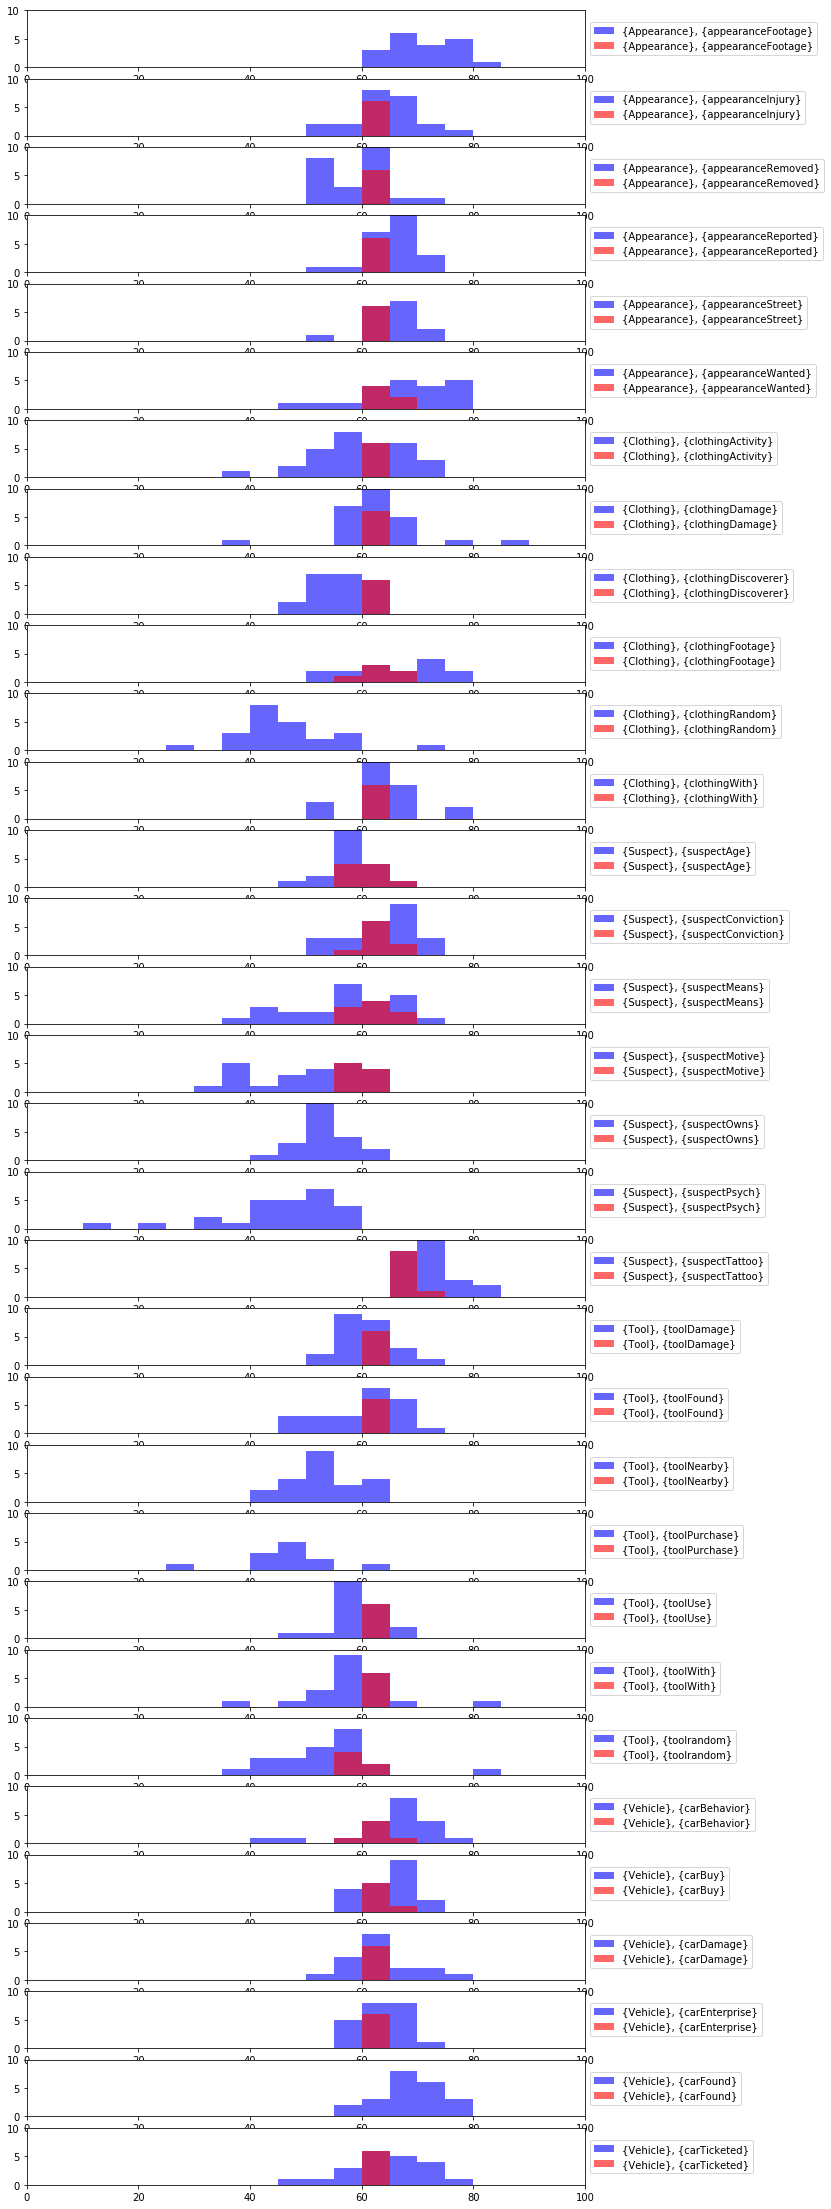

In [20]:
plt.figure(figsize=(10,40))
groups = df.groupby(['Node', 'SpurNode'])
sort_col = 'mean'

for i, (name, group) in enumerate(groups):
    plt.subplot(len(groups),1,i+1)
    plt.hist(group[sort_col], label=', '.join(name), alpha=.6, bins=range(0,100,5), color='b')
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.legend(loc='center left', bbox_to_anchor=(1,.5))
    
for i, (name, group) in enumerate(groups):
    plt.subplot(len(groups),1,i+1)
    plt.hist(result[(result['Node']==name[0]) & (result['SpurNode']==name[1])][sort_col], 
             label=', '.join(name), alpha=.6, bins=range(0,100,5), color='r')
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.legend(loc='center left', bbox_to_anchor=(1,.5))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


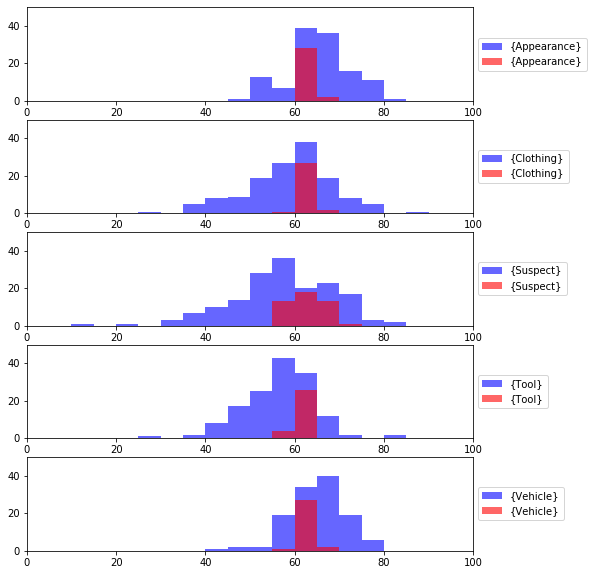

In [21]:
plt.figure(figsize=(8,10))
groups = df.groupby('Node')
sort_col = 'mean'

for i, (name, group) in enumerate(groups):
    plt.subplot(len(groups),1,i+1)
    plt.hist(group[sort_col], label=name, alpha=.6, bins=range(0,100,5), color='b')
    plt.xlim(0,100)
    plt.ylim(0,50)
    plt.legend(loc='center left', bbox_to_anchor=(1,.5))
    
for i, (name, group) in enumerate(groups):
    plt.subplot(len(groups),1,i+1)
    plt.hist(result[result['Node']==name][sort_col], 
             label=name, alpha=.6, bins=range(0,100,5), color='r')
    plt.xlim(0,100)
    plt.ylim(0,50)
    plt.legend(loc='center left', bbox_to_anchor=(1,.5))

In [22]:
pd.options.display.max_rows = 999
result.sort_values(['Node', 'SpurNode'])

Node  \
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
Someone matching the suspect's description was ...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
A constable noticed someone matching the suspec...  {Appearance}   
Information is wanted about someone matching th...  {Appearance}   
Law enforcement is seeking someone matching the...  {Appearance}   
Officers are asking questions about someone mat...  {Appearance}   
Private security companies have been warned to ...  {Appearance}   
Airport security has been asked to look out for...  {Appearance}   
Police are interviewing witnesses about someone...  {Appearance}   
A policeman saw someone in this type of garment...    {Clothing}   
A policeman saw someone in this type of garment...    {Clothing}   
A policeman saw someone in this type of garment...    {Clothing}   
A policeman saw someone in this type of garment...    {Clothing}   
A policeman saw someone in this type of garment...    {Clothing}   
A policeman saw someone in this type of garment...    {Clothing}   
Forensics identified a garment of this type cut...    {Clothing}   
Forensics identified a garment of this type wit...    {Clothing}   
Forensics identified a garment of this type bur...    {Clothing}   
Forensics identified a garment of this type wit...    {Clothing}   
Forensics identified a garment of this type dis...    {Clothing}   
Forensics identified a garment of this type cak...    {Clothing}   
A garment of this type was discovered by a gym ...    {Clothing}   
A garment of this type was discovered by a dock...    {Clothing}   
A garment of this type was discovered by a stor...    {Clothing}   
A garment of this type was discovered by a jour...    {Clothing}   
A garment of this type was discovered by a post...    {Clothing}   
A garment of this type was discovered by theate...    {Clothing}   
Someone wearing this type of garment was seen o...    {Clothing}   
Someone wearing this type of garment was seen o...    {Clothing}   
Someone wearing this type of garment was seen o...    {Clothing}   
Someone wearing this type of garment was seen o...    {Clothing}   
Someone wearing this type of garment was seen o...    {Clothing}   
Someone wearing this type of garment was seen o...    {Clothing}   
A garment of this type was found with a list of...    {Clothing}   
A garment of this type was found with a home-ma...    {Clothing}   
A garment of this type was found with a pair of...    {Clothing}   
A garment of this type was found with an inter-...    {Clothing}   
A garment of this type was found with the stub .

In [23]:
pd.options.display.max_columns = 999
node_table = pd.DataFrame(index=range(9))
for i, group in result.groupby(['SpurNode']):
    node_table[i.strip('{}')] = group['SpurNodeText'].reset_index(drop=True)
    
node_table

appearanceInjury appearanceRemoved             appearanceReported  \
0         a broken arm          a museum        waiting in a dark alley   
1  a fractured kneecap  a public library               shouting at 11pm   
2         a concussion             a bar              sitting in a tree   
3      a fractured rib      a restaurant              painting graffiti   
4          minor burns       a residence  vandalizing a vending machine   
5      a drug overdose           a party           carrying a large bag   
6                  NaN               NaN                            NaN   
7                  NaN               NaN                            NaN   
8                  NaN               NaN                            NaN   

    appearanceStreet                                   appearanceWanted  \
0       Maple Avenue                        Information is wanted about   
1  Lincoln Boulevard                         Law enforcement is seeking   
2    Chestnut Street                Officers are asking questions about   
3      Church Street  Private security companies have been warned to...   
4        Hill Street    Airport security has been asked to look out for   
5       Ninth Avenue            Police are interviewing witnesses about   
6                NaN                                                NaN   
7                NaN                                                NaN   
8                NaN                                                NaN   

                              carBehavior                    carBuy  \
0                  driving after midnight    in a wholesale auction   
1  with someone sleeping in the back seat       at a police auction   
2              with darkly tinted windows      from a classified ad   
3     parked in a lot for multiple nights         at an estate sale   
4                 taking the back streets  from a used-car salesmen   
5       with it's hood up on the roadside          from a junk-yard   
6                                     NaN                       NaN   
7                                     NaN                       NaN   
8                                     NaN                       NaN   

               carDamage     carEnterprise                 carTicketed  \
0     a broken headlight            a club     an expired registration   
1         a broken grill  a massage parlor   parking in a loading zone   
2     damaged suspension      a strip mall  driving without headlights   
3  a missing wing mirror      a laundromat         a broken tail light   
4   the airbags deployed    a delicatessen             illegal parking   
5          a broken axel           a hotel         running a stop sign   
6                    NaN               NaN                         NaN   
7                    NaN               NaN                         NaN   
8                    NaN               NaN                         NaN   

                      clothingActivity          clothingDamage  \
0              entering a machine room         cut into pieces   
1    pulling an object out of a gutter   with tire marks on it   
2  looking through binoculars at night        burned in a fire   
3                  getting into a taxi       with frayed edges   
4                 climbing on a bridge  discolored with bleach   
5                pacing back and forth            caked in mud   
6                                  NaN                     NaN   
7                                  NaN                     NaN   
8                                  NaN                     NaN   

                             clothingDiscoverer     clothingFootage  \
0        a gym owner emptying abandoned lockers       at a bus stop   
1          a dockworker moving shipping pallets        in the woods   
2  a store worker breaking down cardboard boxes         in the park   
3               a journalist uncovering a story       at a campsite   
4            a postal worker emptyin

In [24]:
pd.options.display.max_colwidth = 999
edge_table = pd.DataFrame(index=range(5))
count = {'Suspect':3, 'Clothing':2, 'Appearance':2, 'Tool':2, 'Vehicle':2}
for i, group in result.groupby(['Node']):
    name = i.strip('{}')
    for n in range(count[name]):
        edge_table[name+'_%i'%(n+1)] = group['Template'].drop_duplicates().reset_index(drop=True).apply(lambda s: s.replace('}', '_%i}'%(n+1)))
edge_table

Appearance_1  \
0                             {appearanceWanted_1} {Appearance_1}   
1      A constable noticed {Appearance_1} on {appearanceStreet_1}   
2              {Appearance_1} was reported {appearanceReported_1}   
3             {Appearance_1} was treated for {appearanceInjury_1}   
4  {Appearance_1} was forcibly removed from {appearanceRemoved_1}   

                                                     Appearance_2  \
0                             {appearanceWanted_2} {Appearance_2}   
1      A constable noticed {Appearance_2} on {appearanceStreet_2}   
2              {Appearance_2} was reported {appearanceReported_2}   
3             {Appearance_2} was treated for {appearanceInjury_2}   
4  {Appearance_2} was forcibly removed from {appearanceRemoved_2}   

                                                                      Clothing_1  \
0  Someone wearing {Clothing_1} was seen on security footage {clothingFootage_1}   
1                          {Clothing_1} was discovered by {clothingDiscoverer_1}   
2                   A policeman saw someone in {Clothing_1} {clothingActivity_1}   
3                                   {Clothing_1} was found with {clothingWith_1}   
4                           Forensics identified {Clothing_1} {clothingDamage_1}   

                                                                      Clothing_2  \
0  Someone wearing {Clothing_2} was seen on security footage {clothingFootage_2}   
1                          {Clothing_2} was discovered by {clothingDiscoverer_2}   
2                   A policeman saw someone in {Clothing_2} {clothingActivity_2}   
3                                   {Clothing_2} was found with {clothingWith_2}   
4                           Forensics identified {Clothing_2} {clothingDamage_2}   

                                                      Suspect_1  \
0                 {Suspect_1} has a tattoo of {suspectTattoo_1}   
1                                 {Suspect_1} {suspectMotive_1}   
2                                 {Suspect_1} is {suspectAge_1}   
3                                  {Suspect_1} {suspectMeans_1}   
4  {Suspect_1} has a prior conviction for {suspectConviction_1}   

                                                      Suspect_2  \
0                 {Suspect_2} has a tattoo of {suspectTattoo_2}   
1                                 {Suspect_2} {suspectMotive_2}   
2                                 {Suspect_2} is {suspectAge_2}   
3                                  {Suspect_2} {suspectMeans_2}   
4  {Suspect_2} has a prior conviction for {suspectConviction_2}   

                                                      Suspect_3  \
0                 {Suspect_3} has a tattoo of {suspectTattoo_3}   
1                                 {Suspect_3} {suspectMotive_3}   
2                                 {Suspect_3} is {suspectAge_3}   
3                                  {Suspect_3} {suspectMeans_3}   
4  {Suspect_3} has a prior conviction for {suspectConviction_3}   

                                                 Tool_1  \
0                               {Tool_1} {toolrandom_1}   
1                 {Tool_1} could be used to {toolUse_1}   
2                       {Tool_1} was found {toolWith_1}   
3             An FBI agent found {Tool_1} {toolFound_1}   
4  A forensics report contained {Tool_1} {toolDamage_1}   

                                                 Tool_2  \
0                               {Tool_2} {toolrandom_2}   
1                 {Tool_2} could be used to {toolUse_2}   
2                       {Tool_2} was found {toolWith_2}   
3             An FBI agent found {Tool_2} {toolFound_2}   
4  A forensics report contained {Tool_2} {toolDamage_2}   

                                                Vehicle_1  \
0                {Vehicle_1} was reported {carBehavior_1}   
1           {Vehicle_1} was recently purchased {carBuy_1}   
2            {Vehicle_1} was ticketed for {carTicketed_1}   
3  An officer identified {Vehicle_1} at {carEnterp